# Data Report - Petroleum Generation in the US Over Time
## Author: Emilio Ramos Monzalvo
## Purpose: Work in Progress Report (WIP)

### Visually Describe a Dataset
The purpose of this exercise is to find a dataset that is interesting to you and then use what you have learned so far to visually describe a dataset with R plots. This means showing a few (3) single-dimension plots as well as at least one multidimension plot. One of the hardest parts of this assignment is going to be finding the right data. You will turn in a PDF file with the plots and your R script. Make sure your plots are vector graphics (saved as a PDF file). Each plot should be on its own page. Note that work done in this assignment can be used in both the Work-in-Progress report (coming up) and the Final Poster.


# Table of Contents:
* [Data](#Data)
    * [Data Source](#source)
        * [Pre-Processing](#prepro)
    * [Description](#desc)
    * [STR Output](#str)
    * [Col vs Row Computation](#colvsrow)
* [Descriptive Plots](#DescriptivePlots)
    * [Distribution Plots](#DescriptivePlots)
        * [Petroleum by State All Time](#dp1)
        * [Petroleum by State in 2020](#dp2)
        * [Petroleum by Sector](#dp3)
        * [Petroleum Raw Distribution](#dp4)
    * [Multivariate Plots](#MP)
        * [All Sector Petroleum Over Time](#mp1)
        * [Time Series Decomposition](#mp2)
        * [Contribution by State Over Time](#mp3)
        * [Contribution by All Sectors](#mp4)

# Data <a class="anchor" id="Data"></a>
You need to find a substantial dataset for this project. Your dataset must score at least 100 in the formula below:
- (NumberOfColumns * 4) * (NumberOfRows/100) >= 100 <br>

Examples:
- A dataset with 5 columns and 10,000 rows would score: (5 * 4) * (10,000/100) = 2000 A dataset with 17 columns and 3,000 rows would score: (17 * 4) * (350/100) = 238
- A dataset with 5 columns and 500 rows would score: (5 * 4) * (500/100) = 100 <br> </br>

The point of this is to make sure you have a large enough dataset to work with. You need enough columns to look at how different variables might be related. You need enough rows to show that you can work with a decent-sized dataset.<br></br>

Provide the following information about your data:
* Description – what does the data set represent, 1 or 2 sentences
* Provide the output of the str function on your data set
* Provide the calculation notes above using your data set, specifically: (NumberOfColumns * 4) * (NumberOfRows/100)

## Data Source <a class="anchor" id="source"></a>

<b> Energy Consumption in US </b> <br>
source: https://www.eia.gov/electricity/data

In [1]:
getwd()

[1] "C:/Users/ramos/OneDrive/Documents/SyracuseUniversity/8th_Quarter/IST719/Project"

In [2]:
path <- "C:/Users/ramos/OneDrive/Documents/SyracuseUniversity/8th_Quarter/IST719/Data/datasets/"
fname <- paste(path, 'Net_generation_for_petroleum_liquids.csv', sep="")
df <- read.csv(fname, header=TRUE, stringsAsFactor=FALSE)

### Pre-Process DataFrame <a class="anchor" id="prepro"></a>


In [3]:
# Get Date Columns
df_cols <- colnames(df)
# Date Cols
date_cols <- df_cols[4:length(df_cols)]
# String Cols
desc_cols <- df_cols[1:3]

In [4]:
# Get State and Sector of Row
library(stringr)
sector_state <- as.data.frame(str_split_fixed(df$description, " : ", 2))

# Create Two new descriptive Columns
df$sector <- sector_state$V2
df$state <- sector_state$V1

# Update Descriptive Columns
desc_cols <- c('state', 'sector', desc_cols)
desc_cols

# Sort Columns by Descriptive
df <- df[c(desc_cols, date_cols)]

[1] "state"       "sector"      "description" "units"       "source.key"

In [5]:
# Get Rid off of Empty Rows
df <- df[((df$source.key != '') & (df$units != '') & (df$state != '') & (df$sector != '')),]

# Also Get Rid off of Rows that are not states
not_states = c('United States', 'Pacific Noncontiguous', 'Pacific Contiguous', 
               'New England', 'Middle Atlantic', 'East North Central', 
               'South Atlantic', 'West South Central', 'East South Central',
               'West North Central', 'Mountain'
              )
df <- subset(df,  !(df$state %in% not_states))

# Update Index
row.names(df) <- NULL

In [6]:
# Melt
library(reshape2)
df <- melt(df, id.vars=desc_cols, value.name='petroleum', variable.name='date')

# Get Rid off of Empty Rows
df <- df[((df$petroleum != '--') & (df$petroleum != 'NM')), ]

# Update Index
row.names(df) <- NULL

# Convert Petroleum to Number
df$petroleum <- as.numeric(df$petroleum)

In [7]:
# Convert date column to date format
df$date <- as.Date(paste(df$date, '.01', sep=''), format="%b.%y.%d")
date_df <- as.data.frame(str_split_fixed(df$date, "-", 3))
df$year <- date_df$V1

In [8]:
# Year as two Digits
library(stringr)
library(dplyr)

df <- df %>% 
  mutate(year_str = paste0("'", str_sub(year, -2,-1)))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [9]:
# Get Top n States
n<-10
topn_states <- function(n) {
    df_all_time <- aggregate(list(petroleum=df$petroleum), list(sector=df$sector, state=df$state), sum)
    df_all_sect <- df_all_time[df_all_time$sector=='all sectors', ]
    top_n_states <- df_all_sect[order(-df_all_sect$petroleum), ][1:n,'state']
    topn <- ifelse(df$state %in% top_n_states, df$state, 'Other')
    return(topn)
}
df$topn <- topn_states(20)

In [10]:
df <- df[df$year != '2021', ]

In [11]:
head(df, 5)
colnames(df)[1:10]

,state,sector,description,units,source.key,date,petroleum,year,year_str,topn
,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>
1,Connecticut,all sectors,Connecticut : all sectors,thousand megawatthours,ELEC.GEN.PEL-CT-99.M,2001-01-01,924,2001,'01,Connecticut
2,Connecticut,electric utility,Connecticut : electric utility,thousand megawatthours,ELEC.GEN.PEL-CT-1.M,2001-01-01,1,2001,'01,Connecticut
3,Connecticut,independent power producers,Connecticut : independent power producers,thousand megawatthours,ELEC.GEN.PEL-CT-94.M,2001-01-01,920,2001,'01,Connecticut
4,Connecticut,all commercial,Connecticut : all commercial,thousand megawatthours,ELEC.GEN.PEL-CT-96.M,2001-01-01,0,2001,'01,Connecticut
5,Connecticut,all industrial,Connecticut : all industrial,thousand megawatthours,ELEC.GEN.PEL-CT-97.M,2001-01-01,2,2001,'01,Connecticut


[1] "state"       "sector"      "description" "units"       "source.key" 
 [6] "date"        "petroleum"   "year"        "year_str"    "topn"

## Description <a class="anchor" id="desc"></a>

The dataset obtained from the eia.gov website contains information on the net generation of petroleum liquids in the US. The table breaks it down by State and Sector rather than just overall in the US. The sectors include All Sectors, Electricity Utility, Independent Power Producers, All Commercial, and All Industrial. This means, that there are 5 rows for each of the 50 states plus DC. For each one of these combinations, there is a time series corresponding to it for each month from January 2001 to May 2021. I used the melt command to create a long table rather than a long table with multiple columns per date. 

In [12]:
unique(df$sector)

[1] "all sectors"                 "electric utility"           
[3] "independent power producers" "all commercial"             
[5] "all industrial"

In [13]:
unique(df$state)
length(unique(df$state))

[1] "Connecticut"          "Maine"                "Massachusetts"       
 [4] "New Hampshire"        "Rhode Island"         "Vermont"             
 [7] "New Jersey"           "New York"             "Pennsylvania"        
[10] "Illinois"             "Indiana"              "Michigan"            
[13] "Ohio"                 "Wisconsin"            "Iowa"                
[16] "Kansas"               "Minnesota"            "Missouri"            
[19] "Nebraska"             "North Dakota"         "South Dakota"        
[22] "Delaware"             "District Of Columbia" "Florida"             
[25] "Georgia"              "Maryland"             "North Carolina"      
[28] "South Carolina"       "Virginia"             "West Virginia"       
[31] "Alabama"              "Kentucky"             "Mississippi"         
[34] "Tennessee"            "Arkansas"             "Louisiana"           
[37] "Oklahoma"             "Texas"                "Arizona"             
[40] "Colorado"             "Idaho"                "Montana"             
[43] "Nevada"               "New Mexico"           "Utah"                
[46] "Wyoming"              "California"           "Oregon"              
[49] "Washington"           "Alaska"               "Hawaii"

[1] 51

## STR <a class="anchor" id="str"></a>

In [14]:
str(df)

'data.frame':	50965 obs. of  10 variables:
 $ state      : chr  "Connecticut" "Connecticut" "Connecticut" "Connecticut" ...
 $ sector     : chr  "all sectors" "electric utility" "independent power producers" "all commercial" ...
 $ description: chr  "Connecticut : all sectors" "Connecticut : electric utility" "Connecticut : independent power producers" "Connecticut : all commercial" ...
 $ units      : chr  "thousand megawatthours" "thousand megawatthours" "thousand megawatthours" "thousand megawatthours" ...
 $ source.key : chr  "ELEC.GEN.PEL-CT-99.M" "ELEC.GEN.PEL-CT-1.M" "ELEC.GEN.PEL-CT-94.M" "ELEC.GEN.PEL-CT-96.M" ...
 $ date       : Date, format: "2001-01-01" "2001-01-01" ...
 $ petroleum  : num  924 1 920 0 2 ...
 $ year       : chr  "2001" "2001" "2001" "2001" ...
 $ year_str   : chr  "'01" "'01" "'01" "'01" ...
 $ topn       : chr  "Connecticut" "Connecticut" "Connecticut" "Connecticut" ...


## (NumberOfColumns * 4) * (NumberOfRows/100) <a class="anchor" id="colvsrow"></a>

In [15]:
dim(df)

[1] 50965    10

In [16]:
(dim(df)[2]*4)*(dim(df)[1]/100)

[1] 20386

# Descriptive Plots <a class="anchor" id="Descriptive Plots"></a>
Your data may have any types. For example, you might have a mix of continuous, text, and categorical data columns, or you might have several columns of just continuous data. 
The type of the data should dictate what kinds of plots you make.<br><br>
To visually describe the data, first, make some plots in R that show how the data are distributed. For continuous data, this might be histograms, box plots, or density plots. For categorical data, a good choice is a bar chart that shows the frequencies of different categories. A pie charts works for this, too. Include at least three of these single-dimension plots. If you tell me your data have only three columns, I will probably say to find a different dataset. Next, make a multidimension plot using at least two columns, though as you have seen in labs, some two-dimension plots can take three different columns to make. Indicate which plots are distribution oriented ie single dimension and which plot is multidimensional.<br><br>
Note that in this assignment the plots and their context text should be all I need to get a sense of what your data are about. The plots don’t need to be “pretty” unless you want them to be, but they do need context items that help me understand your data. All plots should have a title and possibly context text under the title so I know what the data are about. Include titles and axis labels in the plots. All plots should list the source in the lower-right corner in small (but readable) text.


## Distribution Plots <a class="anchor" id="distplots"></a>

In [17]:
library(ggplot2)
library(ggrepel)

In [18]:
setwd('charts')

In [100]:
get_col_pallette <- function(array, fun_color_range) {
    
    u_val <- unique(array)
    nu_val <- length(u_val)
    
    colpallete <- fun_color_range(nu_val)
    
    col_arr <- rep('', length(array))
    count = 1
    for (val in array) {
        
        col_arr[count] <- colpallete[which(val == u_val)]
        
        count <- count + 1
    }
    
    return(col_arr)
}

In [19]:
get_pos_pie <- function(df_temp, group, value){
    group <- df_temp[, group]
    value <- df_temp[, value]
    df_temp <- df_temp %>% 
        arrange(desc(group)) %>%
        mutate(prop = value / sum(value) *100) %>%
        mutate(prop = round(prop, 1)) %>%
        mutate(pos = cumsum(prop)- 0.5*prop)
    return(df_temp)
}

### Petrolum Generation by State from 2001 to 2021 <a class="anchor" id="dp1"></a>


png 
  2

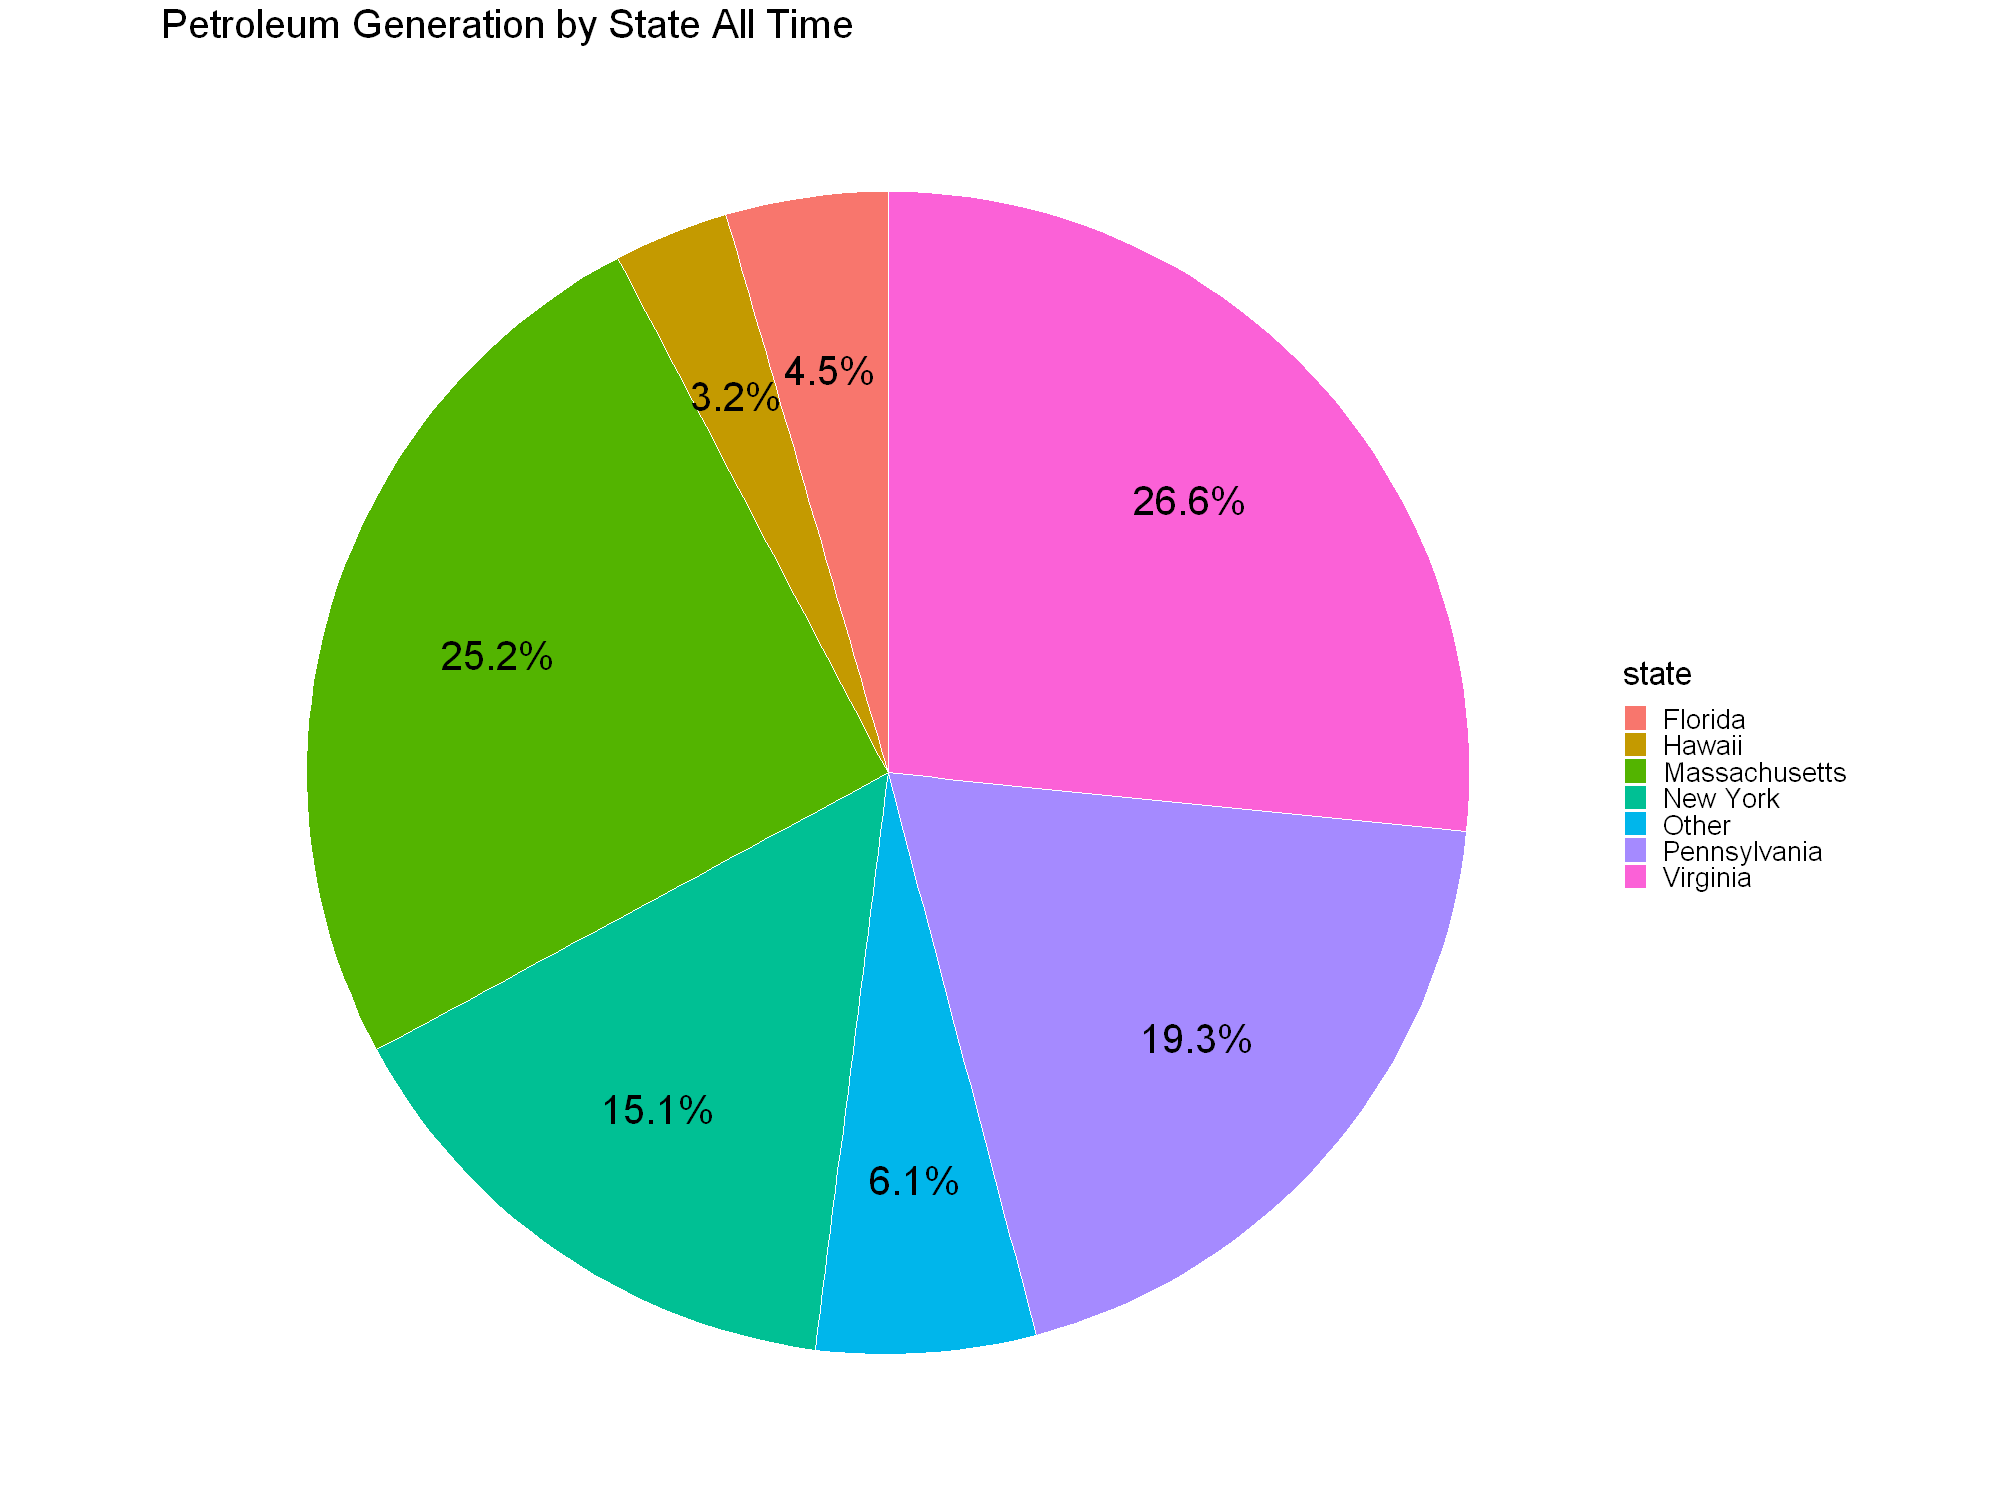

In [20]:
df$topn <- topn_states(6)

allsect.bystate <- aggregate(list(petroleum=df[(df$sector=='all sectors'), ]$petroleum), 
                             list(state=df[(df$sector=='all sectors'), ]$topn), sum)

# Get the positions
allsect.bystate <- get_pos_pie(allsect.bystate, 'state', 'petroleum')

options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(allsect.bystate) + 
    aes(x='', y=prop, fill=state) + 
    geom_bar(stat='identity', width=1, color='white') +
    coord_polar('y', start=0) +
    theme_void() +
    theme(legend.position="right", aspect.ratio = 1, text = element_text(size=24)) + 
    geom_text(aes(x=1.2, y = pos, label = paste(prop, '%', sep='')), color = "black", size=10) +
    ggtitle('Petroleum Generation by State All Time')
#     scale_fill_brewer(palette="Set1")

pdf('pet_by_state_all_time_topn.pdf')
ggplot(allsect.bystate) + 
    aes(x='', y=prop, fill=state) + 
    geom_bar(stat='identity', width=1, color='white') +
    coord_polar('y', start=0) +
    theme_void() +
    theme(legend.position="right", aspect.ratio = 1, text = element_text(size=24)) + 
    geom_text(aes(x=1.2, y = pos, label = paste(prop, '%', sep='')), color = "black", size=10) +
    ggtitle('Petroleum Generation by State All Time')
#     scale_fill_brewer(palette="Set1")
dev.off()

png 
  2

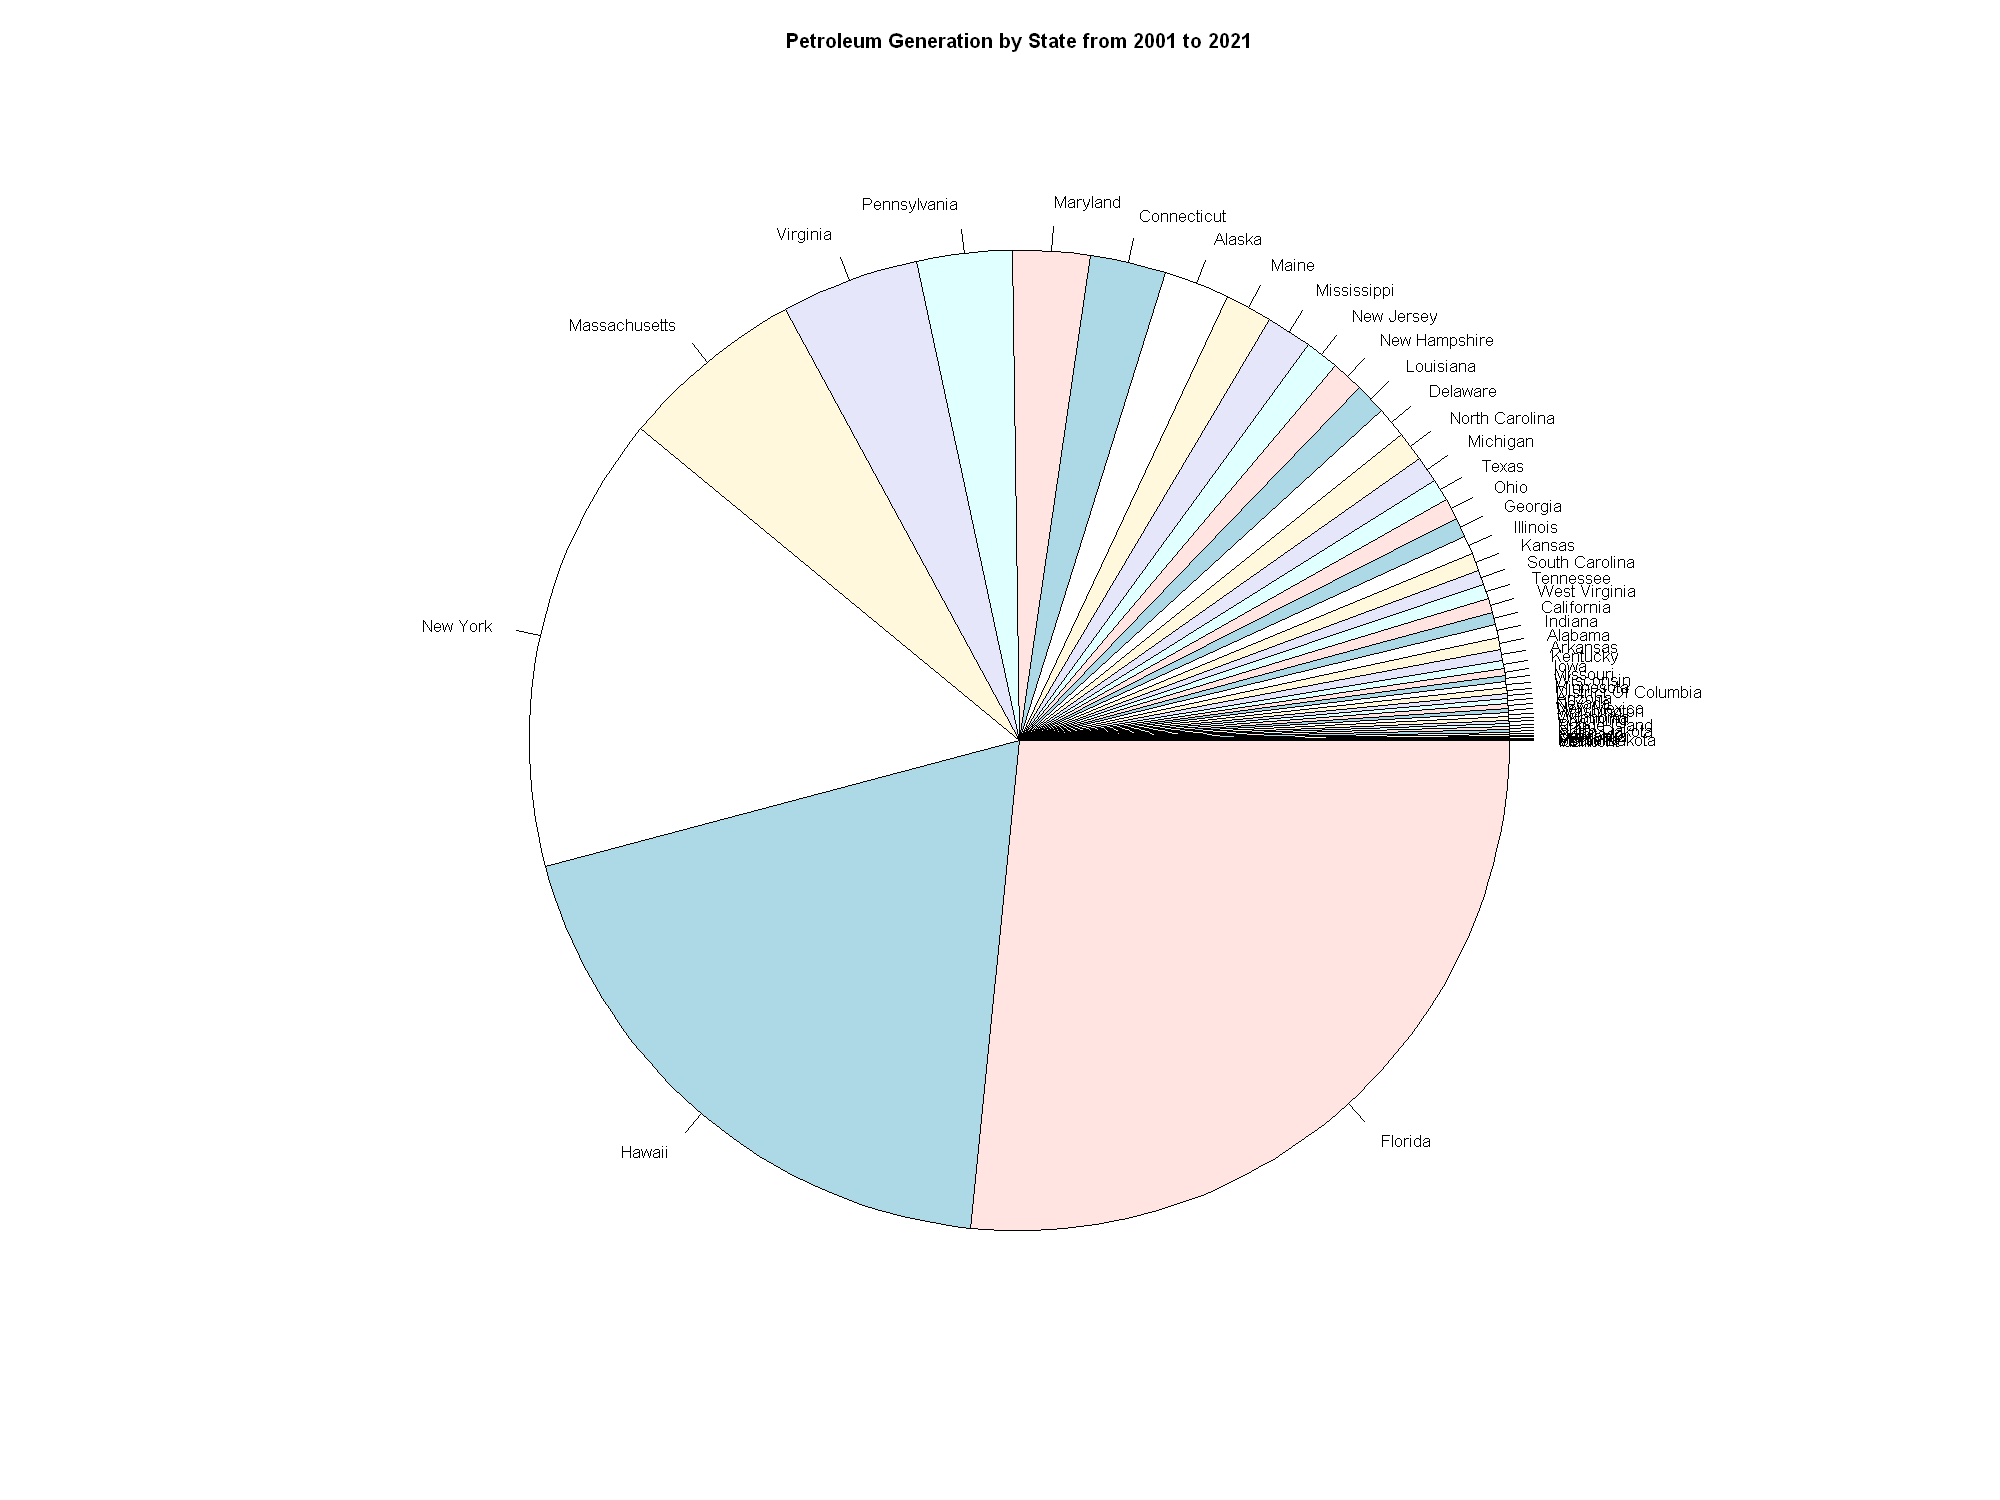

In [21]:
# Petroleum Generation by State from 2001 to 2021
allsect.bystate <- tapply(df[(df$sector=='all sectors'), ]$petroleum, list(df[(df$sector=='all sectors'), ]$state), sum)
pie(sort(allsect.bystate), main='Petroleum Generation by State from 2001 to 2021')

pdf('pet_by_state_all_time.pdf')
pie(sort(allsect.bystate), main='Petroleum Generation by State from 2001 to 2021')
dev.off()

### Petrolum Generation in 2020 by State <a class="anchor" id="dp2"></a>

png 
  2

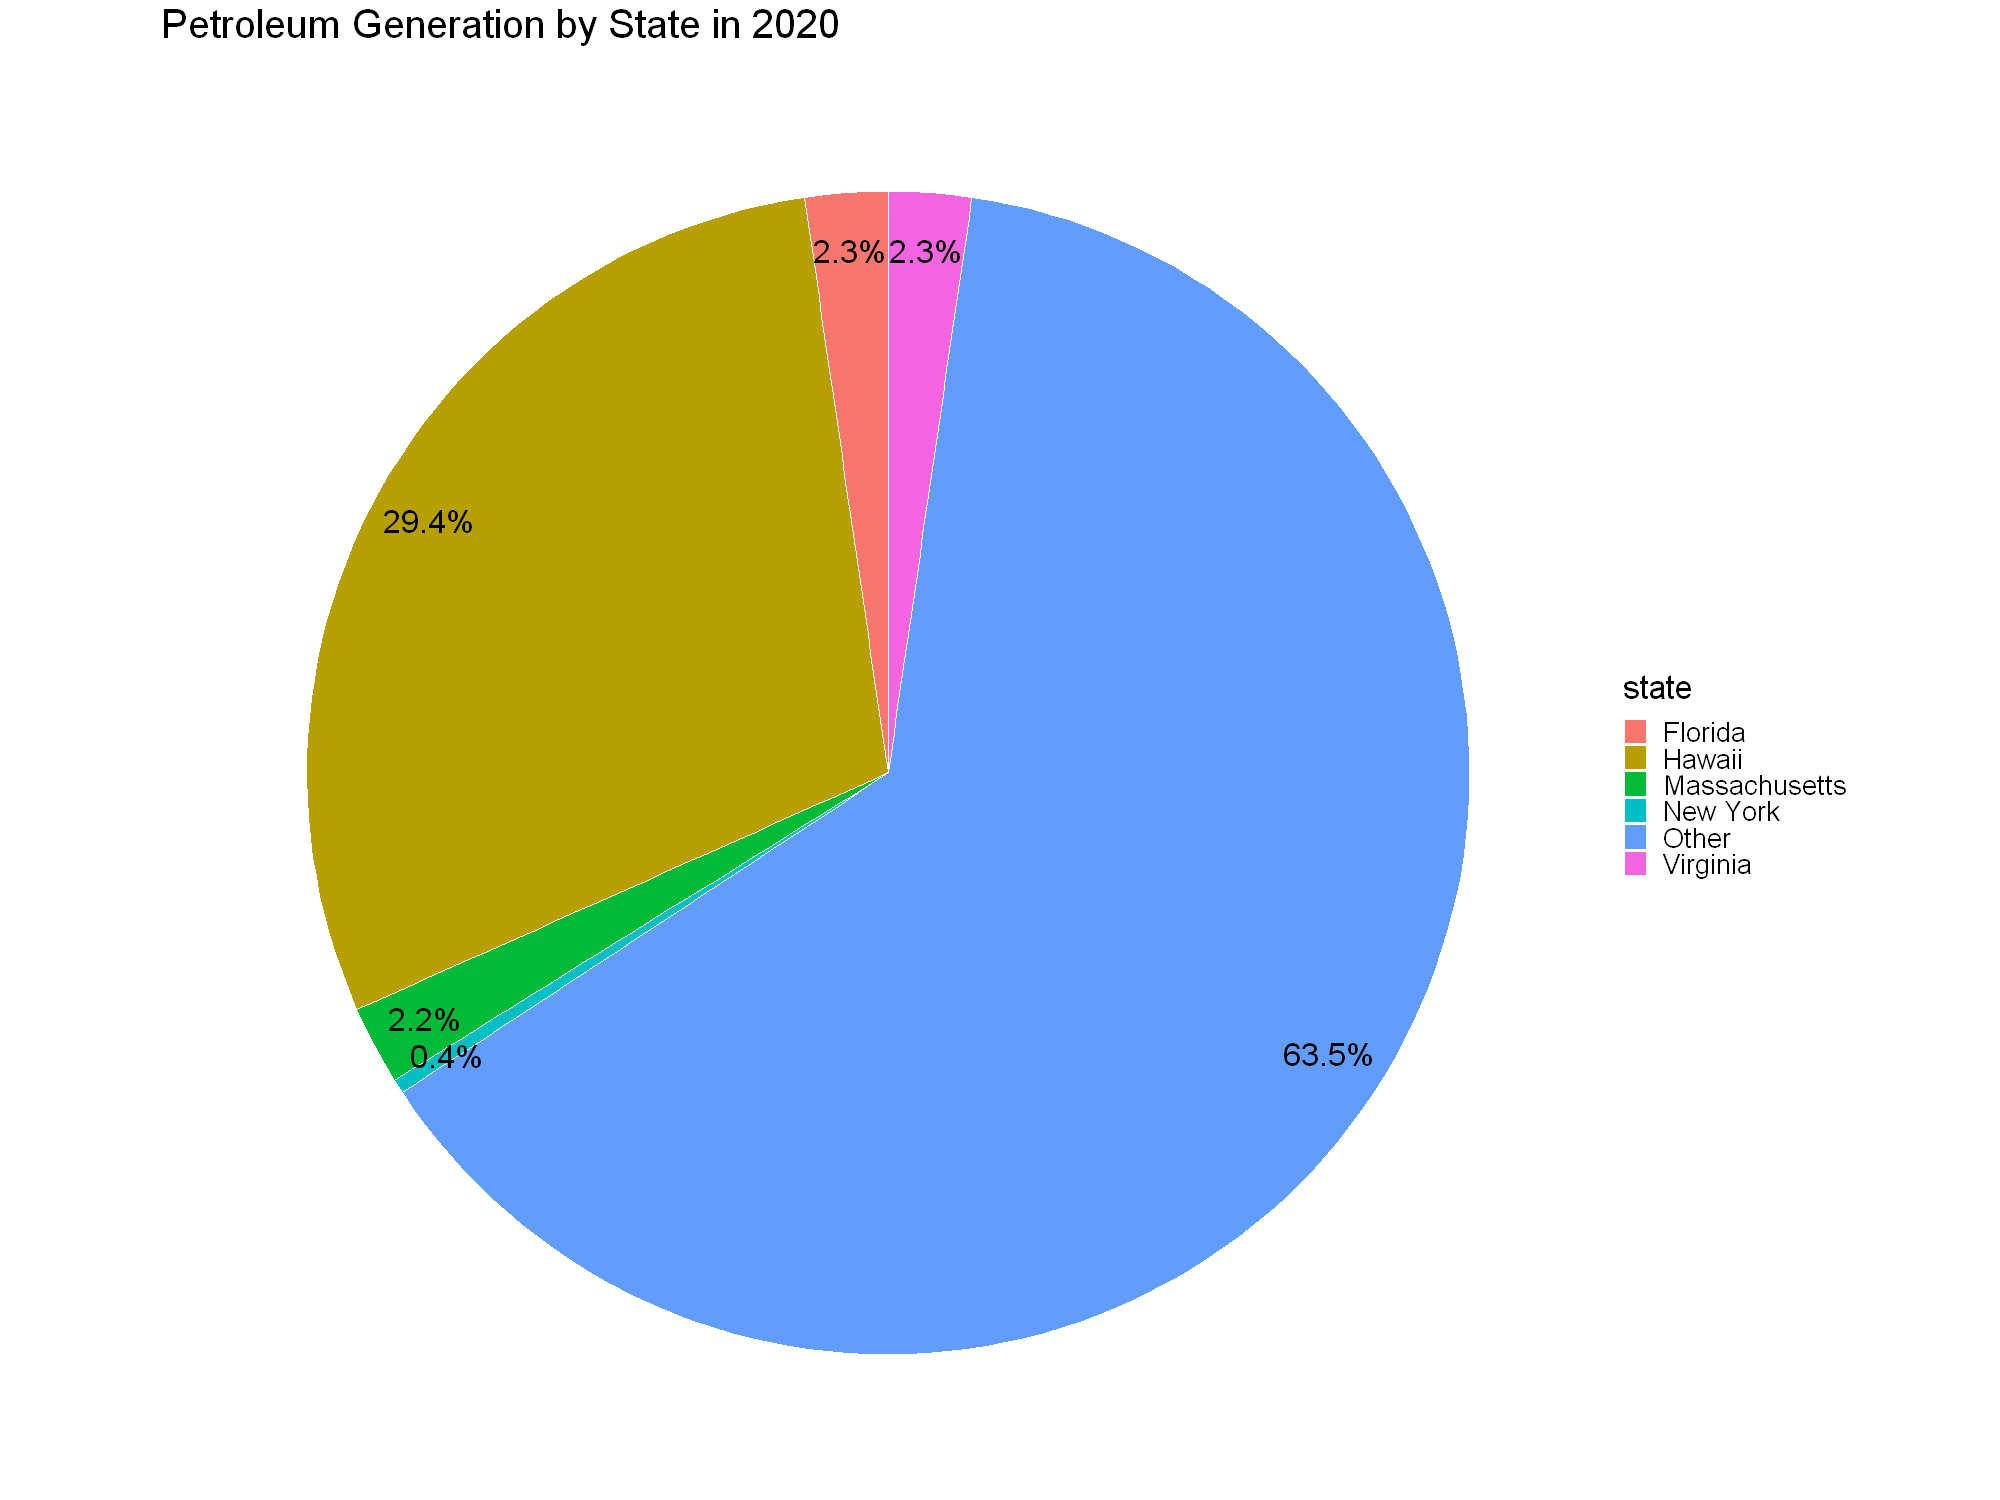

In [22]:
# Petroleum Generation in 2020 by State
df$topn <- topn_states(5)
df_2020 <- df[df$year=='2020',]
allsect.bystate <- aggregate(list(petroleum=df_2020[(df_2020$sector=='all sectors'), ]$petroleum), 
                             list(state=df_2020[(df_2020$sector=='all sectors'), ]$topn), sum)

# Get the positions
allsect.bystate <- get_pos_pie(allsect.bystate, 'state', 'petroleum')

options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(allsect.bystate) + 
    aes(x='', y=prop, fill=state) +
    geom_bar(stat='identity', width=1, color='white') +
    coord_polar('y', start=0) +
    theme_void() +
    theme(legend.position="right", aspect.ratio = 1, text = element_text(size=24)) + 
    geom_text(aes(x=1.4, y = pos, label = paste(prop, '%', sep='')), color = "black", size=8) +
    ggtitle('Petroleum Generation by State in 2020')
#     scale_fill_brewer(palette="Set1")


pdf('pet_2020_by_state_topn.pdf')
ggplot(allsect.bystate) + 
    aes(x='', y=prop, fill=state) +
    geom_bar(stat='identity', width=1, color='white') +
    coord_polar('y', start=0) +
    theme_void() +
    theme(legend.position="right", aspect.ratio = 1, text = element_text(size=24)) + 
    geom_text(aes(x=1.4, y = pos, label = paste(prop, '%', sep='')), color = "black", size=8) +
    ggtitle('Petroleum Generation by State in 2020')
#     scale_fill_brewer(palette="Set1")
dev.off()

png 
  2

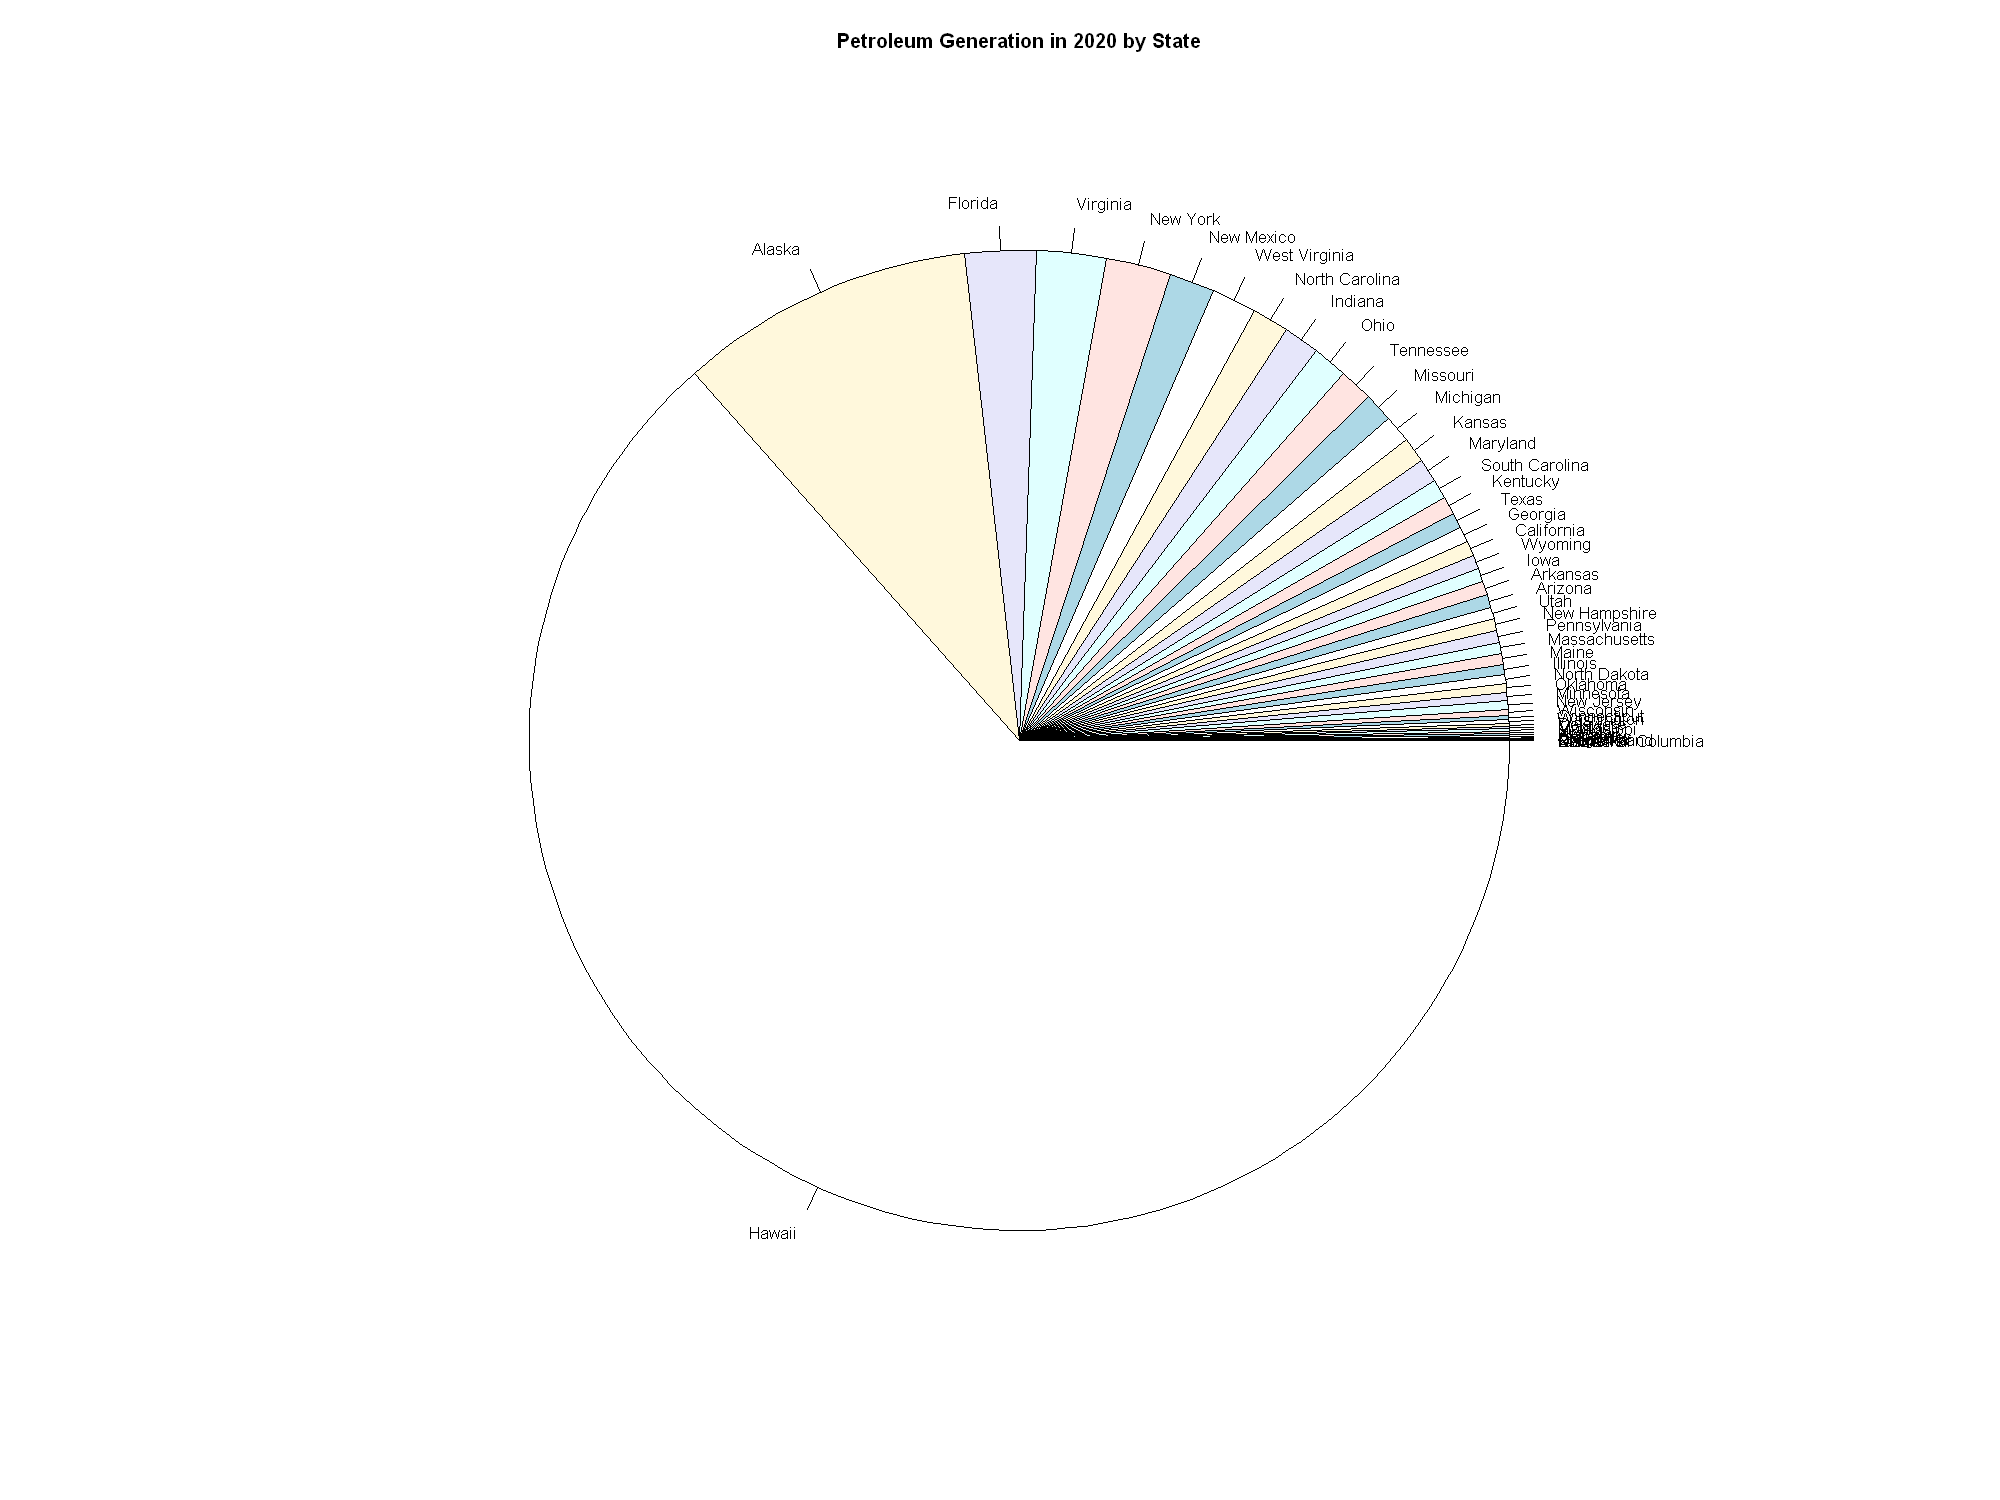

In [23]:
# Petroleum Generation in 2020 by State
allsect.bystate.2020 <- tapply(df[(df$sector=='all sectors') & (df$year == '2020'), ]$petroleum, 
                               list(df[(df$sector=='all sectors') & (df$year == '2020'), ]$state), sum)
pie(sort(allsect.bystate.2020), main='Petroleum Generation in 2020 by State')

pdf('pet_2020_by_state.pdf')
pie(sort(allsect.bystate.2020), main='Petroleum Generation in 2020 by State')
dev.off()

### Petroleum Generation by Sector <a class="anchor" id="dp3"></a>

In [24]:
library(stringi)
wrapper <- function(arr, width) {
    i = 1
    for(x in arr) {
        arr[i] <- paste(stri_wrap(x, width), collapse = "\n")
        i = i + 1
    }
    return(arr)
}

png 
  2

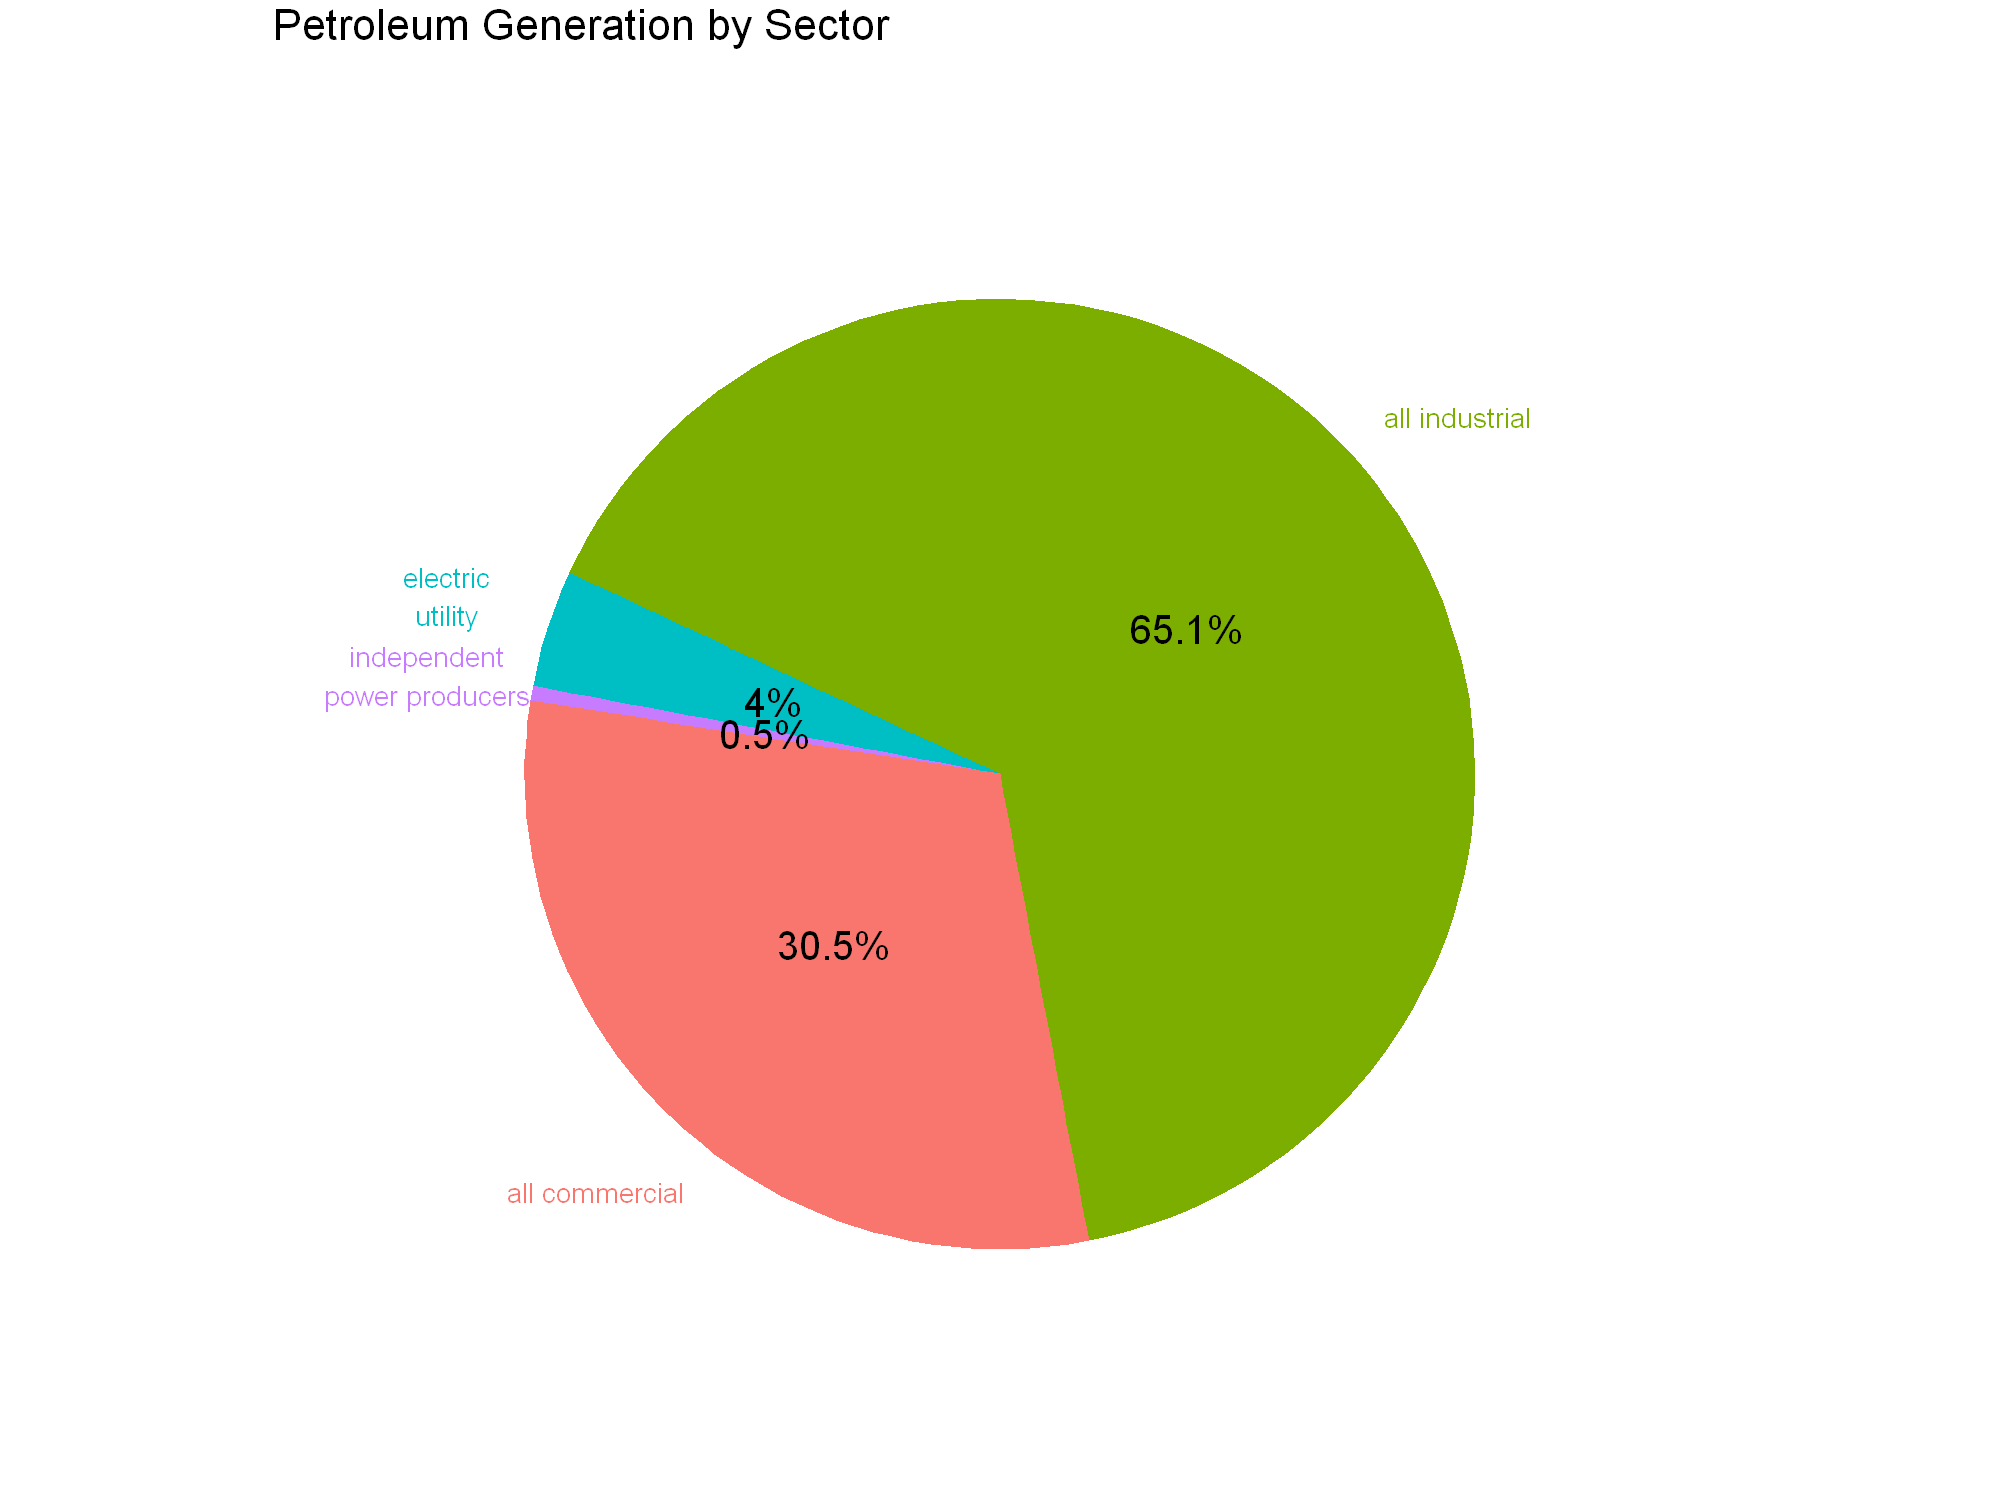

In [25]:
nallsector.bysector <- aggregate(df[(df$sector!='all sectors'), ]$petroleum, 
                                 list(sector=df[(df$sector!='all sectors'), ]$sector), 
                                 sum)

colnames(nallsector.bysector)[2] <- 'petroleum'

nallsector.bysector <- get_pos_pie(nallsector.bysector, 'sector', 'petroleum')
nallsector.bysector$label <- wrapper(nallsector.bysector$sector, width=10)

options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(nallsector.bysector) + 
    aes(x='', y=prop, fill=sector) + 
    geom_bar(stat='identity') +
    coord_polar('y', start=30) + 
    ggtitle('Petroleum Generation by Sector') +
    theme_void() +
    theme(legend.position="none", aspect.ratio = 1, text = element_text(size=26)) +
    geom_text(aes(x=1, y = pos, label = paste(prop, '%', sep='')), color='black', size=10) + 
    geom_text(aes(x=1.65, y = pos, label = wrapper(sector, width=15), color=sector), size=7,angle=0)


pdf('pet_by_sect_all_time_ggplot.pdf')
ggplot(nallsector.bysector) + 
    aes(x='', y=prop, fill=sector) + 
    geom_bar(stat='identity') +
    coord_polar('y', start=30) + 
    ggtitle('Petroleum Generation by Sector') +
    theme_void() +
    theme(legend.position="none", aspect.ratio = 1, text = element_text(size=26)) +
    geom_text(aes(x=1, y = pos, label = paste(prop, '%', sep='')), color='black', size=10) + 
    geom_text(aes(x=1.65, y = pos, label = wrapper(sector, width=15), color=sector), size=7,angle=0)
dev.off()

In [184]:
nallsector.bysector

all commercial              all industrial 
                         66                         286 
           electric utility independent power producers 
                       7374                        1846

In [186]:
nallsector.bysector

sector,petroleum,sector_col
<chr>,<dbl>,<chr>
all commercial,66,#458B00
all industrial,286,#C1AF18
electric utility,7374,#D88018
independent power producers,1846,#8B0000


In [189]:
nallsector.bysector

sector,petroleum,sector_col
<chr>,<dbl>,<chr>
all commercial,66,#458B00
all industrial,286,#C1AF18
electric utility,7374,#D88018
independent power producers,1846,#8B0000


In [194]:
7374/9572

[1] 0.7703719

In [192]:
sum(nallsector.bysector$petroleum)

[1] 9572

png 
  2

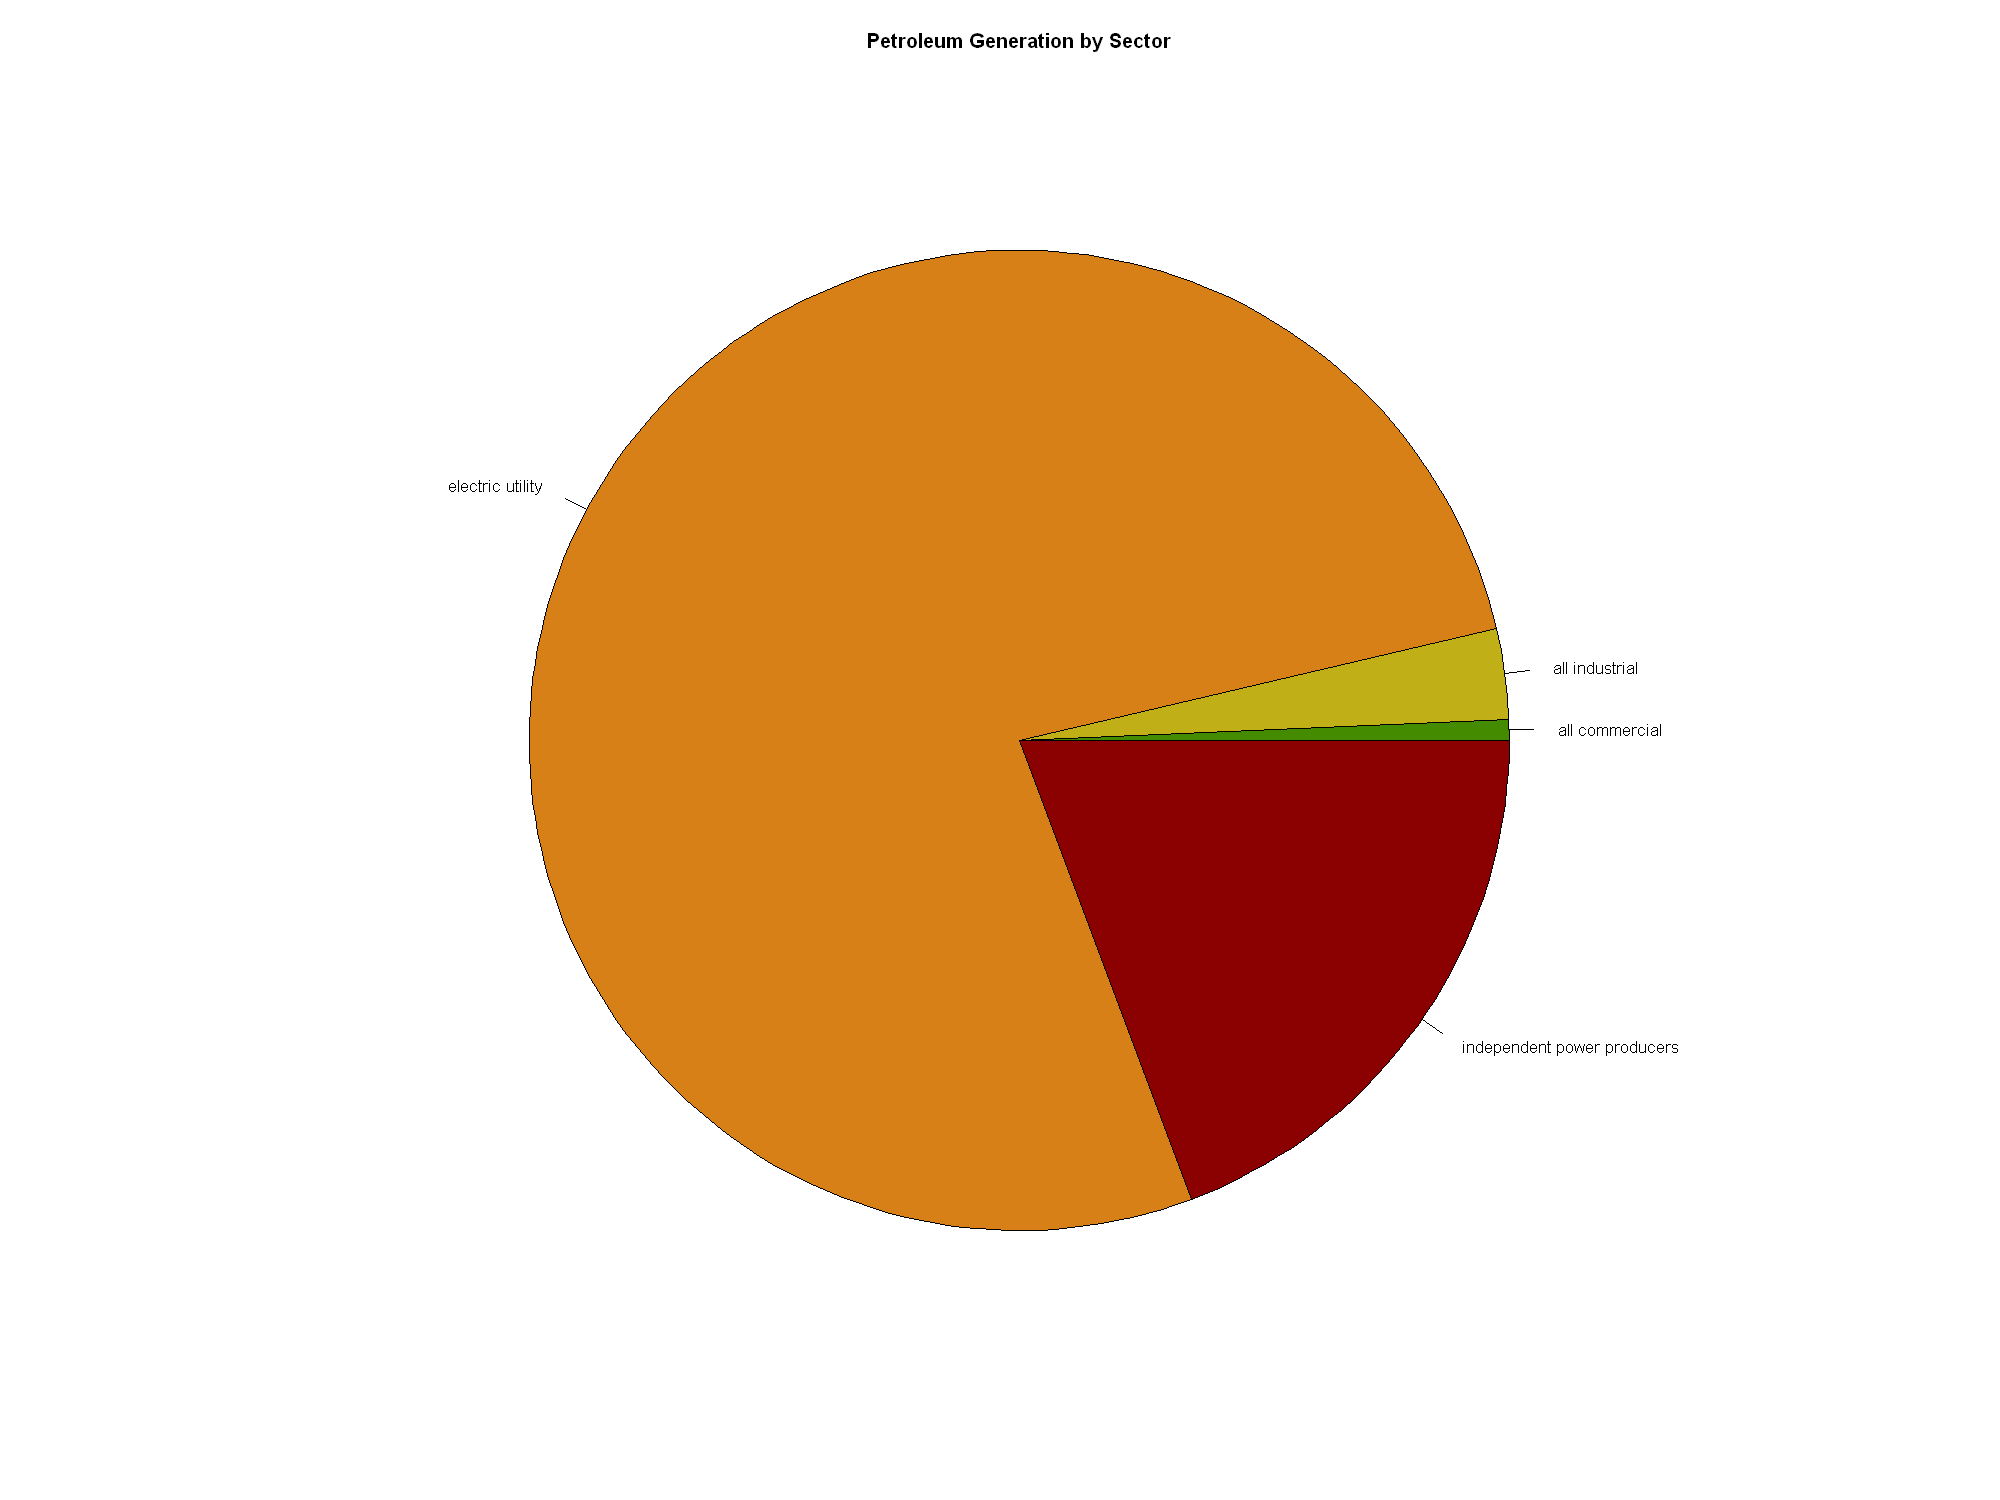

In [190]:
# Petroleum Generation by Sector
fun_color_range <- colorRampPalette(c("chartreuse4", "goldenrod1", "darkred"))
colpallete <- fun_color_range(length(unique(temp$sector)))

nallsector.bysector <- aggregate(list(petroleum=df[(df$sector!='all sectors') & (df$year ==2020), ]$petroleum), list(sector=df[(df$sector!='all sectors') & (df$year ==2020), ]$sector), sum)
nallsector.bysector$sector_col <- get_col_pallette(nallsector.bysector$sector, colorRampPalette(c("chartreuse4", "goldenrod1", "darkred")))

pie(x = nallsector.bysector$petroleum, label=nallsector.bysector$sector, col=nallsector.bysector$sector_col, main='Petroleum Generation by Sector')

pdf('pet_by_sect_all_time.pdf')
pie(x = nallsector.bysector$petroleum, label=nallsector.bysector$sector, col=nallsector.bysector$sector_col, main='Petroleum Generation by Sector')
dev.off()

### Petroleum Distribution <a class="anchor" id="dp4"></a>

png 
  2

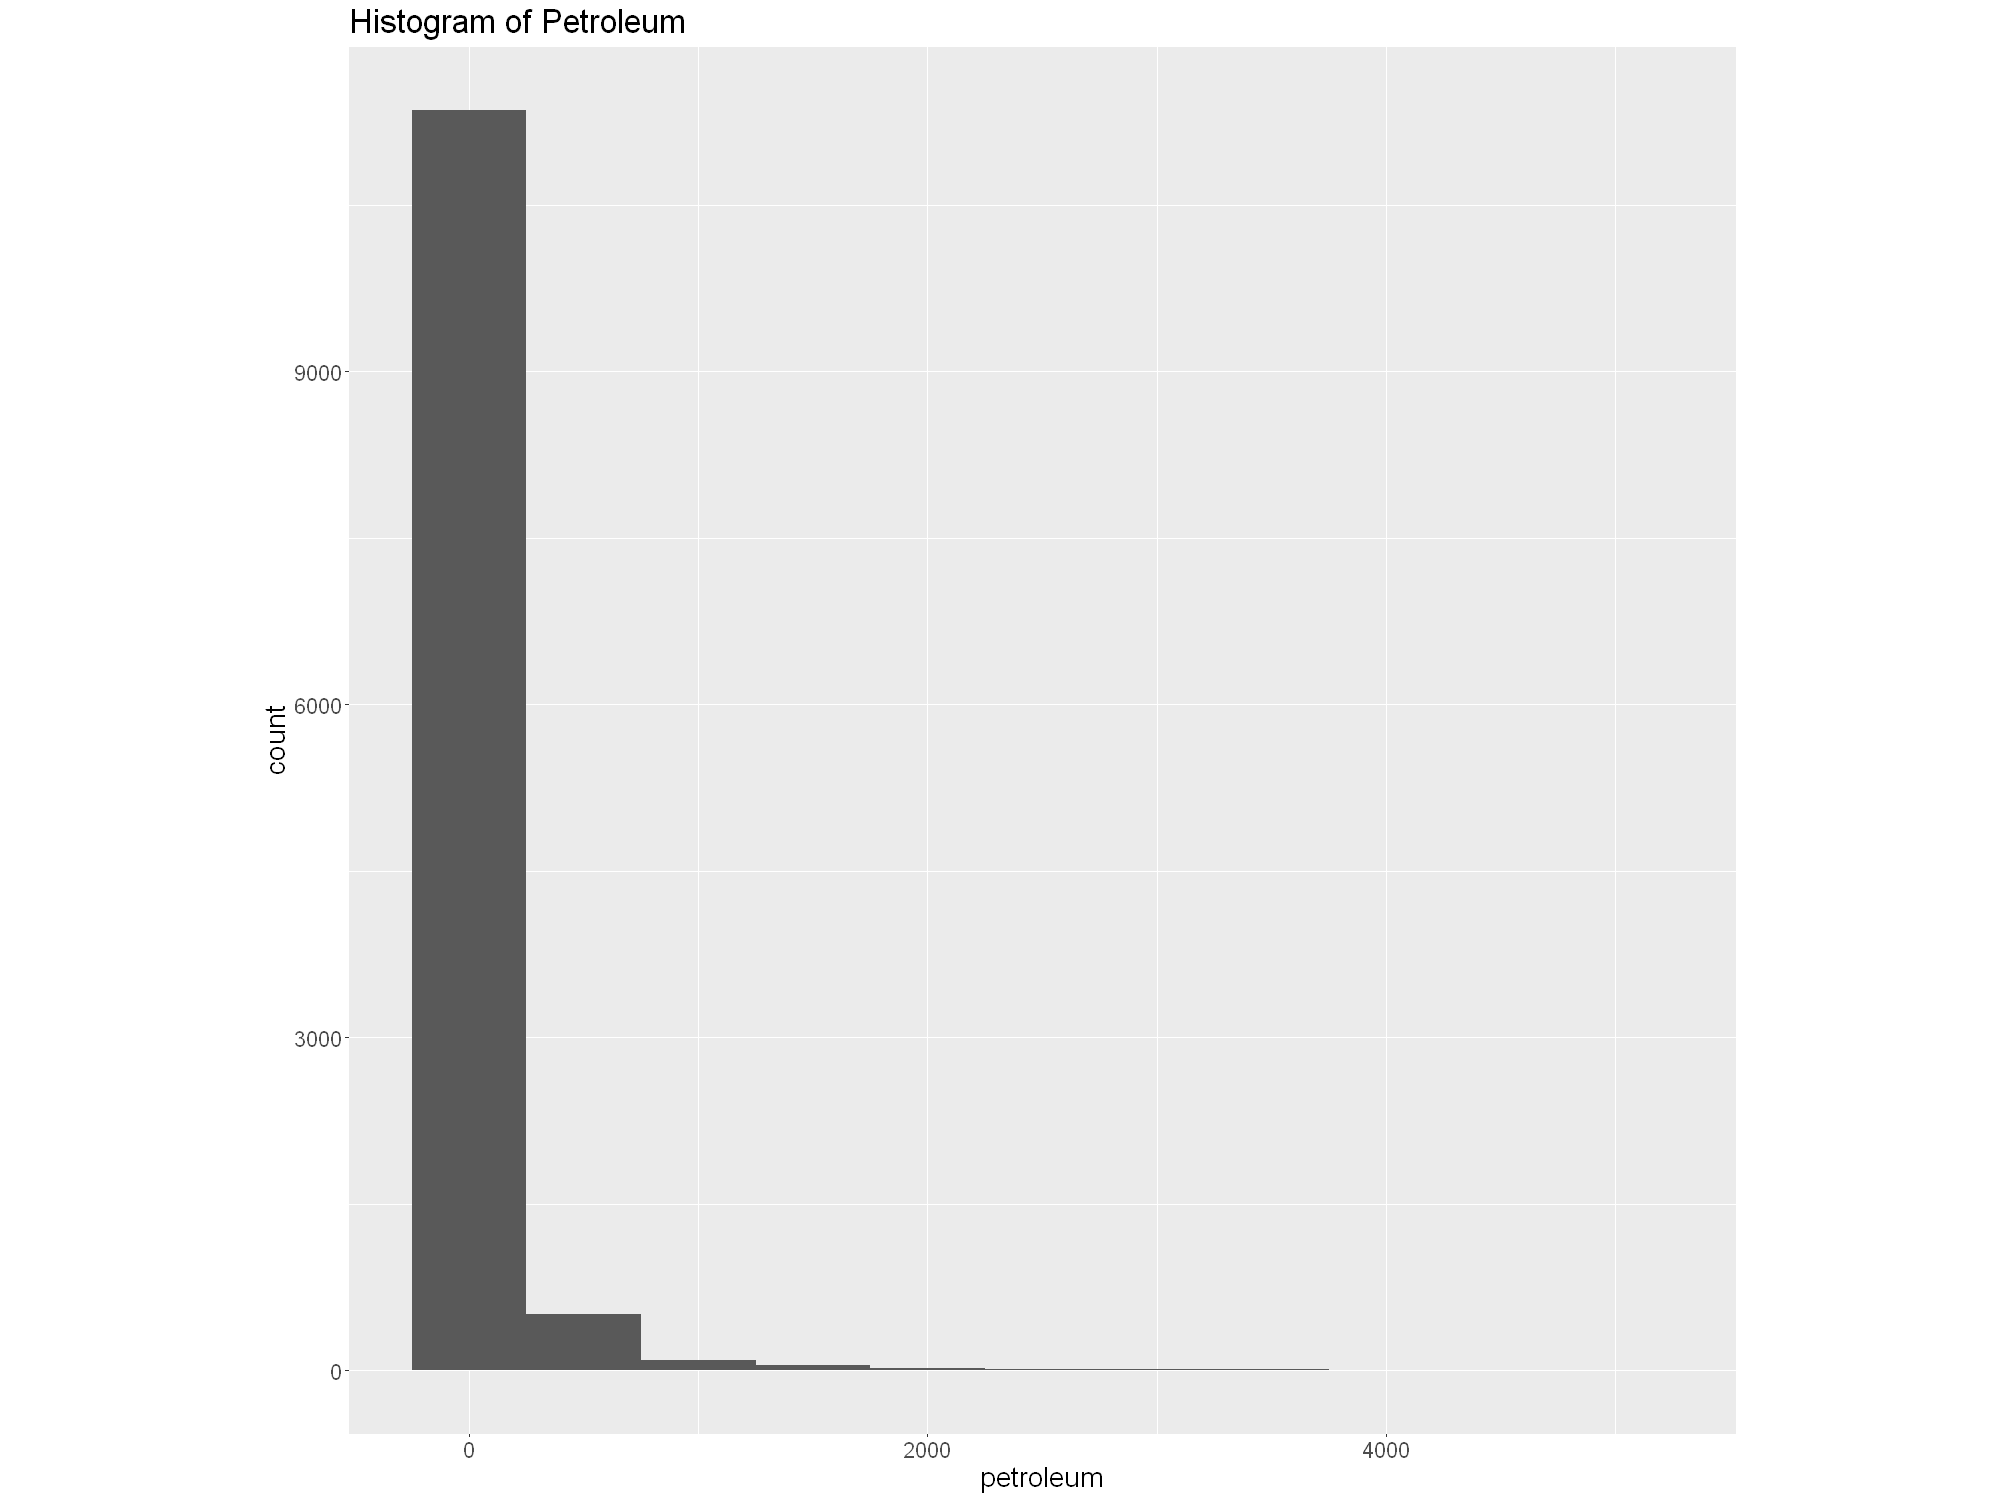

In [27]:
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(df[df$sector=='all sectors', ]) + 
    aes(x=petroleum) + 
    geom_histogram(binwidth=500) +
    ggtitle('Histogram of Petroleum') +
    theme(aspect.ratio = 1, text = element_text(size=20))

pdf('pet_hist_pet_ggplot.pdf')

ggplot(df[df$sector=='all sectors', ]) + 
    aes(x=petroleum) + 
    geom_histogram(binwidth=500) +
    ggtitle('Histogram of Petroleum') +
    theme(aspect.ratio = 1, text = element_text(size=20))

dev.off()

In [28]:
pdf('pet_hist_pet.pdf')
hist(df$petroleum)
dev.off()

png 
  2

## Multi-Dimensional Plots <a class="anchor" id="MP"></a>

### Overall Contribution Over Time <a class="anchor" id="mp1"></a>

png 
  2

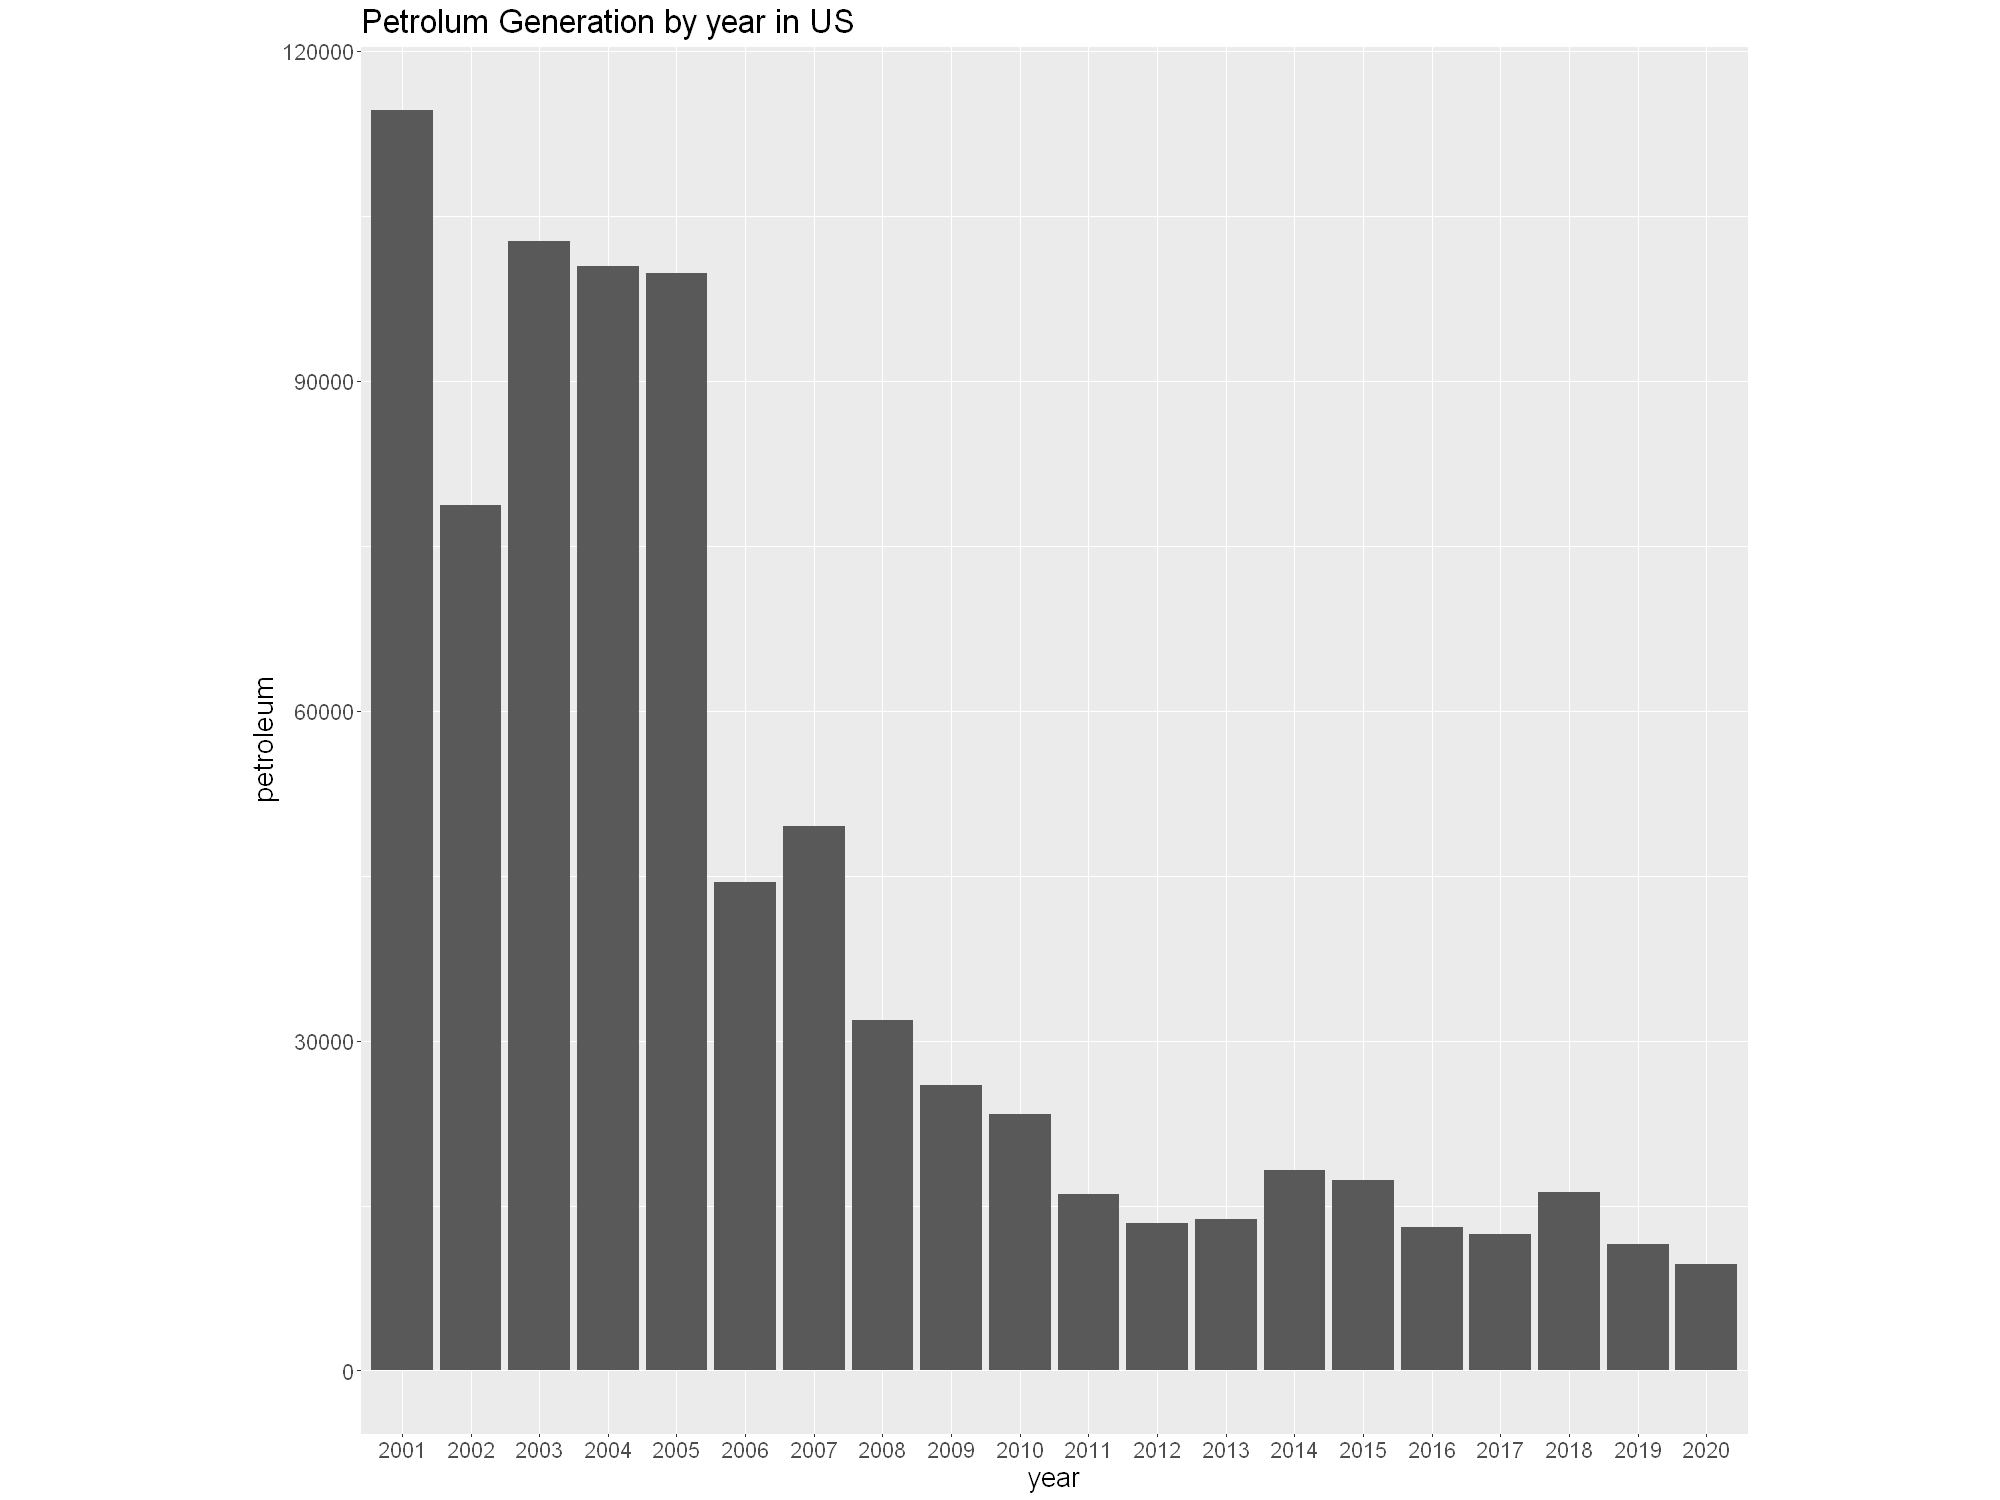

In [29]:
# Petrolum Generation by year in US
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
allsect.byyear <- aggregate(df[(df$sector=='all sectors'), ]$petroleum, list(year=df[(df$sector=='all sectors'), ]$year), sum)
colnames(allsect.byyear)[2] <- 'petroleum'
ggplot(allsect.byyear) +
    aes(x=year, y=petroleum) + 
    geom_bar(stat='identity') +
    labs(title='Petrolum Generation by year in US', 
         xlab='Year', 
         ylab='Petroleum (thousand megawatthours)') +
    theme(aspect.ratio = 1, text = element_text(size=20))

pdf('pet_bar_over_time_ggplot.pdf')
ggplot(allsect.byyear) +
    aes(x=year, y=petroleum) + 
    geom_bar(stat='identity') +
    labs(title='Petrolum Generation by year in US', 
         xlab='Year', 
         ylab='Petroleum (thousand megawatthours)') +
    theme(aspect.ratio = 1, text = element_text(size=20))
dev.off()

png 
  2

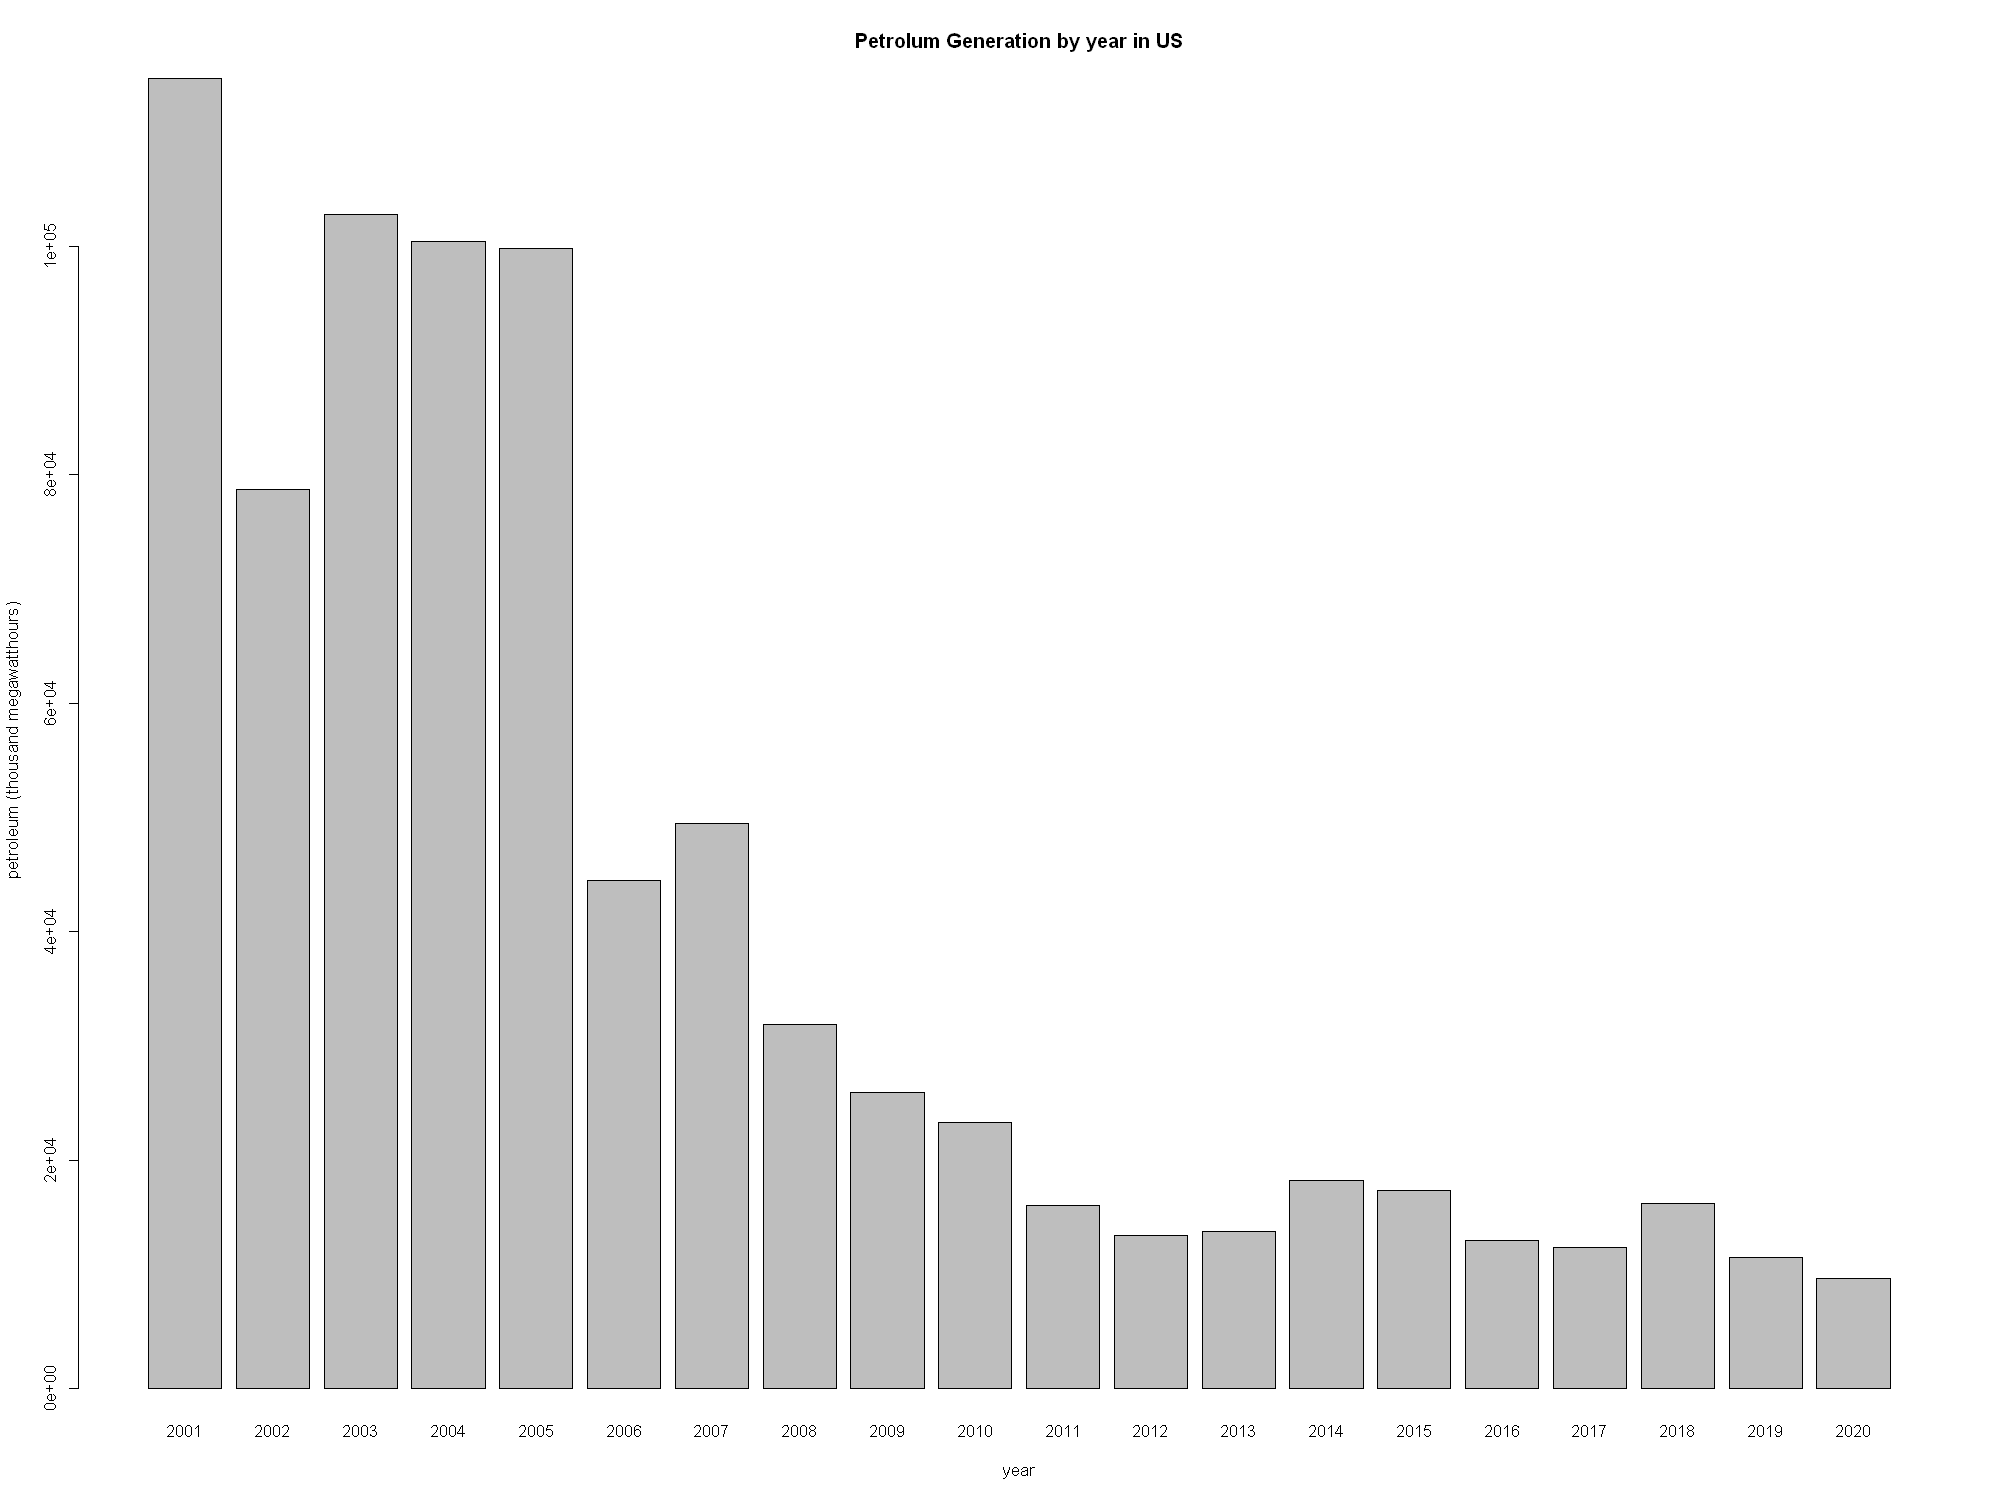

In [30]:
# Petrolum Generation by year in US
allsect.byyear <- tapply(df[(df$sector=='all sectors'), ]$petroleum, list(df[(df$sector=='all sectors'), ]$year), sum)
barplot(allsect.byyear, main='Petrolum Generation by year in US',xlab='year', ylab='petroleum (thousand megawatthours)')

pdf('pet_bar_over_time.pdf')
barplot(allsect.byyear, main='Petrolum Generation by year in US',xlab='year', ylab='petroleum (thousand megawatthours)')
dev.off()


png 
  2

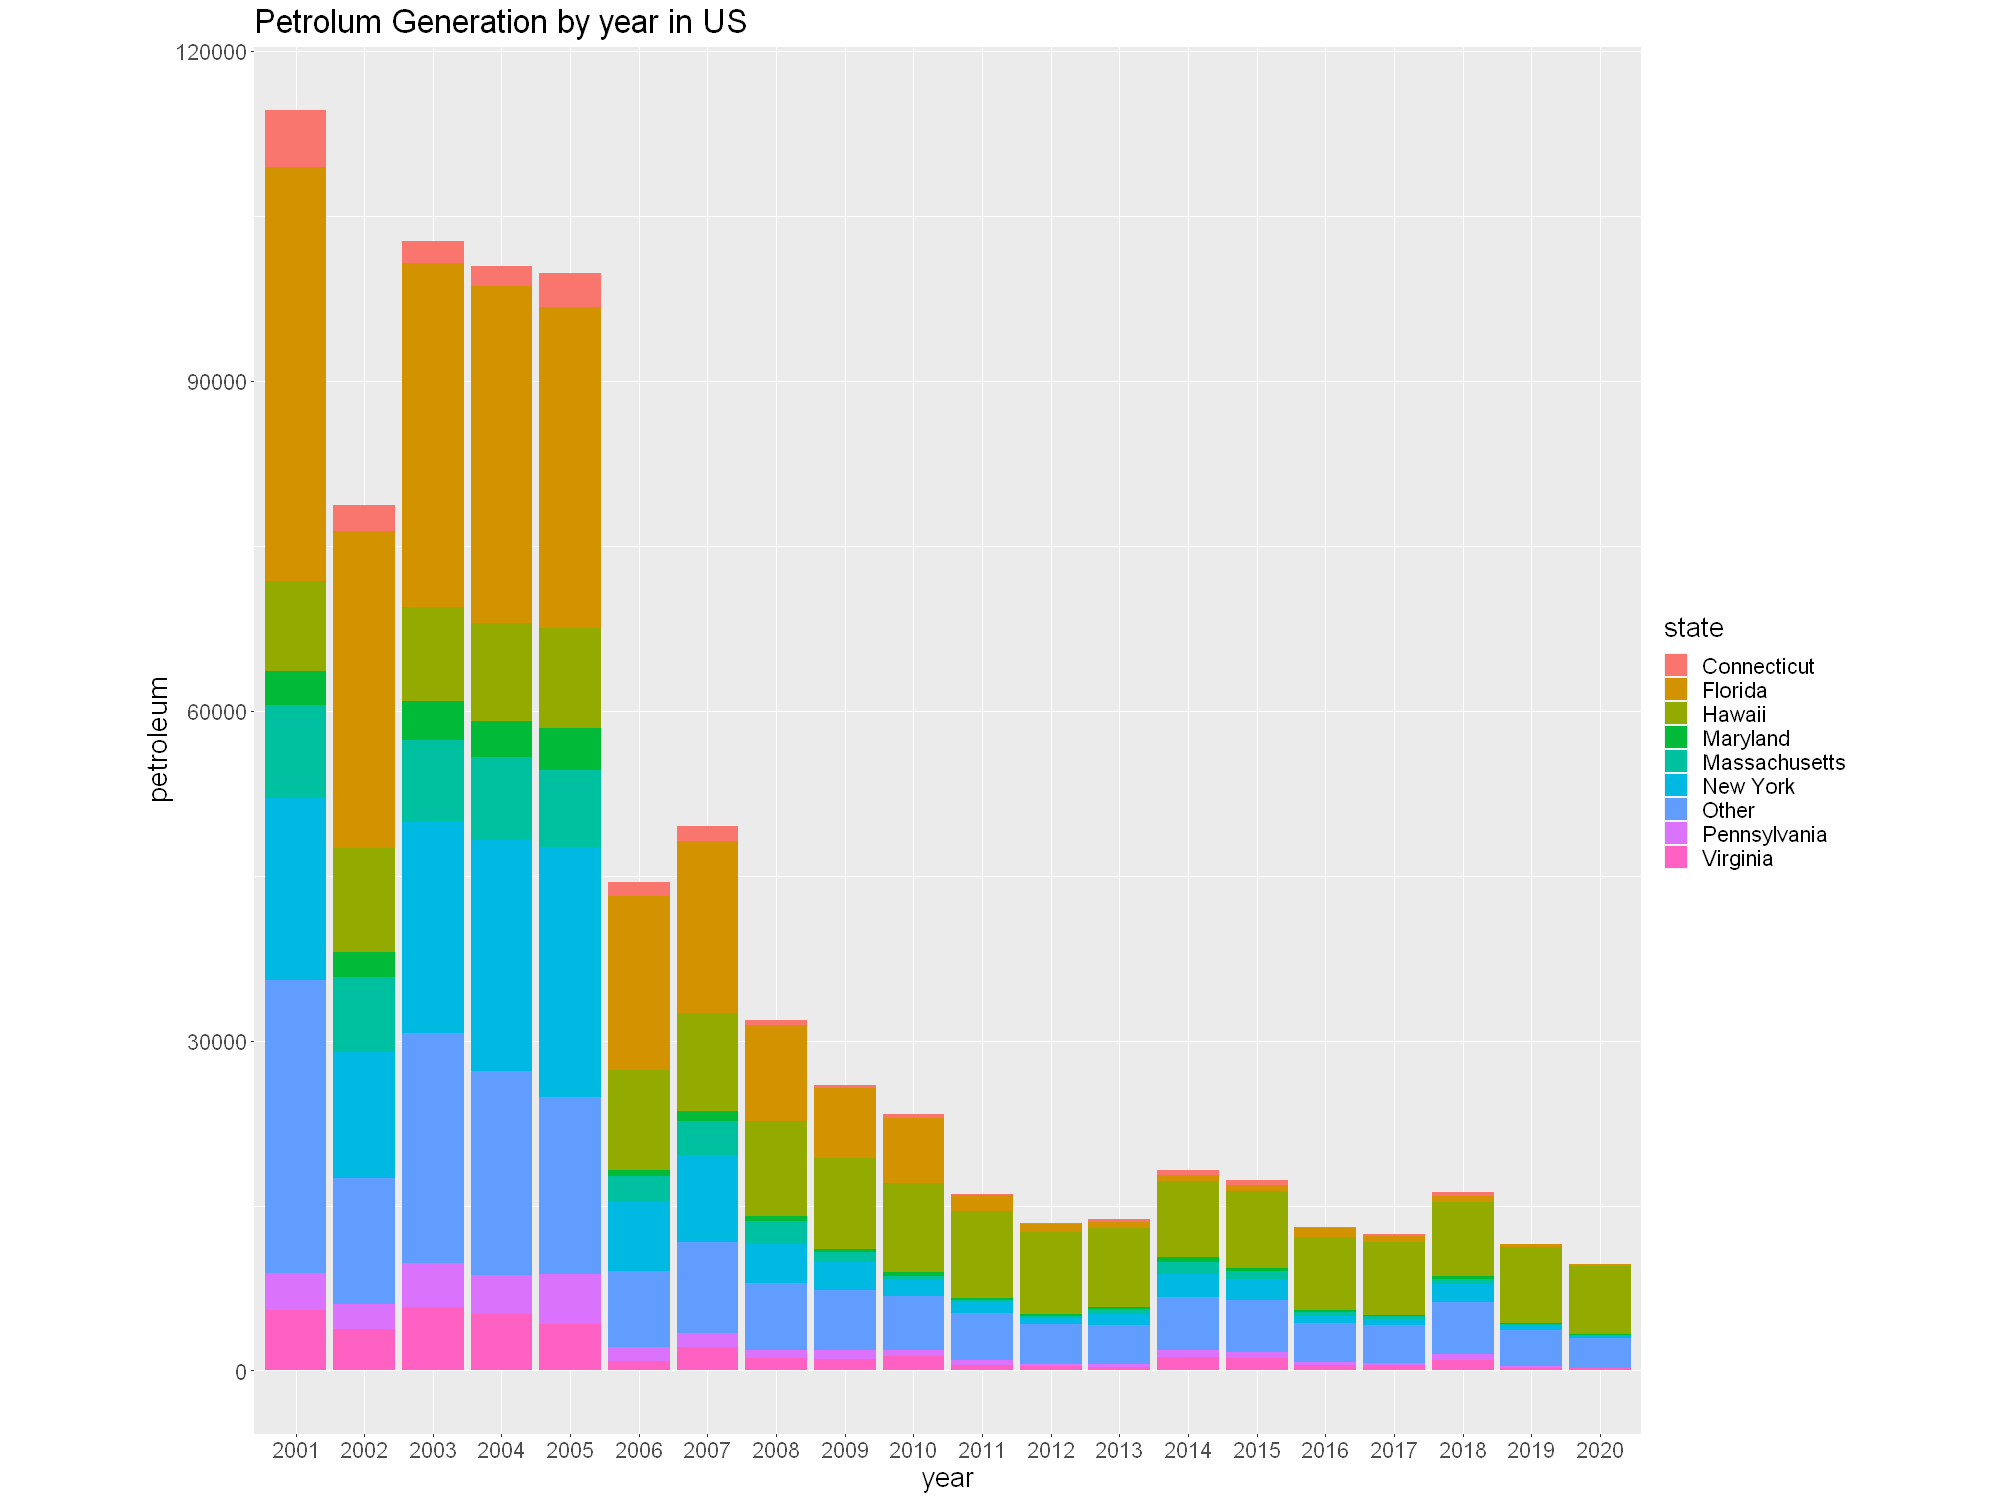

In [31]:
# Petrolum Generation by year in US
df$topn <- topn_states(8)
df_all_sect <- df[df$sector=='all sectors', ]
temp <- aggregate(list(petroleum=df_all_sect$petroleum), list(year=df_all_sect$year, state=df_all_sect$topn), sum)

options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(temp) +
    aes(x=year, y=petroleum, fill=state) + 
    geom_bar(stat='identity') +
    labs(title='Petrolum Generation by year in US', 
         xlab='Year', 
         ylab='Petroleum (thousand megawatthours)') +
    theme(aspect.ratio = 1, text = element_text(size=20))

pdf('pet_over_time_by_state_topn.pdf')
ggplot(temp) +
    aes(x=year, y=petroleum, fill=state) + 
    geom_bar(stat='identity') +
    labs(title='Petrolum Generation by year in US', 
         xlab='Year', 
         ylab='Petroleum (thousand megawatthours)') +
    theme(aspect.ratio = 1, text = element_text(size=20))
dev.off()

png 
  2

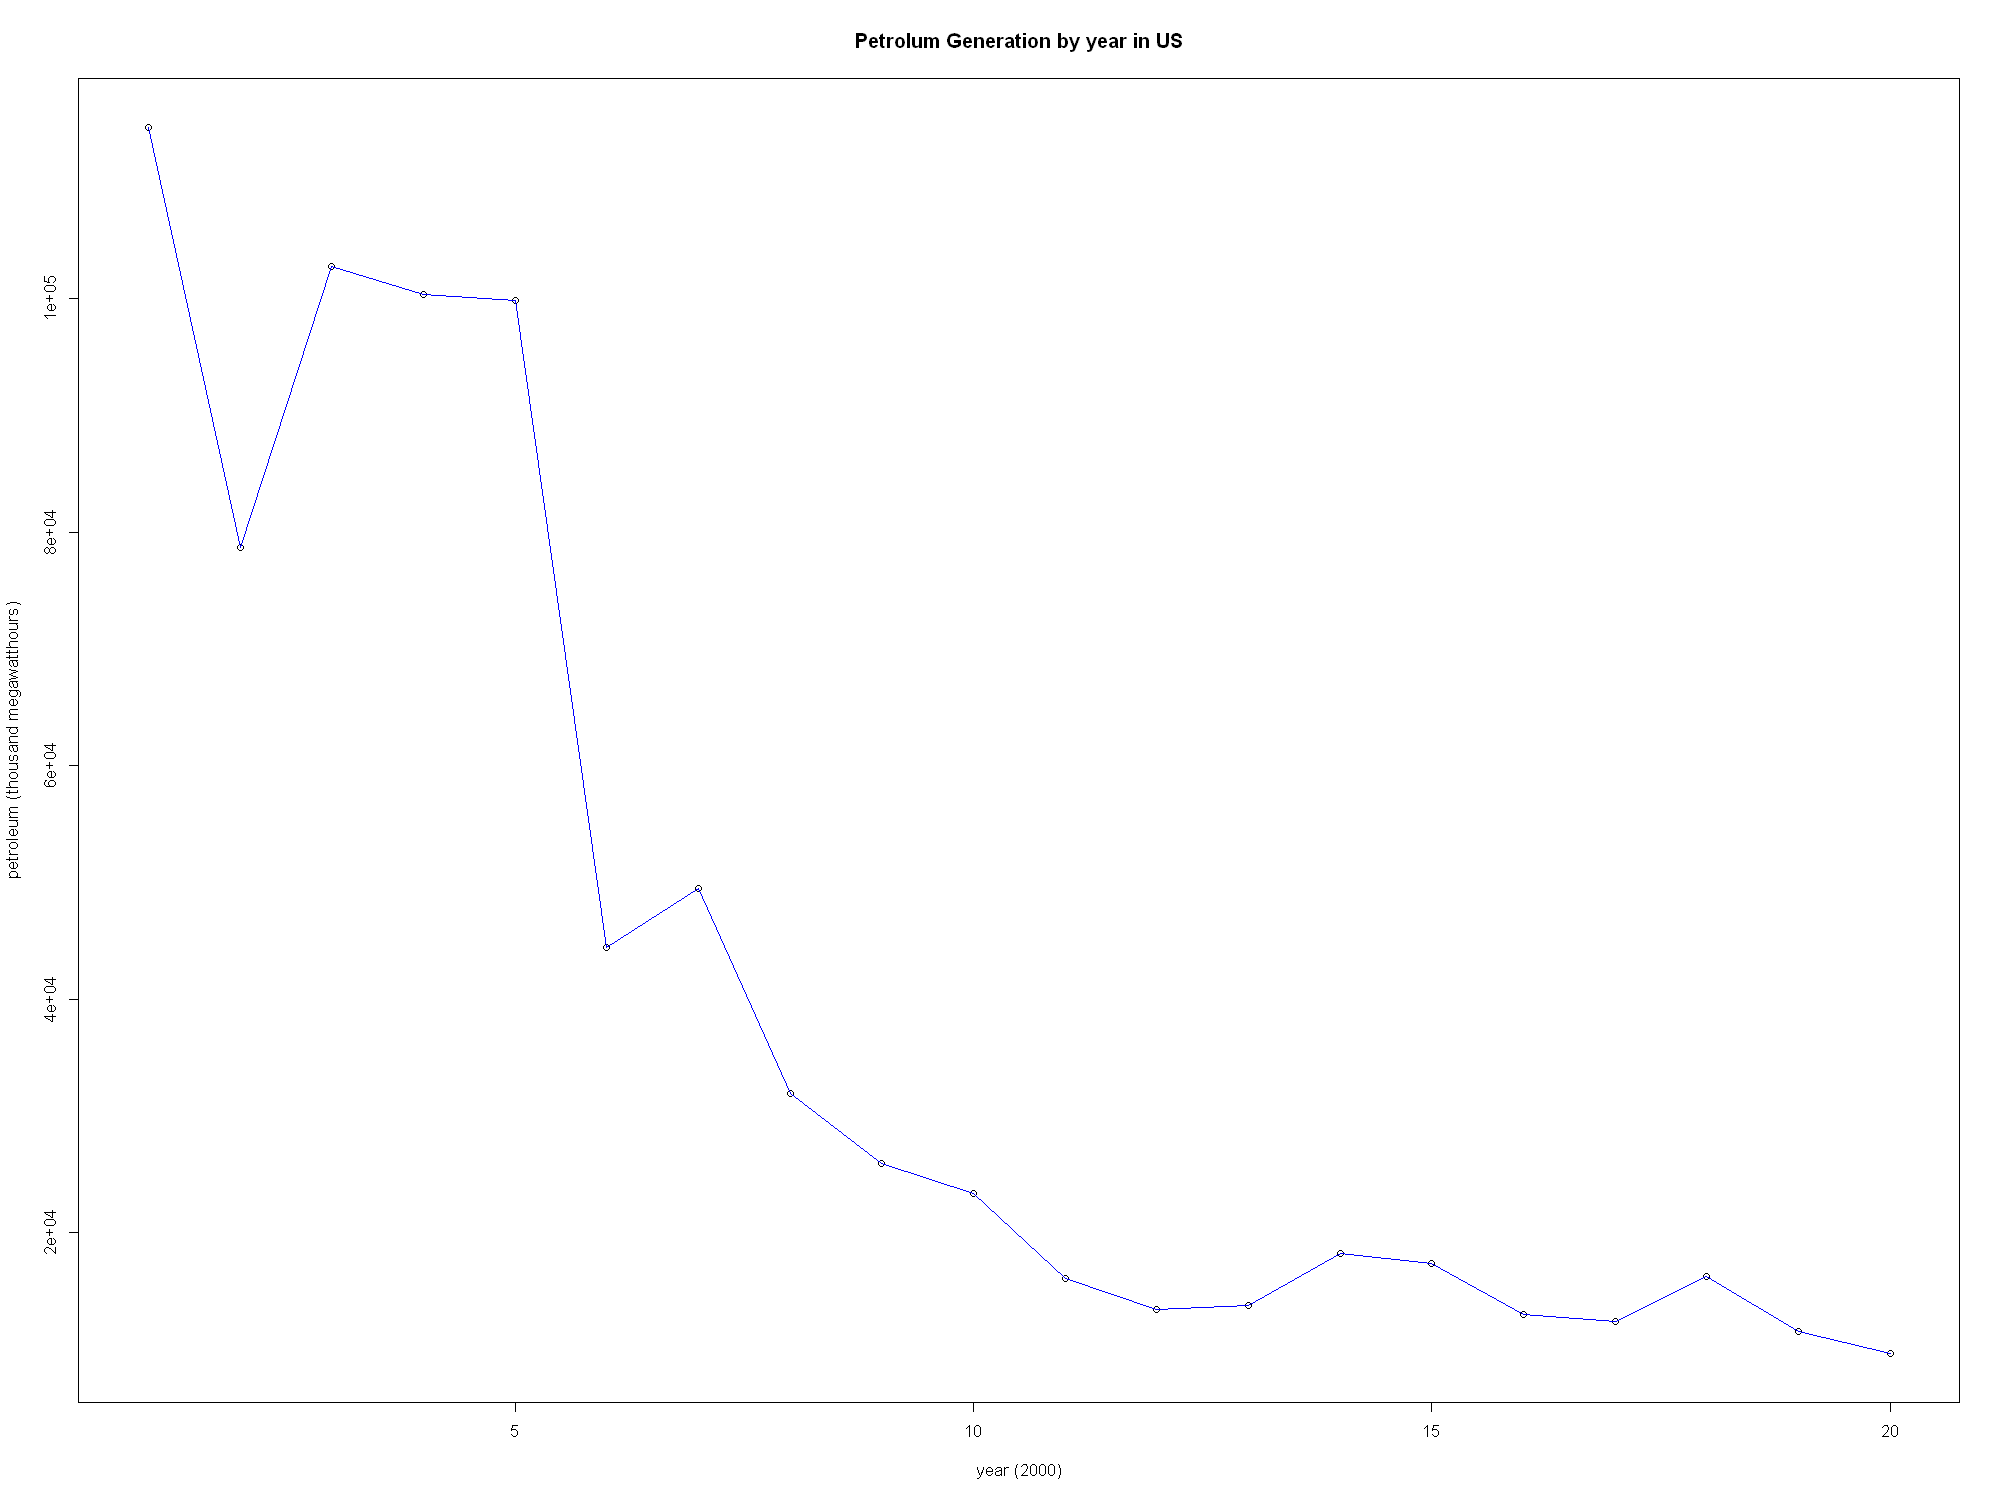

In [32]:
# Petrolum Generation by year in US
allsect.byyear <- tapply(df[(df$sector=='all sectors'), ]$petroleum, list(df[(df$sector=='all sectors'), ]$year), sum)
plot(allsect.byyear, main='Petrolum Generation by year in US',
     xlab='year (2000)', 
     ylab='petroleum (thousand megawatthours)')
lines(allsect.byyear, col='blue')

pdf('pet_US_all_time.pdf')
plot(allsect.byyear, main='Petrolum Generation by year in US',
     xlab='year (2000)', 
     ylab='petroleum (thousand megawatthours)')
lines(allsect.byyear, col='blue')
dev.off()

### Time Series Decomposition <a class="anchor" id="mp2"></a>

In [33]:
# Petrolum Generation by year in US
allsect.bymonth <- tapply(df[(df$sector=='all sectors'), ]$petroleum, 
                          list(df[(df$sector=='all sectors'), ]$date), sum)
allsect.bymonth <- ts(allsect.bymonth, frequency=12)

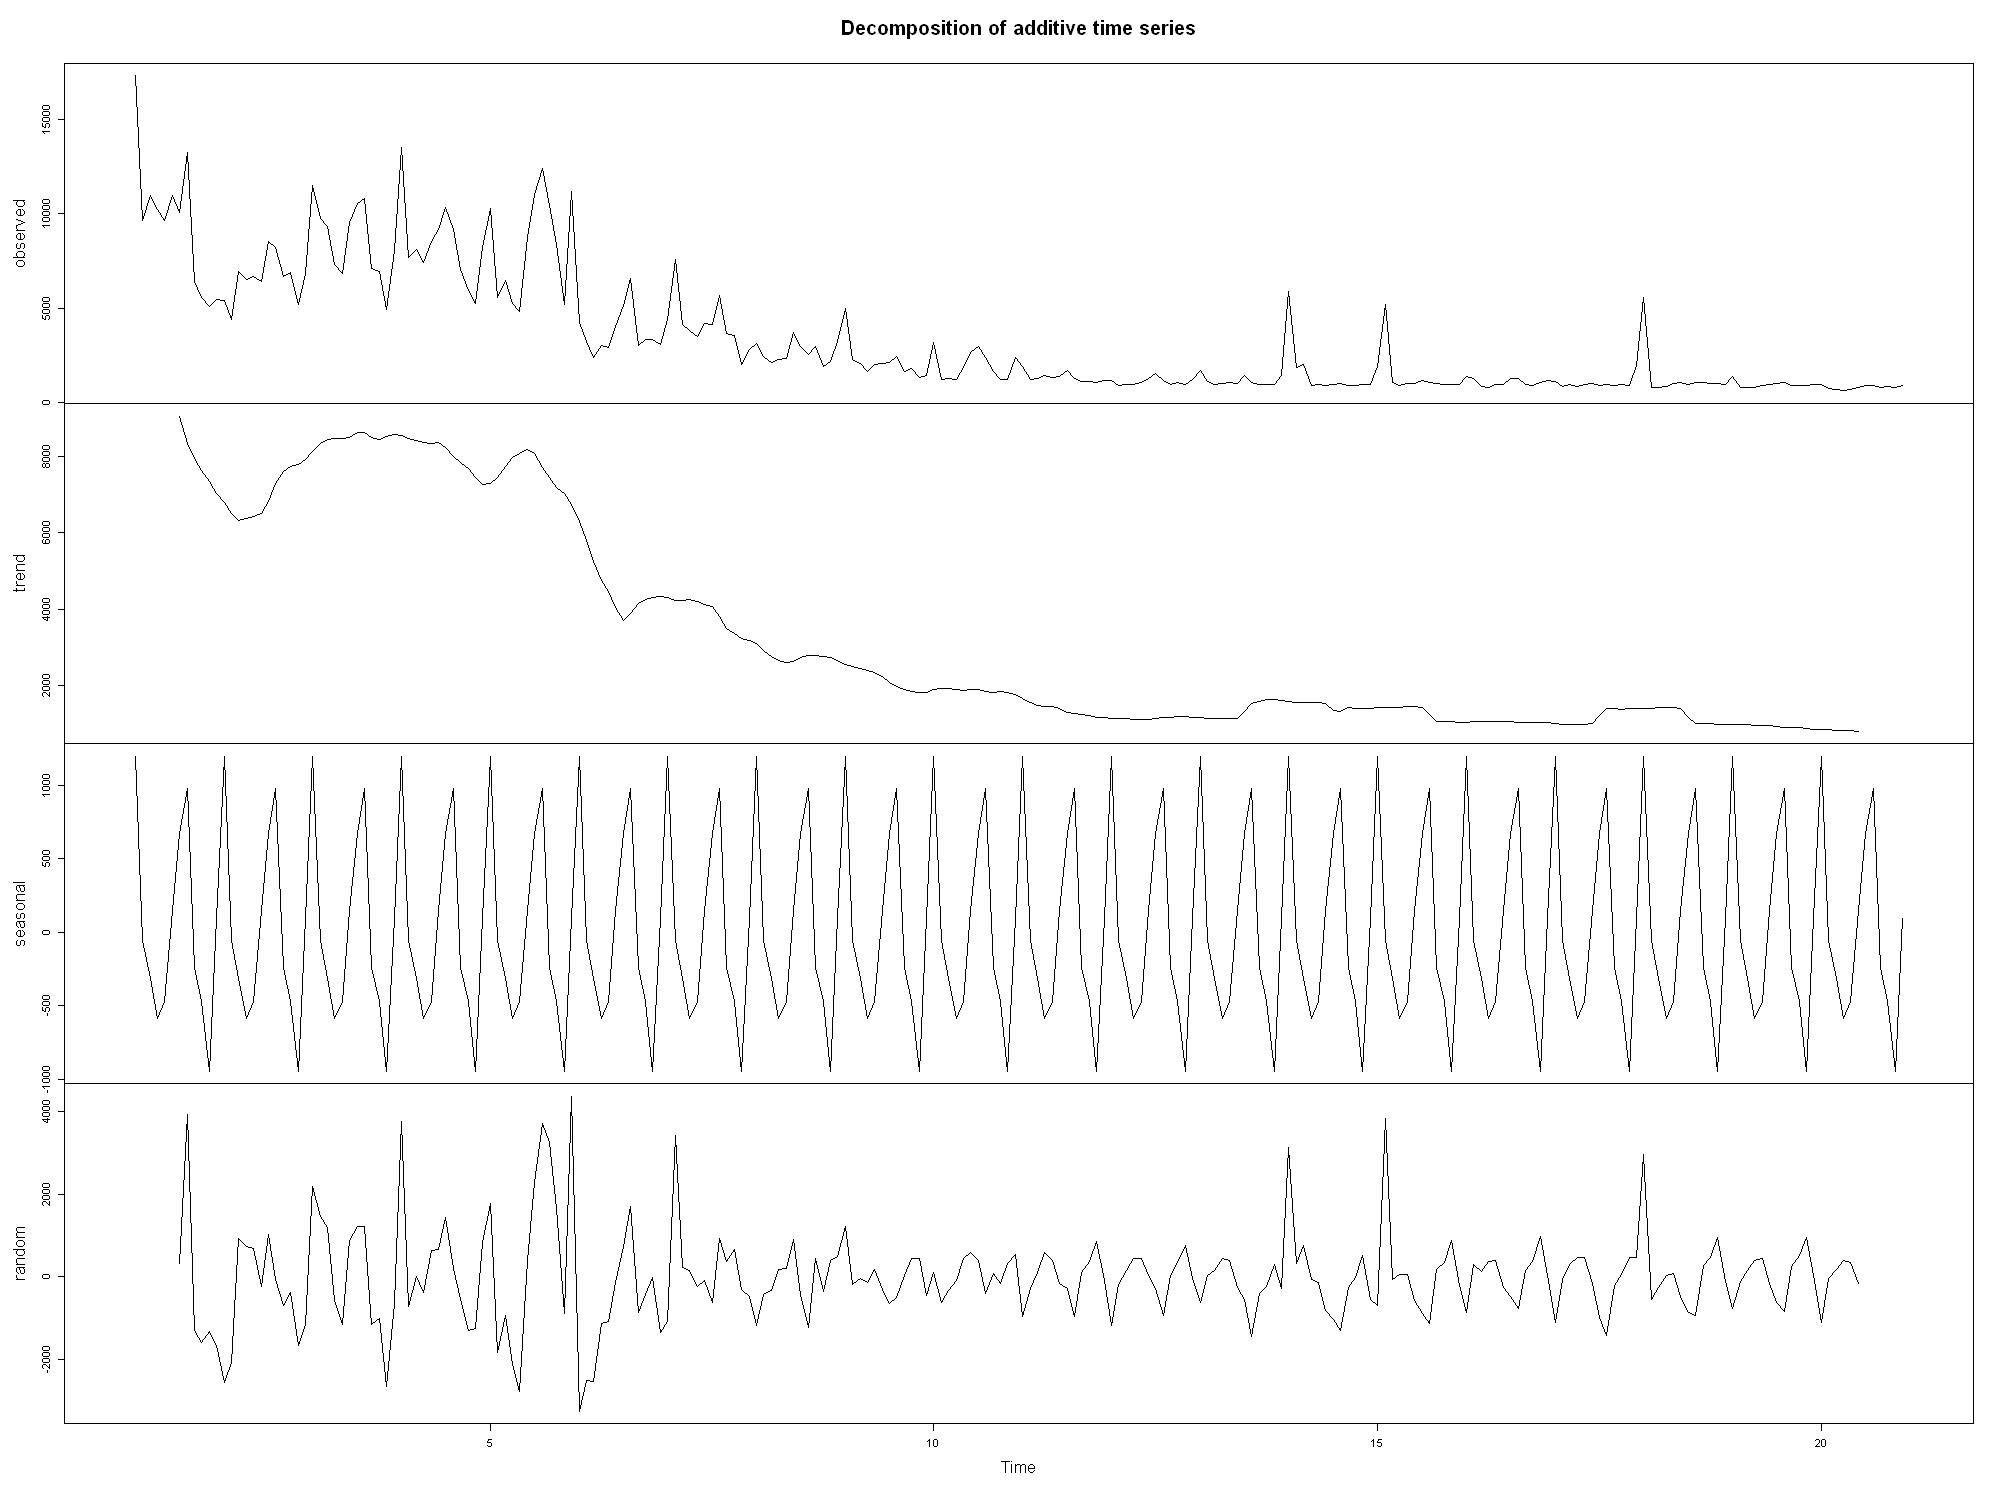

png 
  2

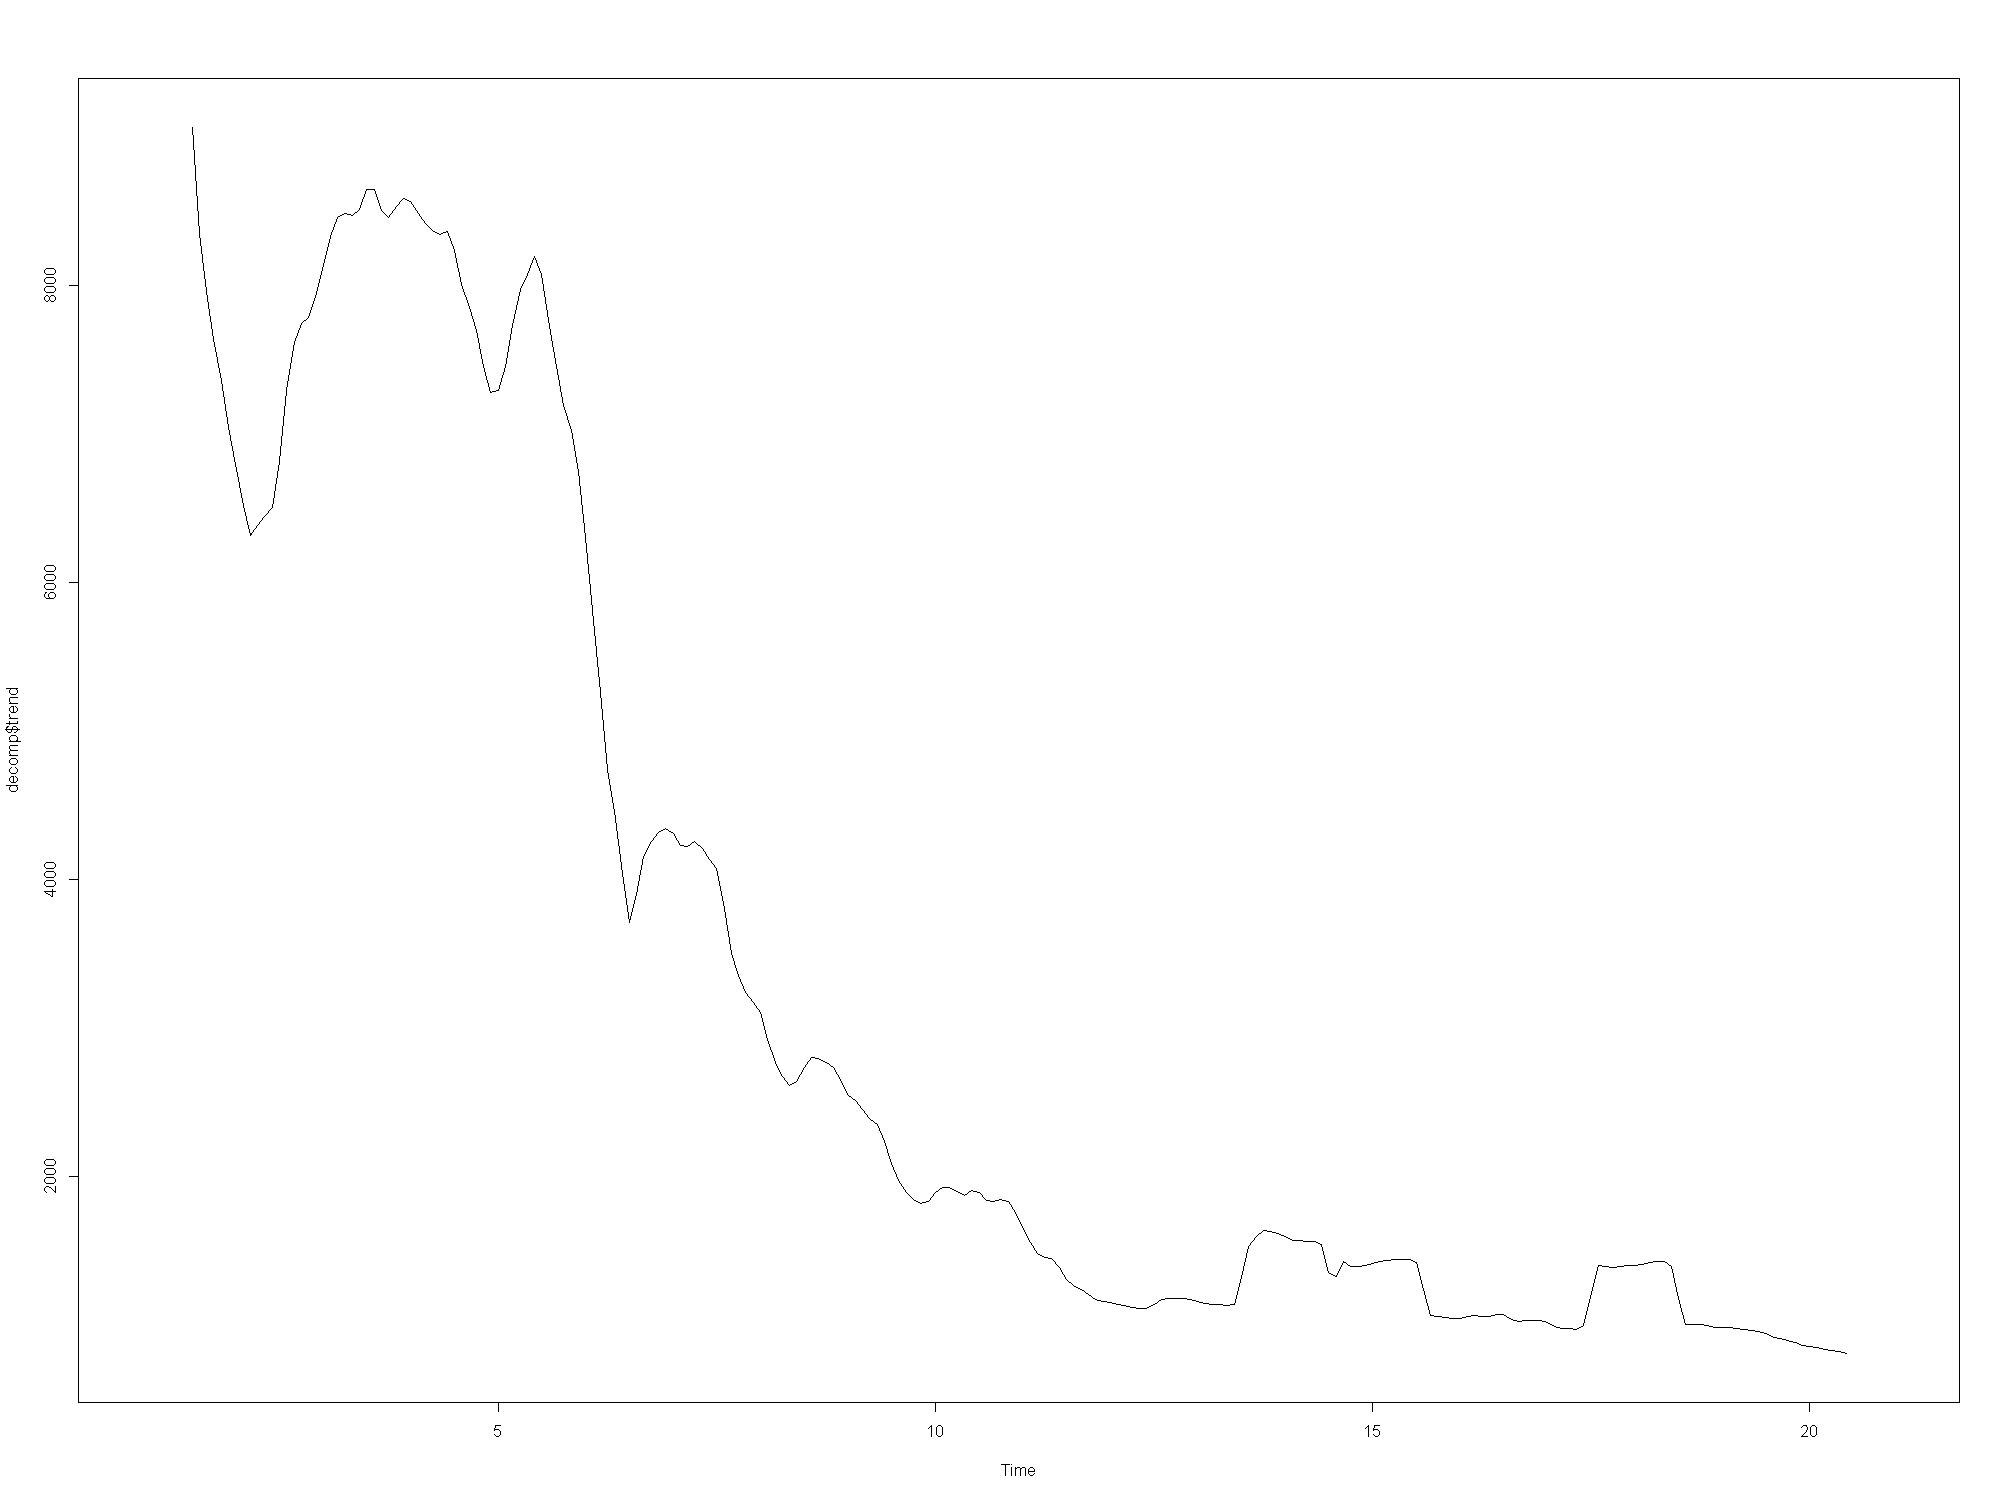

In [34]:
decomp <- decompose(allsect.bymonth)
plot(decomp)
plot(decomp$trend)

pdf('trend_decomp_us_all_time.pdf')
plot(decomp)
dev.off()

### Contribution by State Overtime <a class="anchor" id="mp3"></a>

In [35]:
all_sectors = df[df$sector=='all sectors', ]
all_sectors.byyear <- aggregate(all_sectors$petroleum, list(all_sectors$year, all_sectors$state), sum)
colnames(all_sectors.byyear) <- c('year', 'state', 'petroleum')
states <- as.factor(all_sectors.byyear$state)

all_sectors.byyear <- all_sectors.byyear[order(all_sectors.byyear$state, all_sectors.byyear$year), ]
row.names(all_sectors.byyear) <- NULL

In [167]:
9708/114655*100

[1] 8.467141

In [166]:
temp

year,petroleum
<chr>,<dbl>
2001,114655
2002,78705
2003,102732
2004,100397
2005,99836
2006,44458
2007,49495
2008,31898
2009,25969


png 
  2

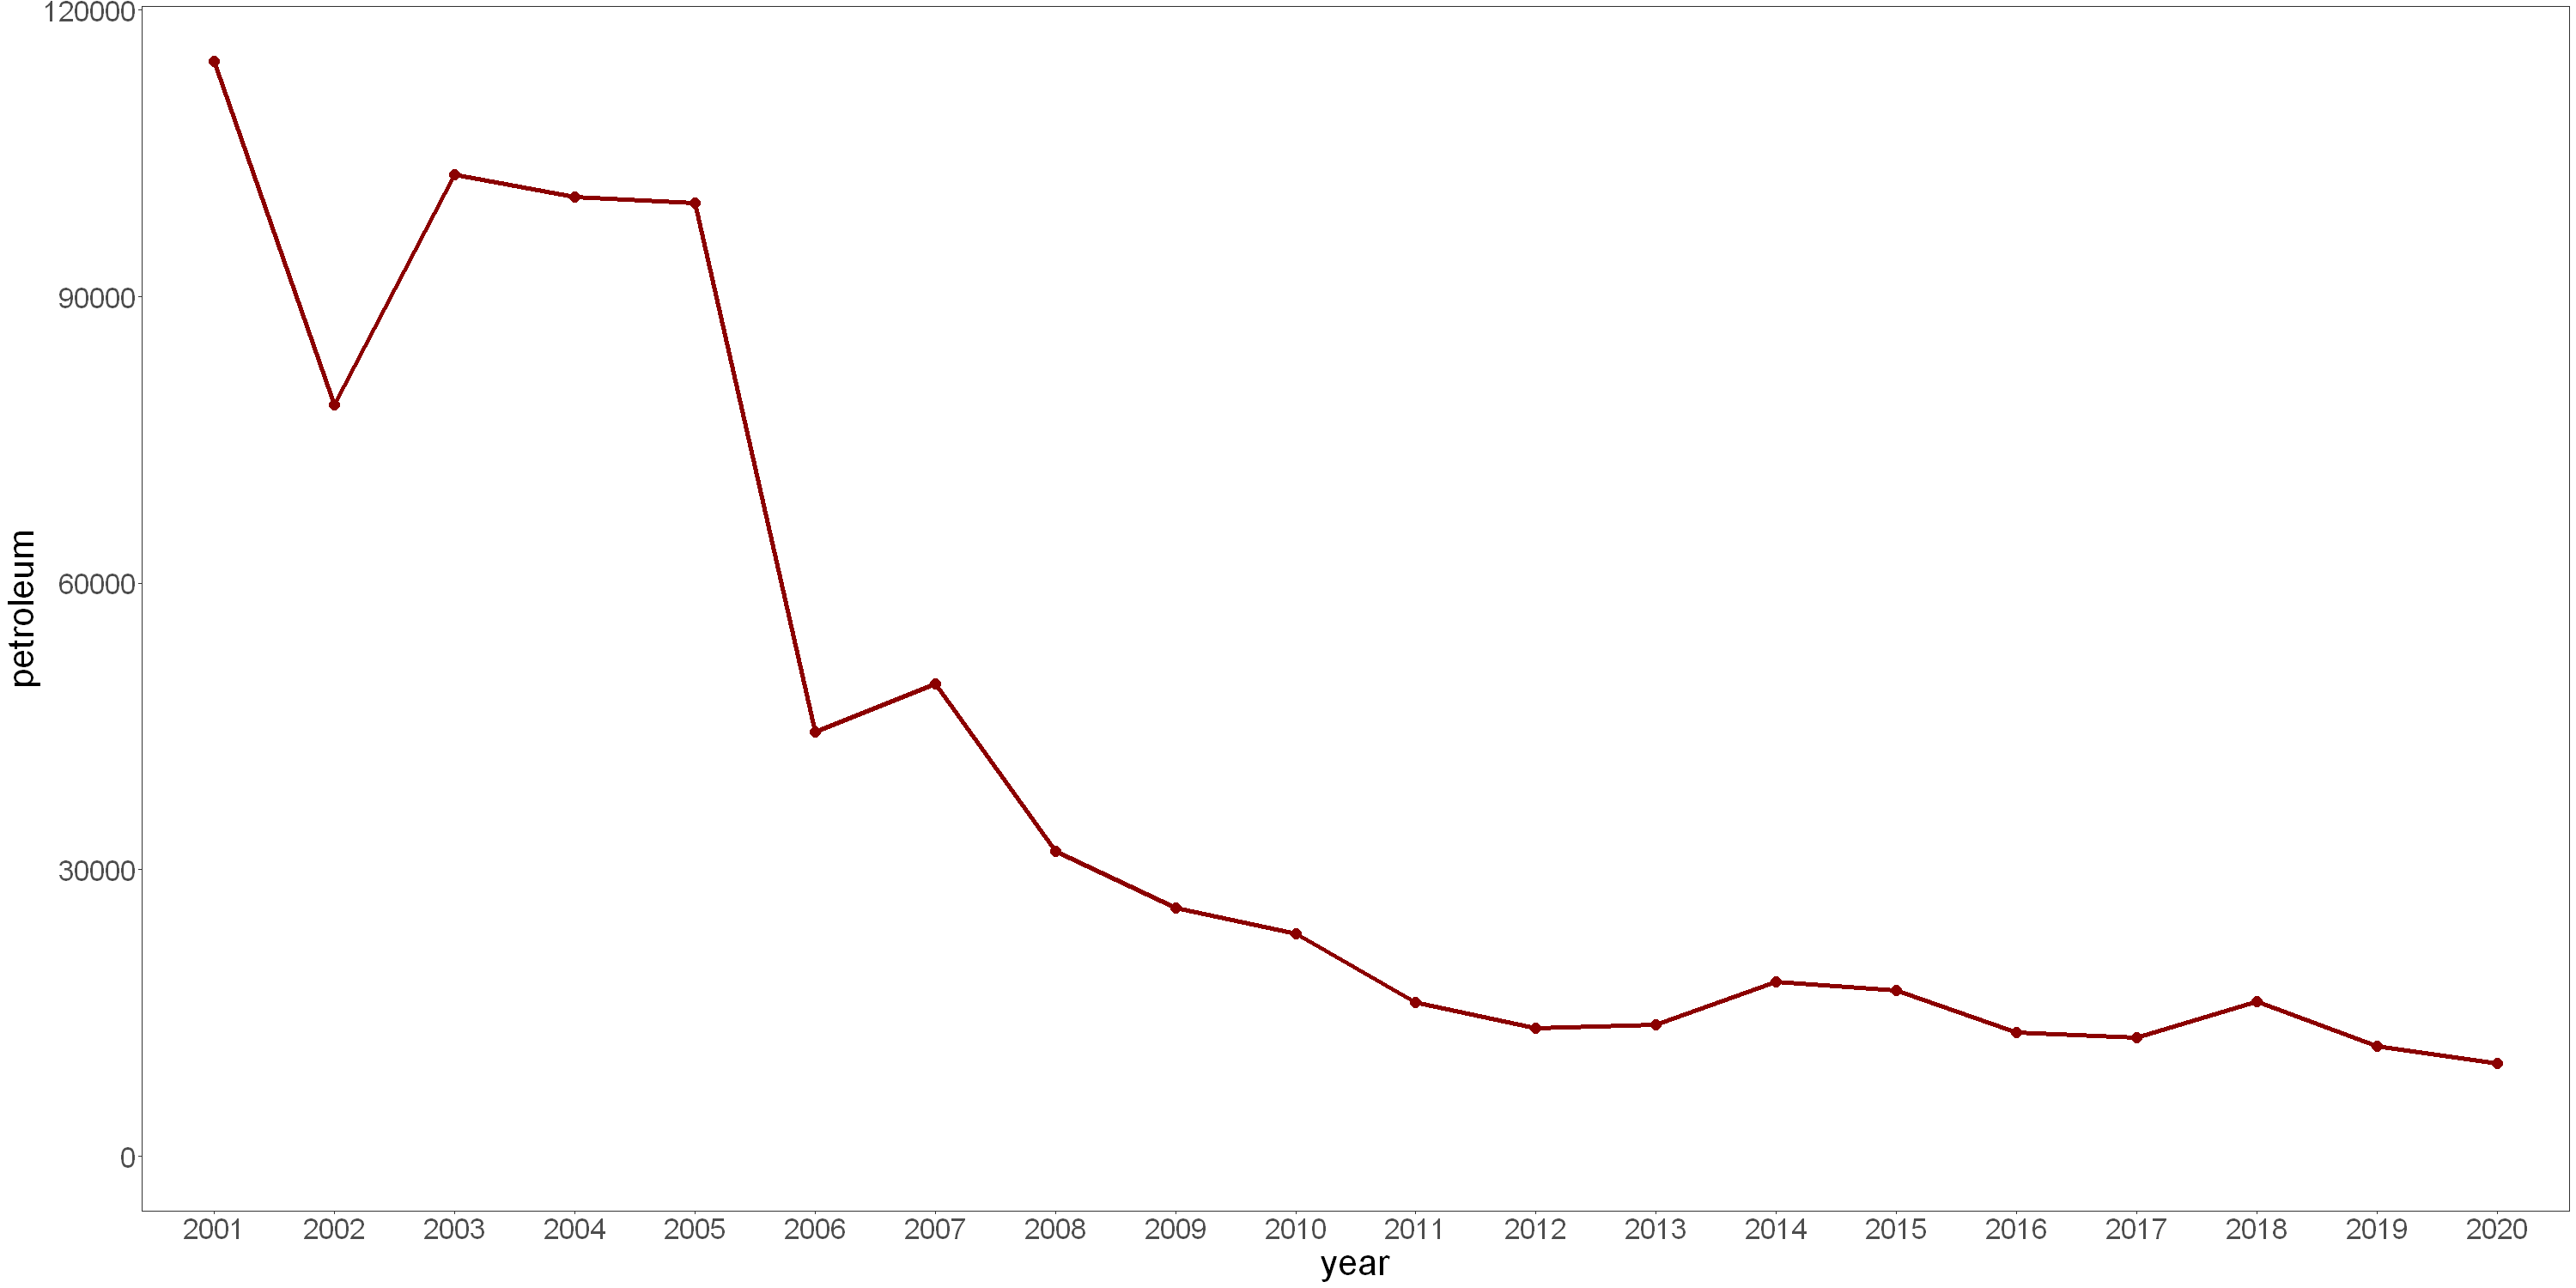

In [165]:
# Petrolum Generation by year in US by Sector
df$topn <- topn_states(1)

df_all_sect <- df[df$sector=='all sectors', ]

temp <- aggregate(list(petroleum=df_all_sect$petroleum), 
                  list(year=df_all_sect$year), 
                  sum)

fun_color_range <- colorRampPalette(c("chartreuse4", "goldenrod1", "darkred"))
colpallete <- fun_color_range(length(unique(temp$state)))

options(repr.plot.width = 30, repr.plot.height = 15, repr.plot.res = 100)
ggplot(temp, aes(y=petroleum, x=year, group=1)) +
    geom_line(size=2, color='darkred') +
    geom_point(size=4, color='darkred') +
    ylim(0, max(temp$petroleum)) +
    theme_bw() +
    theme(text = element_text(size=30))+
    theme(plot.title = element_text(size=20, face="bold"),
          plot.background = element_blank(),
          panel.grid.minor = element_blank(),
          panel.grid.major = element_blank()) #+)) + 

pdf('pet_over_time_US_ggplot.pdf', height=10, width=20)
ggplot(temp, aes(y=petroleum, x=year, group=1)) +
    geom_line(size=2, color='darkred') +
    geom_point(size=4, color='darkred') +
    ylim(0, max(temp$petroleum)) +
    theme_bw() +
    theme(text = element_text(size=30)) + 
    theme(plot.title = element_text(size=20, face="bold"),
          plot.background = element_blank(),
          panel.grid.minor = element_blank(),
          panel.grid.major = element_blank()) #+
dev.off()

png 
  2

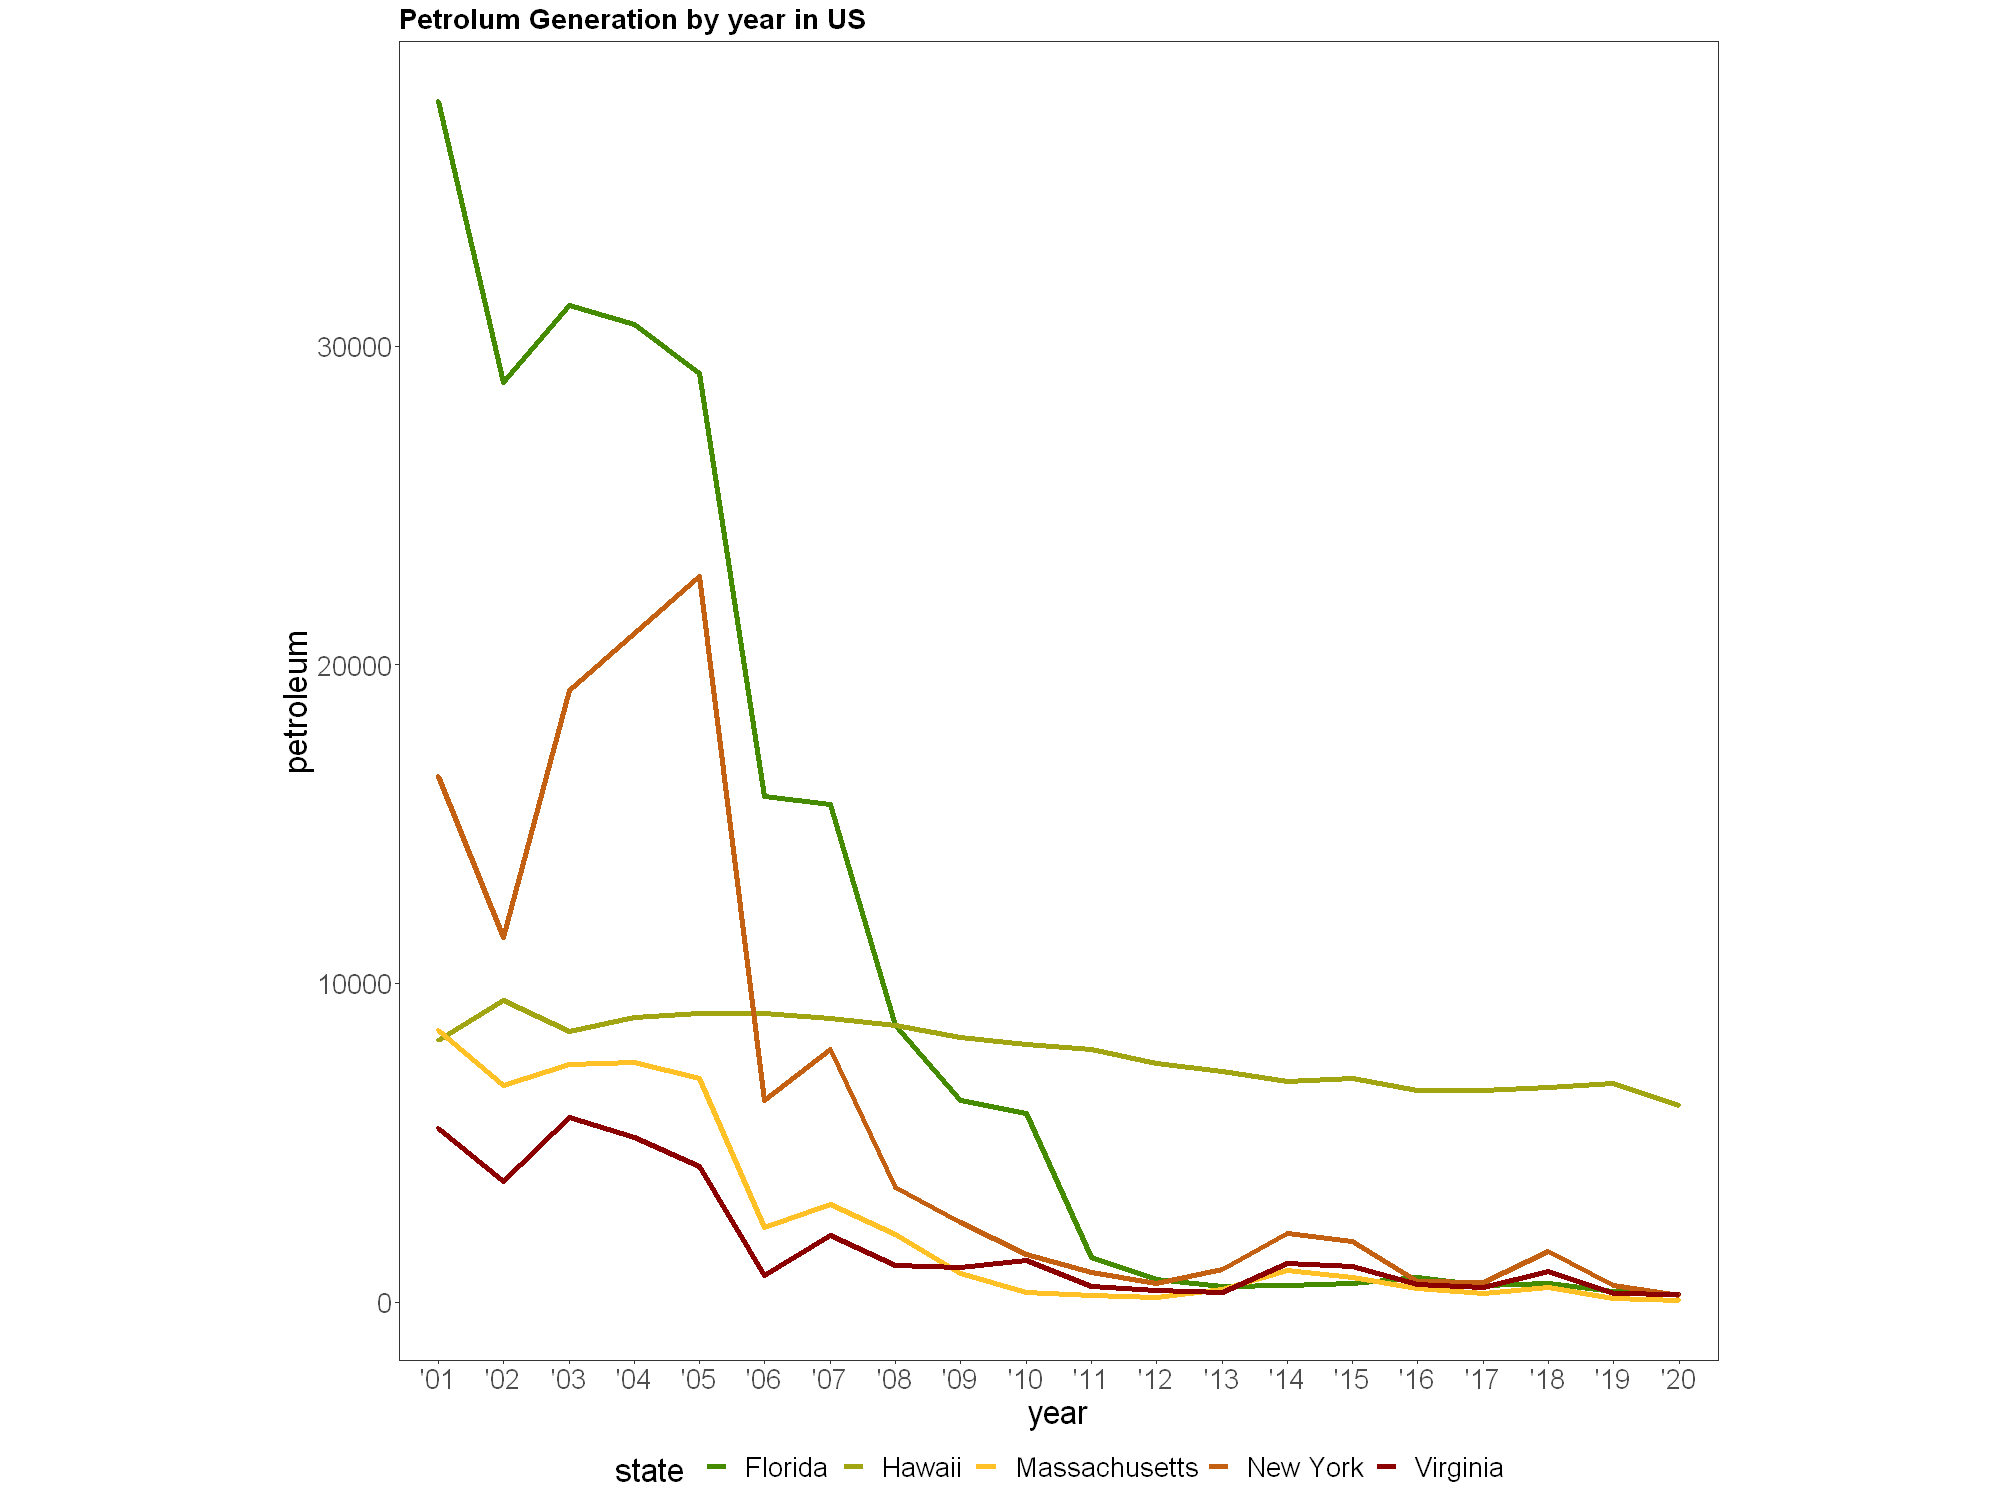

In [149]:
# Petrolum Generation by year in US by Sector
df$topn <- topn_states(5)

df_all_sect <- df[df$sector=='all sectors', ]

temp <- aggregate(list(petroleum=df_all_sect$petroleum), 
                  list(year=df_all_sect$year_str, 
                       state=df_all_sect$topn), 
                  sum)

temp <- temp[temp$state != 'Other', ]
temp$state_col <- get_col_pallette(temp$state, colorRampPalette(c("goldenrod1", "darkred")))

fun_color_range <- colorRampPalette(c("chartreuse4", "goldenrod1", "darkred"))
colpallete <- fun_color_range(length(unique(temp$state)))

options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(temp) +
    aes(x=year, y=petroleum, group=state, color=state) + 
    geom_point(size=1) +
    geom_line(aes(x=year, y=petroleum, group=state, color=state), size=2) +
    scale_color_manual(values=colpallete) + 
    labs(title='Petrolum Generation by year in US', 
         xlab='Year', 
         ylab='Petroleum (thousand megawatthours)') +
    theme_bw() +
    theme(aspect.ratio = 1, text = element_text(size=24)) + 
    theme(legend.position="bottom", aspect.ratio = 1, text = element_text(size=24)) +
    theme(plot.title = element_text(size=20, face="bold"),
          plot.background = element_blank(),
          panel.grid.minor = element_blank(),
          panel.grid.major = element_blank()) #+

pdf('pet_over_time_by_state_topn_ggplot.pdf', height=10, width=15)
ggplot(temp) +
    aes(x=year, y=petroleum, group=state, color=state) + 
    geom_point(size=1) +
    geom_line(aes(x=year, y=petroleum, group=state, color=state), size=2) +
    scale_color_manual(values=colpallete) + 
    labs(title='Petrolum Generation by year in US', 
         xlab='Year', 
         ylab='Petroleum (thousand megawatthours)') +
    theme_bw() +
    theme(aspect.ratio = 1, text = element_text(size=24)) + 
    theme(legend.position="bottom", aspect.ratio = 1, text = element_text(size=24)) +
    theme(plot.title = element_text(size=20, face="bold"),
          plot.background = element_blank(),
          panel.grid.minor = element_blank(),
          panel.grid.major = element_blank()) #+
dev.off()

png 
  2

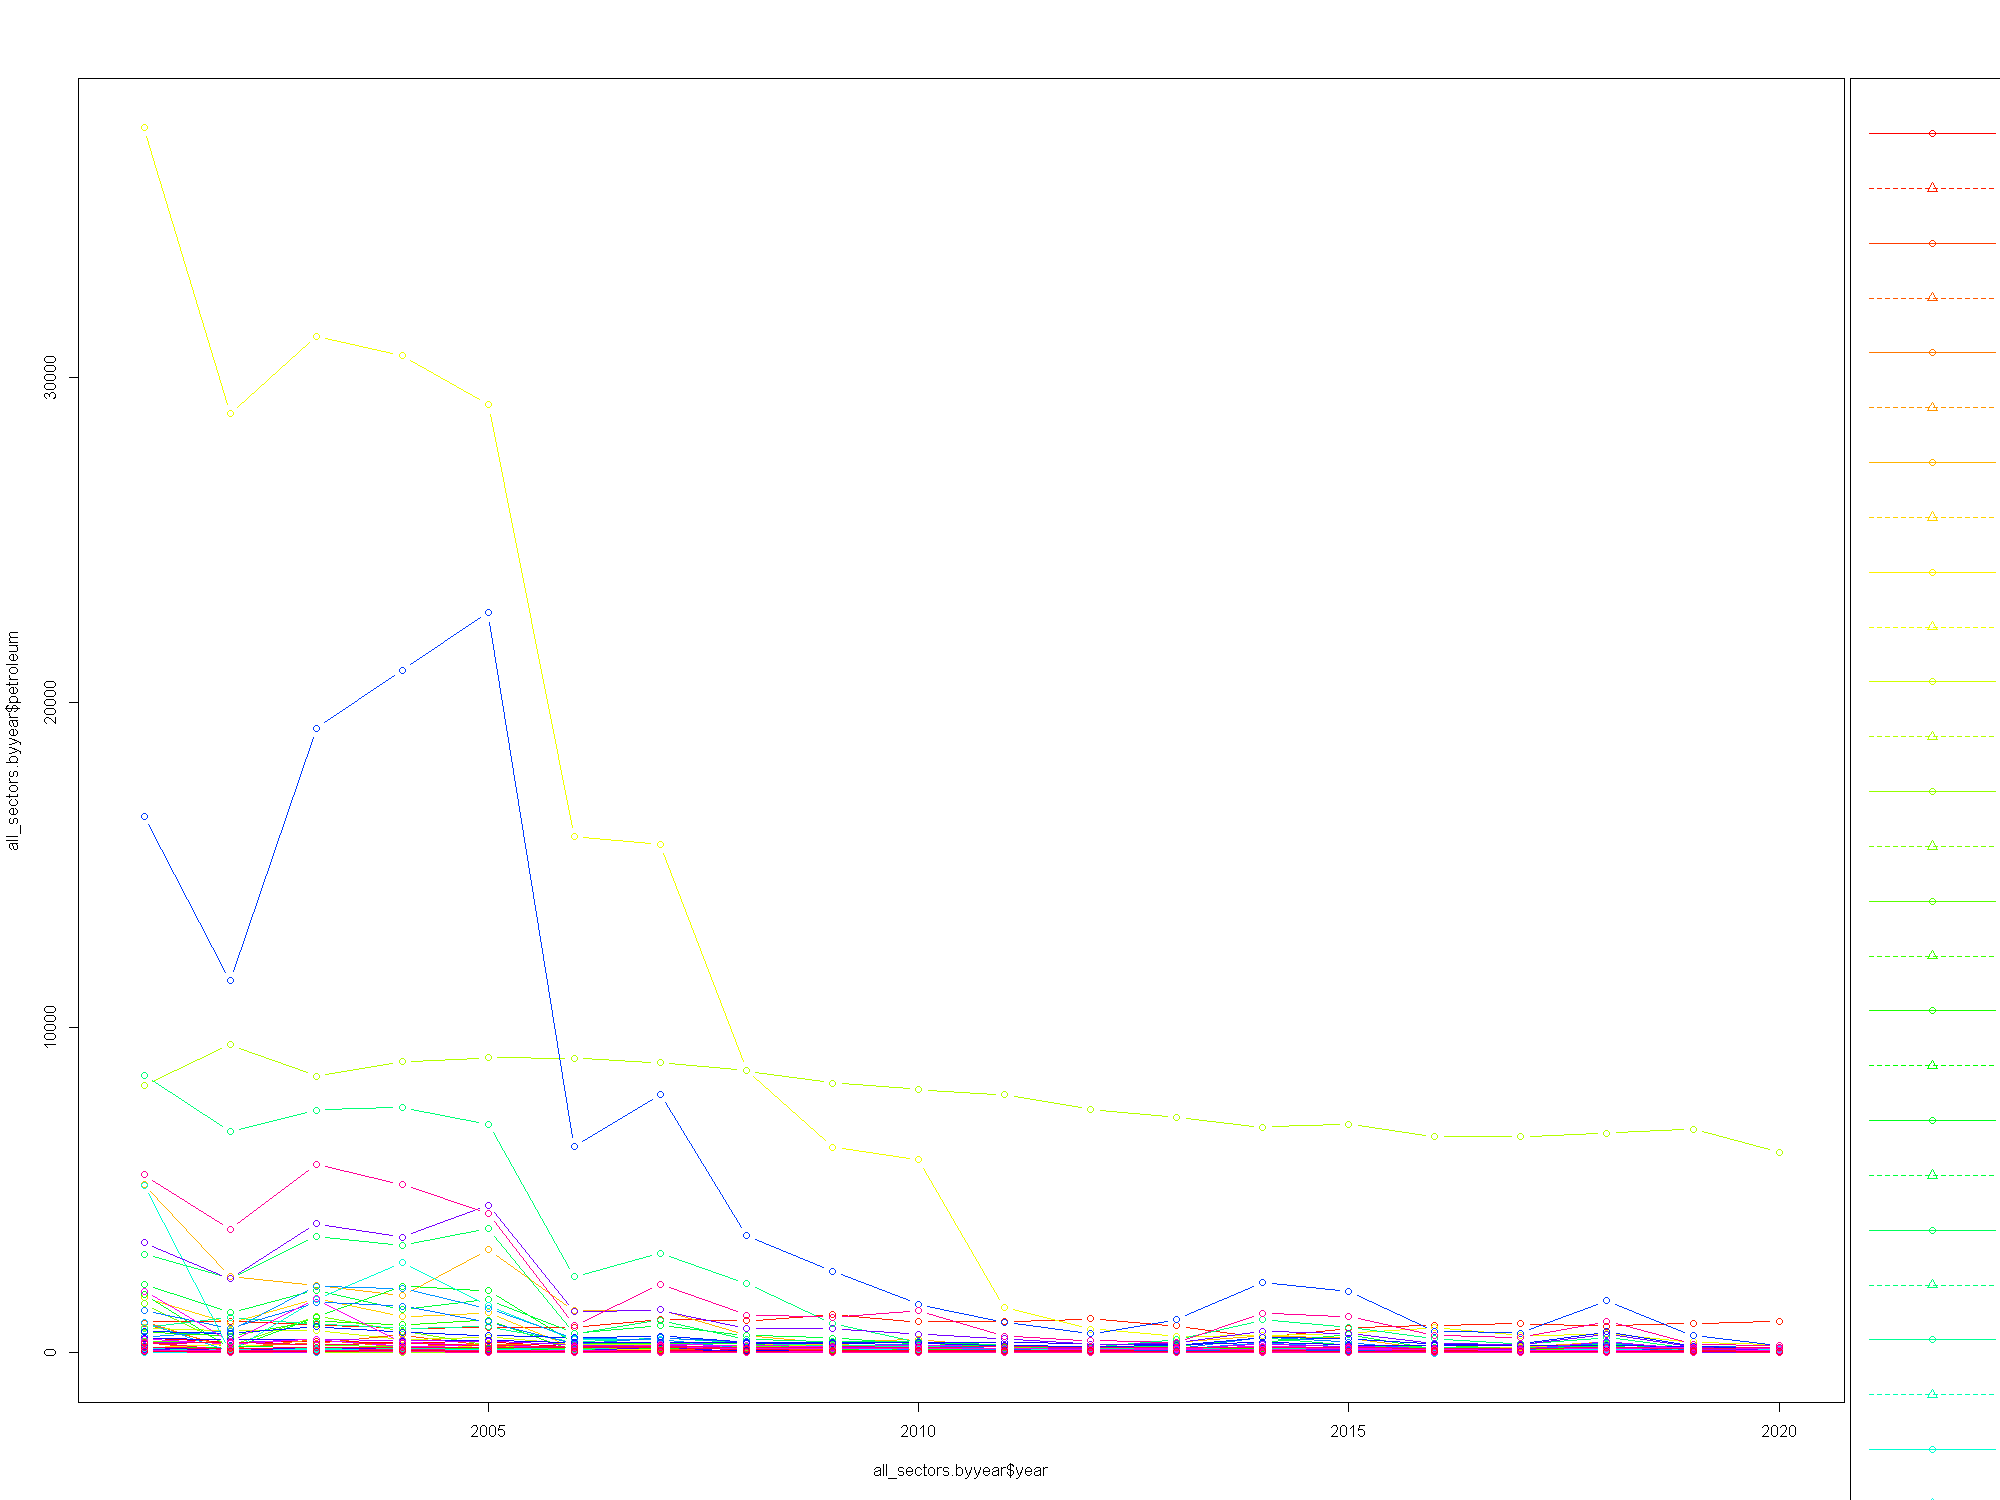

In [37]:
par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=TRUE)
plot(x=all_sectors.byyear$year, 
     y=all_sectors.byyear$petroleum,
     col=states)
# get the range for the x and y axis
xrange <- range(all_sectors.byyear$year)
yrange <- range(all_sectors.byyear$petroleum)

# add lines
uStates <- unique(states)
nStates <- length(uStates)
colors <- rainbow(nStates)

for (i in 1:nStates) {
  temp <- subset(all_sectors.byyear, state==uStates[i])
  lines(temp$year, temp$petroleum, type="b", lwd=1.5, col=colors[i])
}

# add a legend
legend('topright', legend=uStates, inset=c(-.5,0),
       col=colors, pch = c(1,2), lty = c(1,2))

pdf('pet_over_time_by_state_topn.pdf')
par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=TRUE)
plot(x=all_sectors.byyear$year, 
     y=all_sectors.byyear$petroleum,
     col=states)
# get the range for the x and y axis
xrange <- range(all_sectors.byyear$year)
yrange <- range(all_sectors.byyear$petroleum)

# add lines
uStates <- unique(states)
nStates <- length(uStates)
colors <- rainbow(nStates)

for (i in 1:nStates) {
  temp <- subset(all_sectors.byyear, state==uStates[i])
  lines(temp$year, temp$petroleum, type="b", lwd=1.5, col=colors[i])
}

# add a legend
legend('topright', legend=uStates, inset=c(-.5,0),
       col=colors, pch = c(1,2), lty = c(1,2))
dev.off()

### Contribution to All Sectors Over Time <a class="anchor" id="mp4"></a>

png 
  2

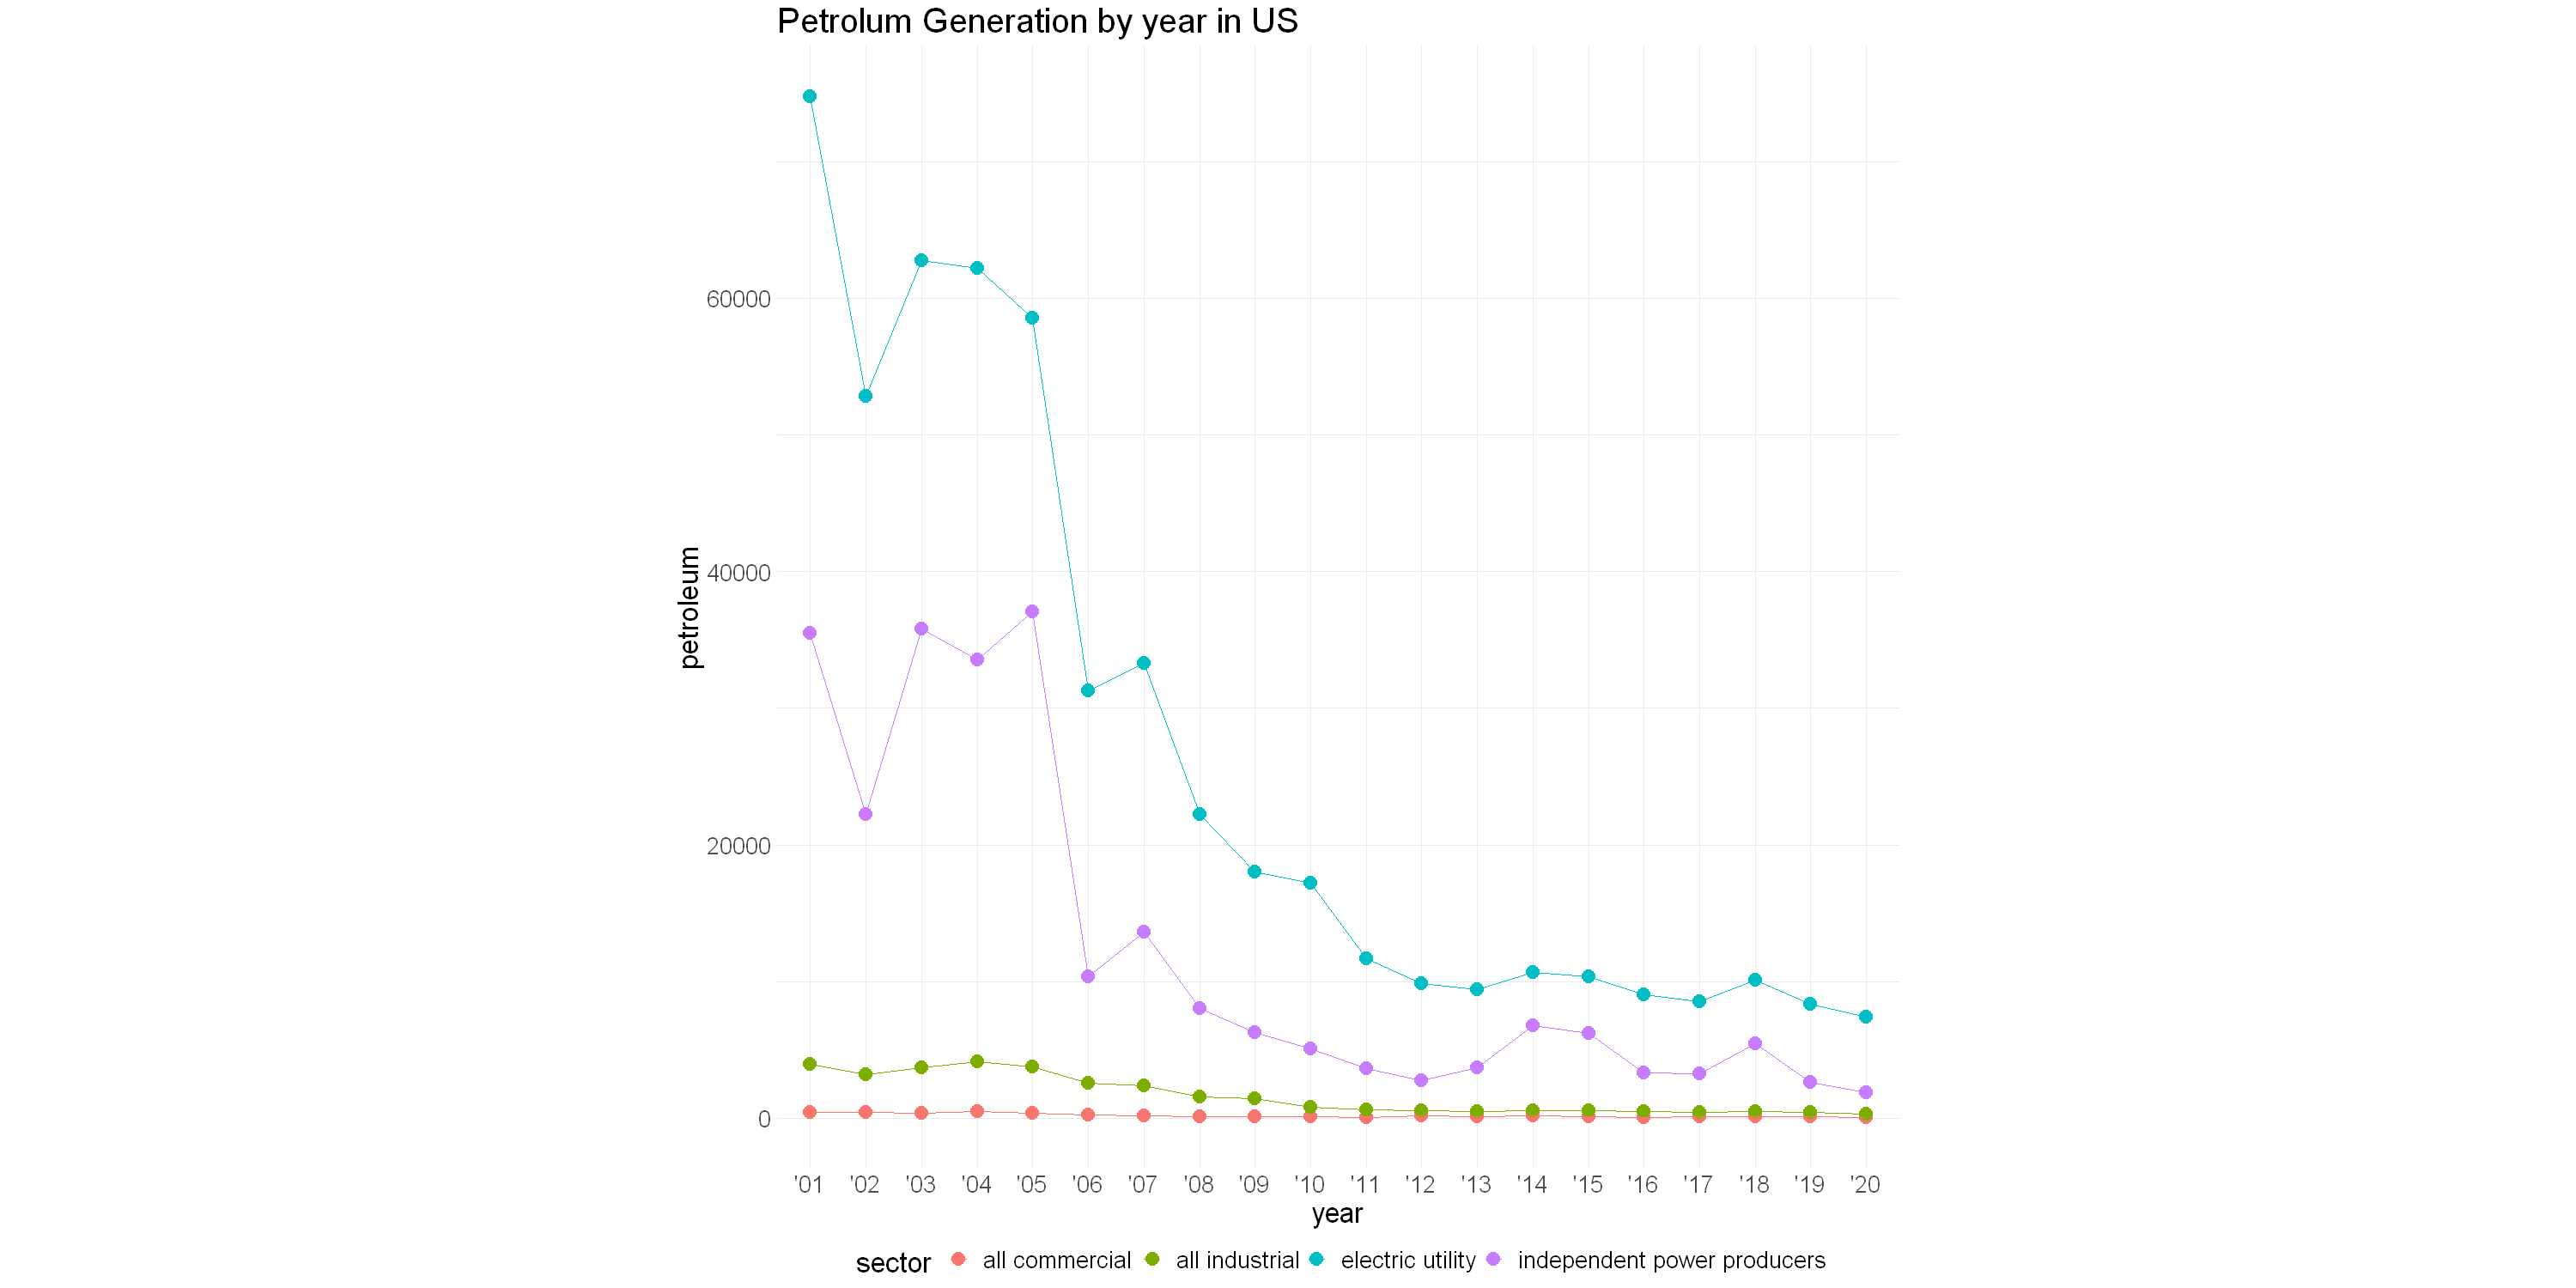

In [73]:
# Petrolum Generation by year in US by Sector
df_ind_sect <- df[df$sector!='all sectors', ]

temp <- aggregate(list(petroleum=df_ind_sect$petroleum), 
                  list(year=df_ind_sect$year_str, 
                       sector=df_ind_sect$sector), 
                  sum)


options(repr.plot.width = 30, repr.plot.height = 15, repr.plot.res = 100)
ggplot(temp) +
    aes(x=year, y=petroleum, group=sector, color=sector) + 
    geom_point(size=5) +
    geom_line(aes(x=year, y=petroleum, group=sector, color=sector)) +
    labs(title='Petrolum Generation by year in US', 
         xlab='Year', 
         ylab='Petroleum (thousand megawatthours)') +
    theme(aspect.ratio = 1, text = element_text(size=24)) + 
    theme(legend.position="bottom", aspect.ratio = 1, text = element_text(size=24))


pdf('pet_over_time_by_sect_ggplot.pdf', height=10, width=20)
ggplot(temp) +
    aes(x=year, y=petroleum, group=sector, color=sector) + 
    geom_point(size=5) +
    geom_line(aes(x=year, y=petroleum, group=sector, color=sector)) +
    labs(title='Petrolum Generation by year in US', 
         xlab='Year', 
         ylab='Petroleum (thousand megawatthours)') +
    theme(aspect.ratio = 1, text = element_text(size=24)) + 
    theme(legend.position="bottom", aspect.ratio = 1, text = element_text(size=24))
dev.off()

png 
  2

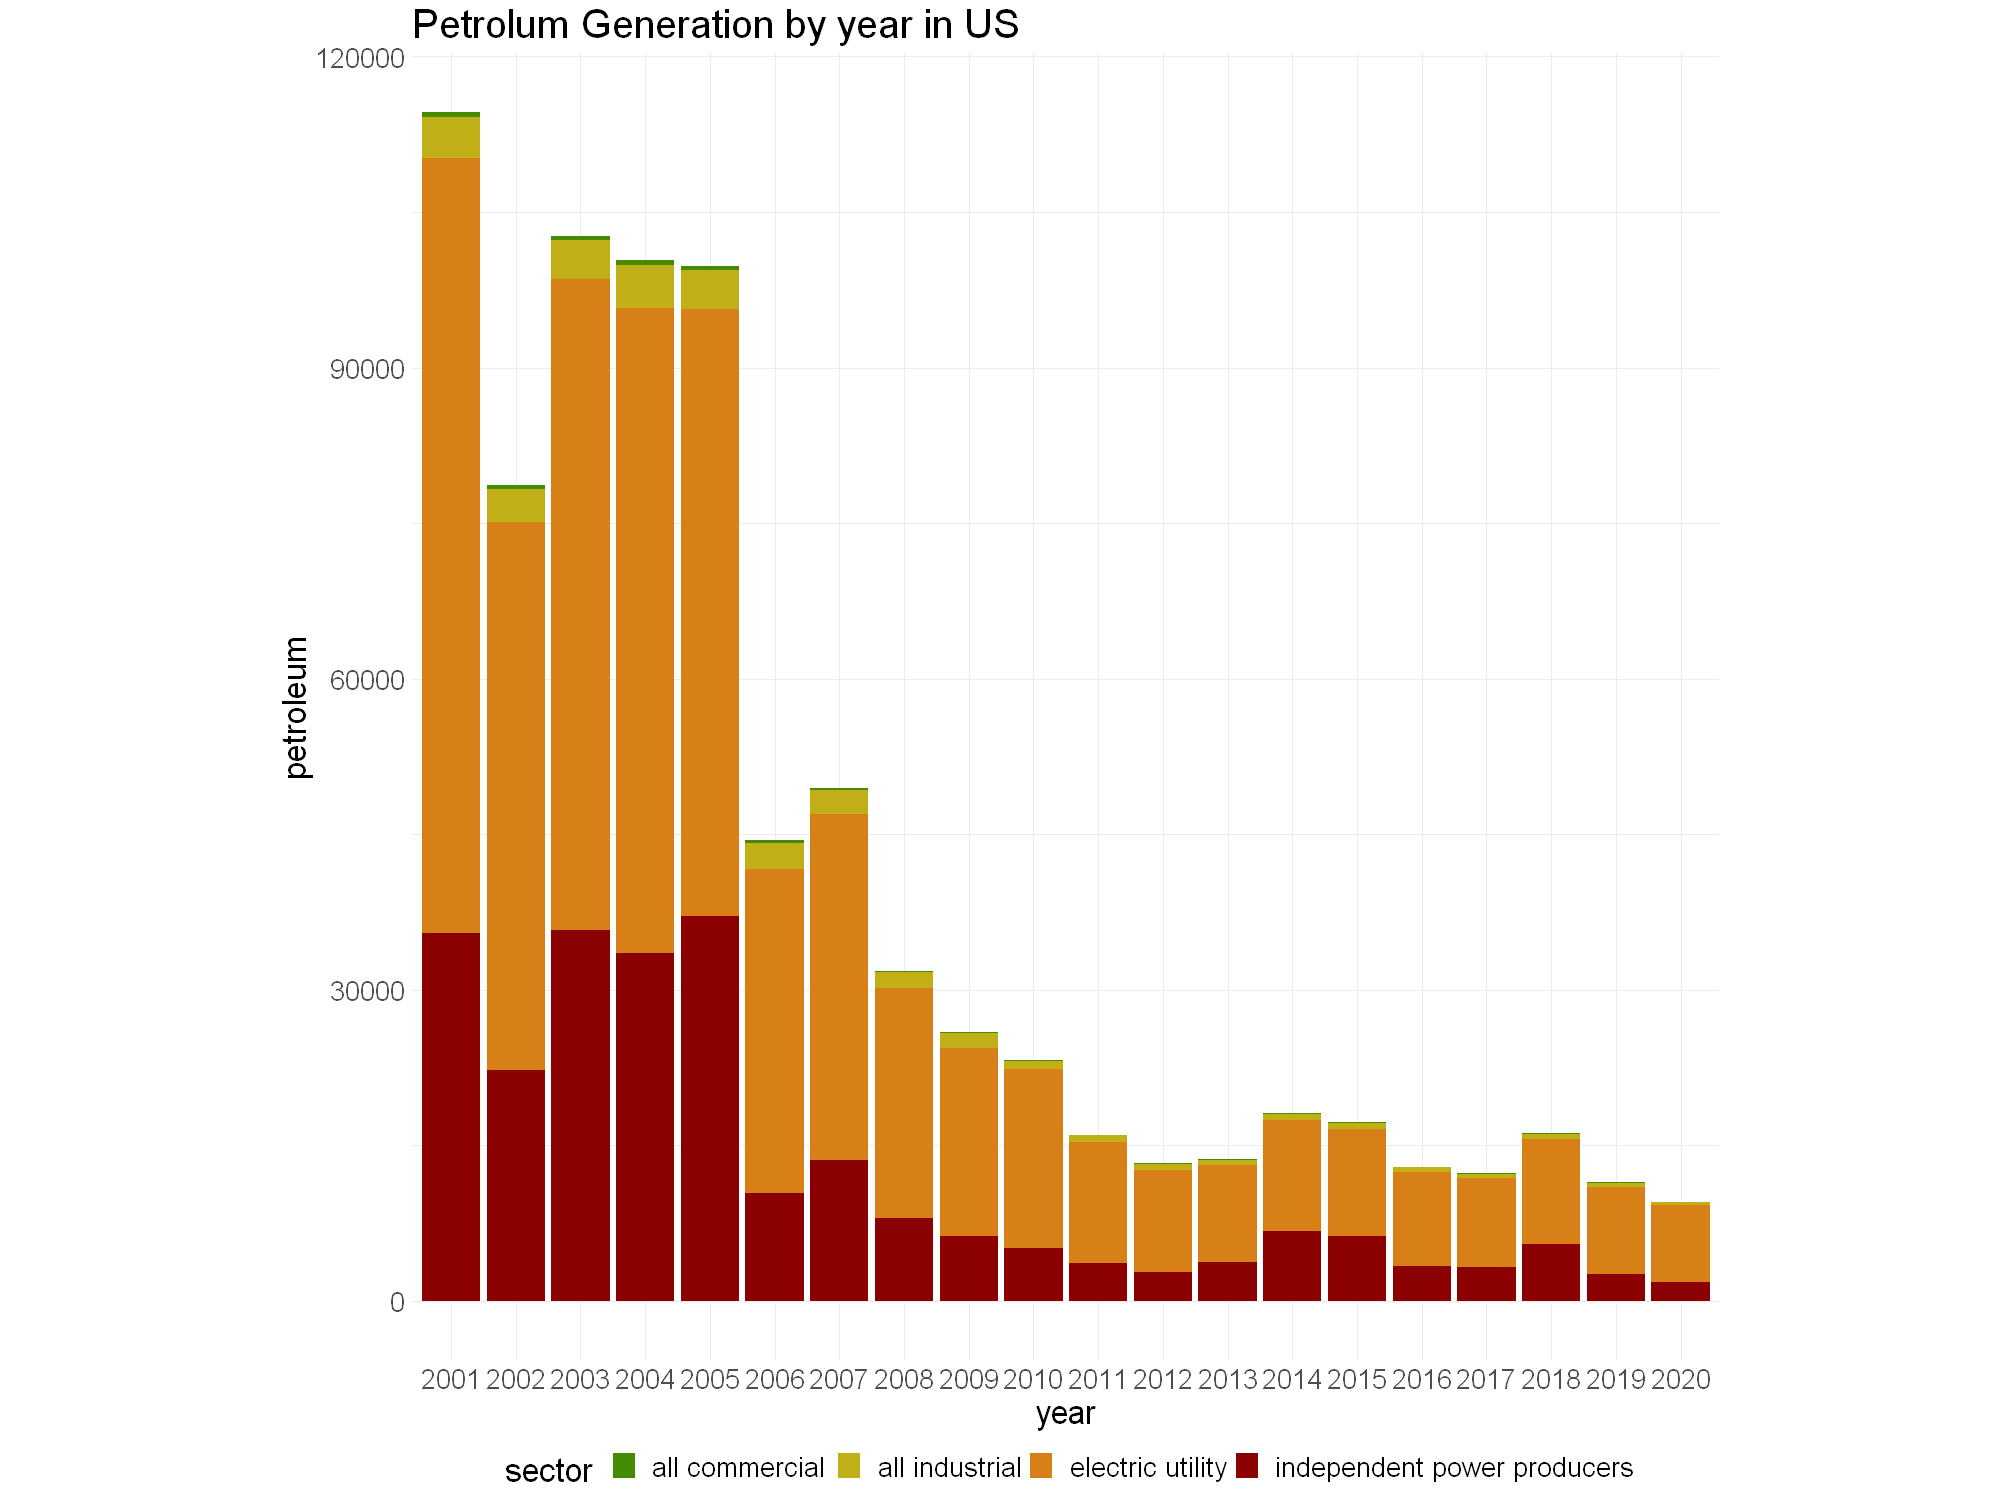

In [176]:
# Petrolum Generation by year in US by Sector
df_ind_sect <- df[df$sector!='all sectors', ]

temp <- aggregate(list(petroleum=df_ind_sect$petroleum), 
                  list(year=df_ind_sect$year, 
                       sector=df_ind_sect$sector), 
                  sum)

fun_color_range <- colorRampPalette(c("chartreuse4", "goldenrod1", "darkred"))
colpallete <- fun_color_range(length(unique(temp$sector)))

options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(temp) +
    aes(x=year, y=petroleum, fill=sector) + 
    geom_bar(stat='identity') +
    scale_fill_manual(values=colpallete) + 
    labs(title='Petrolum Generation by year in US', 
         xlab='Year',
         ylab='Petroleum (thousand megawatthours)') +
    theme(aspect.ratio = 1, text = element_text(size=24)) + 
    theme(legend.position="bottom", aspect.ratio = 1, text = element_text(size=24))

pdf('bar_pet_US_by_sect_ggplot.pdf', height=10, width=20)
ggplot(temp) +
    aes(x=year, y=petroleum, fill=sector) + 
    geom_bar(stat='identity') +
    scale_fill_manual(values=colpallete) + 
    labs(title='Petrolum Generation by year in US', 
         xlab='Year',
         ylab='Petroleum (thousand megawatthours)') +
    theme_bw() +
    theme(text = element_text(size=24)) + 
    theme(legend.position="bottom", text = element_text(size=24)) +
    theme(plot.title = element_text(size=20, face="bold"),
          plot.background = element_blank(),
          panel.grid.minor = element_blank(),
          panel.grid.major = element_blank()) #+
dev.off()

png 
  2

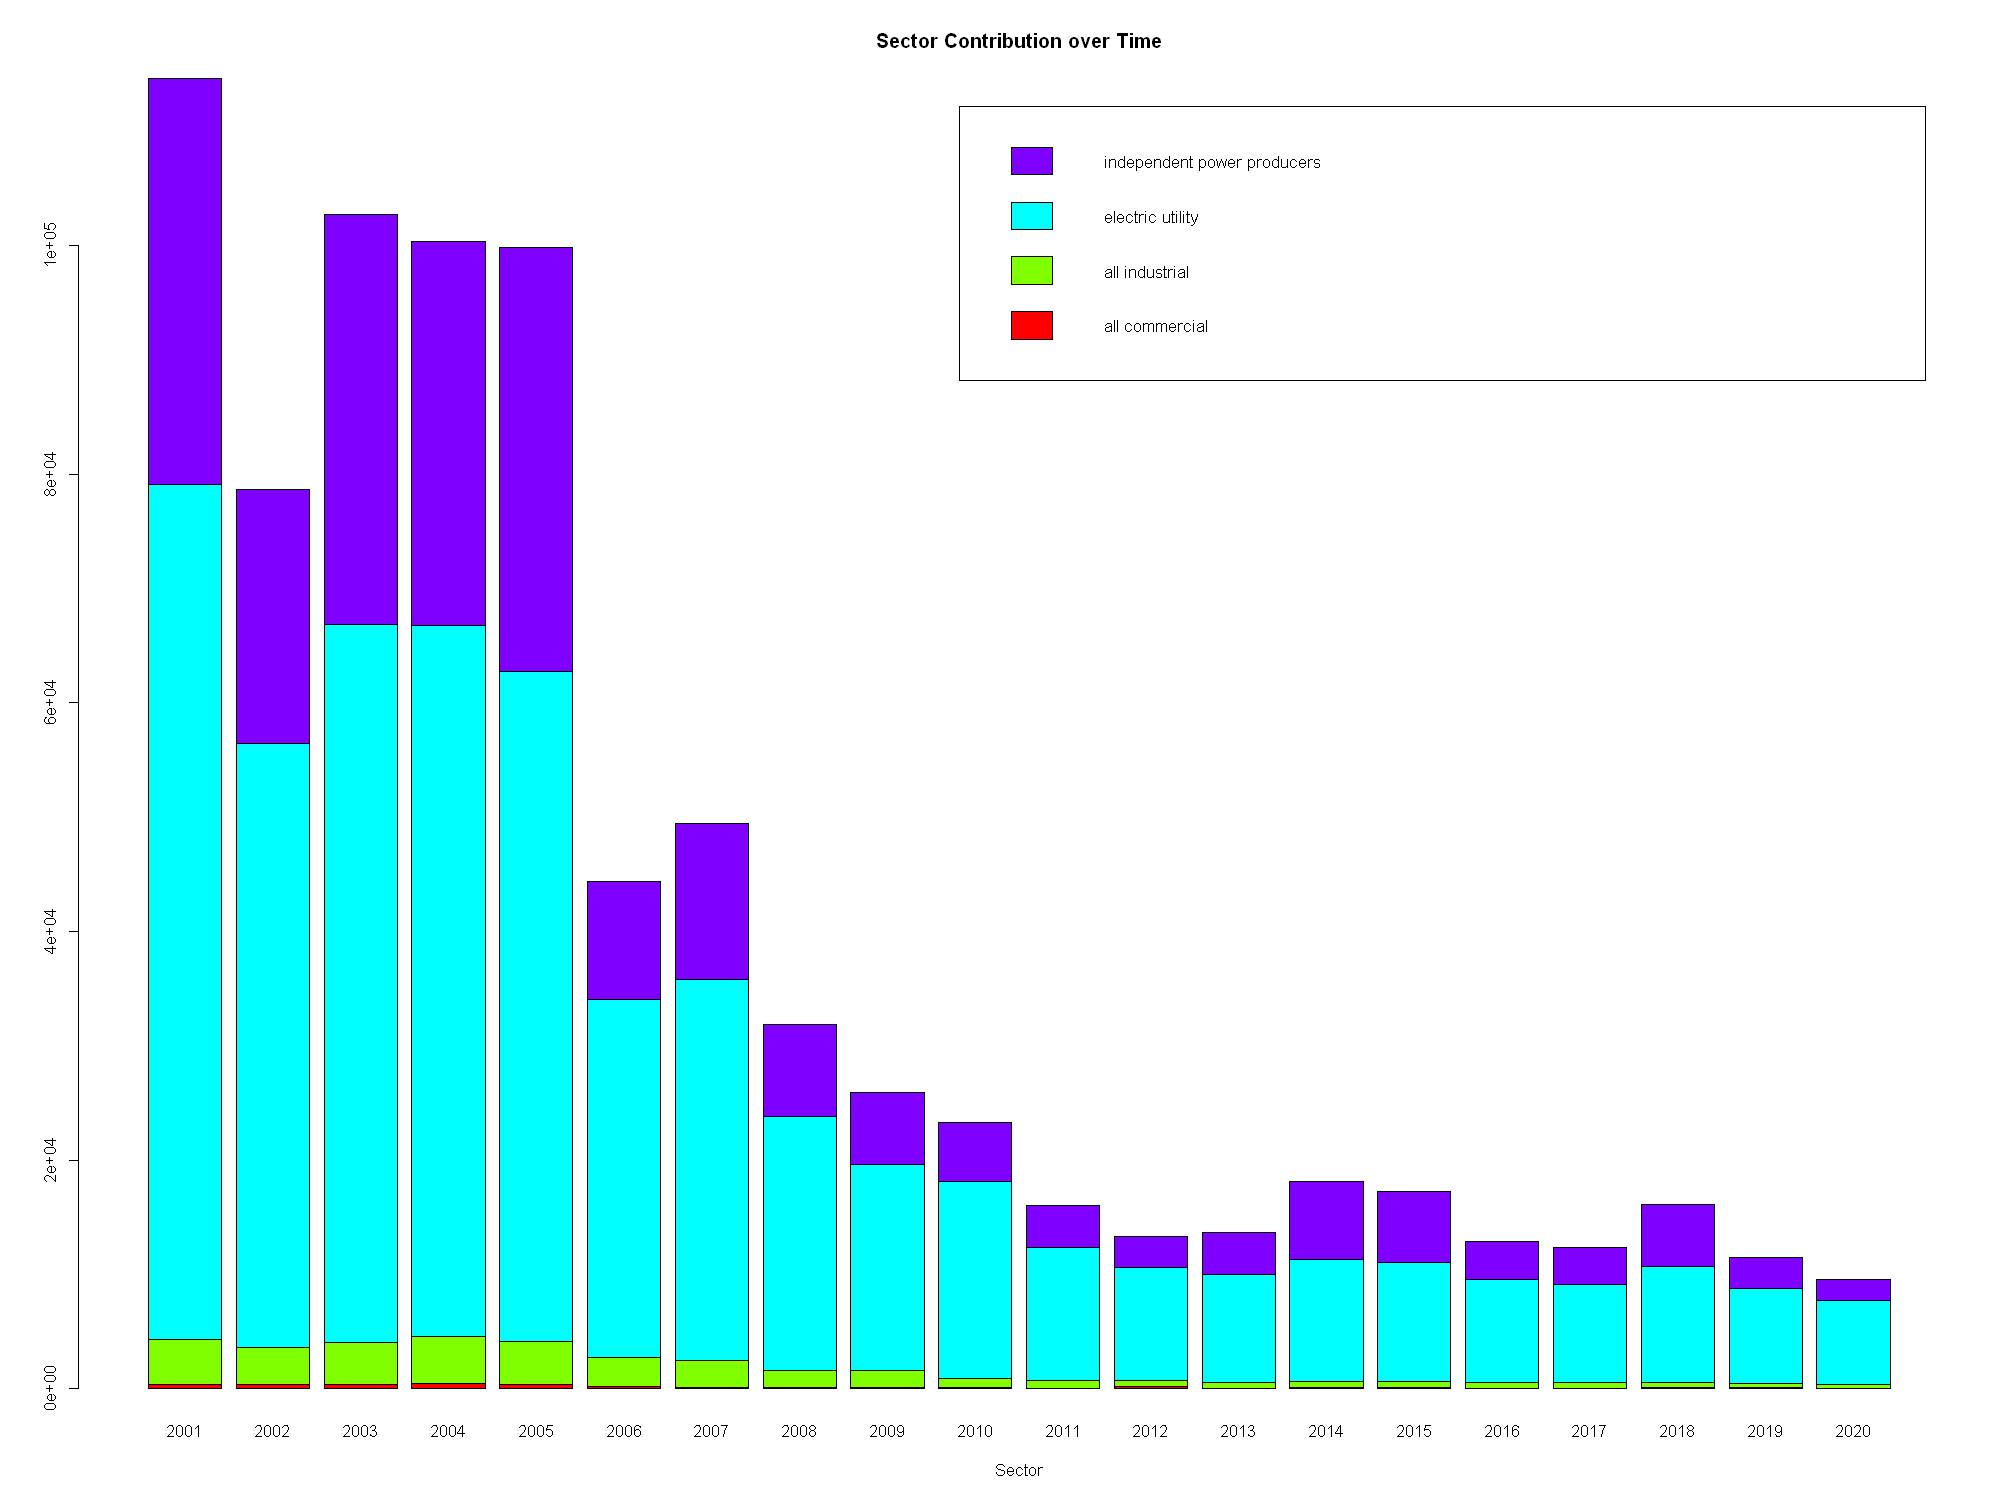

In [40]:
ind_sectors.byyear <- tapply(df[df$sector != 'all sectors', ]$petroleum, list(df[df$sector != 'all sectors', ]$sector, df[df$sector != 'all sectors', ]$year), sum)

nSectors <- nrow(ind_sectors.byyear)
colors <- rainbow(nSectors)
barplot(ind_sectors.byyear, main="Sector Contribution over Time",
  xlab="Sector", col=colors,
  legend = rownames(ind_sectors.byyear))

pdf('bar_pet_US_by_sect.pdf')
barplot(ind_sectors.byyear, main="Sector Contribution over Time",
  xlab="Sector", col=colors,
  legend = rownames(ind_sectors.byyear))
dev.off()

## Petroleum by State and Sector

png 
  2

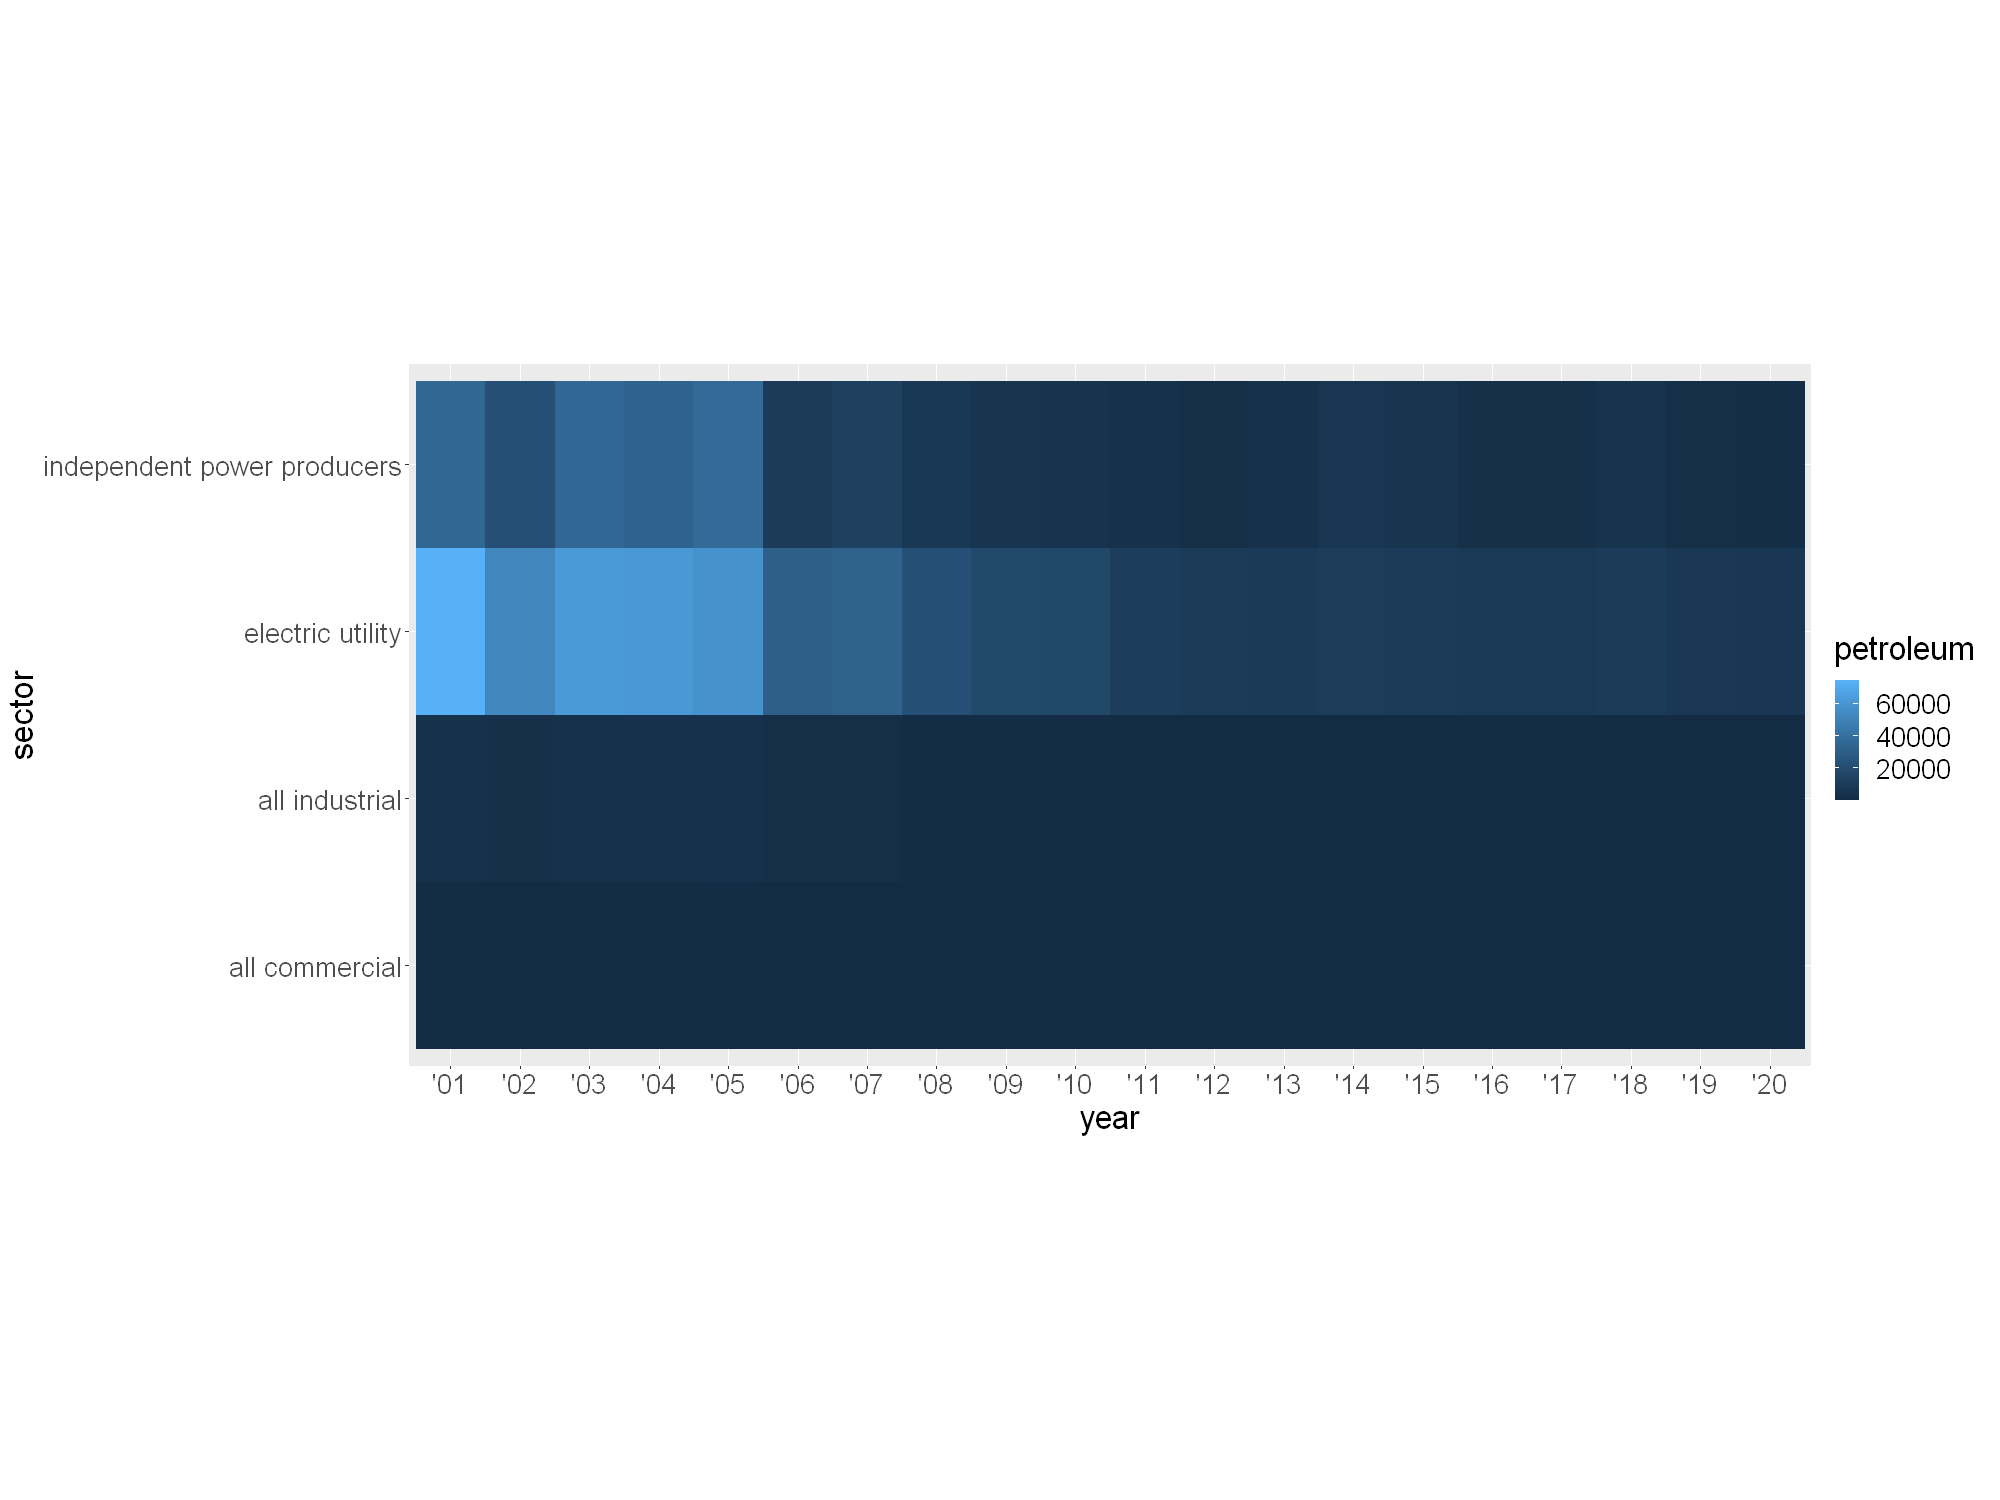

In [41]:
# Petrolum Generation by year in US by Sector
df_ind_sect <- df[df$sector!='all sectors', ]

temp <- aggregate(list(petroleum=df_ind_sect$petroleum), 
                  list(year=df_ind_sect$year_str, 
                       sector=df_ind_sect$sector), 
                  sum)


options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(temp) +
    aes(x=year, y=sector, fill=petroleum) + 
    geom_tile() + 
    theme(legend.position="right", aspect.ratio = .5, text = element_text(size=24))

pdf('heatmap_sect_vs_year.pdf')
ggplot(temp) +
    aes(x=year, y=sector, fill=petroleum) + 
    geom_tile() + 
    theme(legend.position="right", aspect.ratio = .5, text = element_text(size=24))
dev.off()

png 
  2

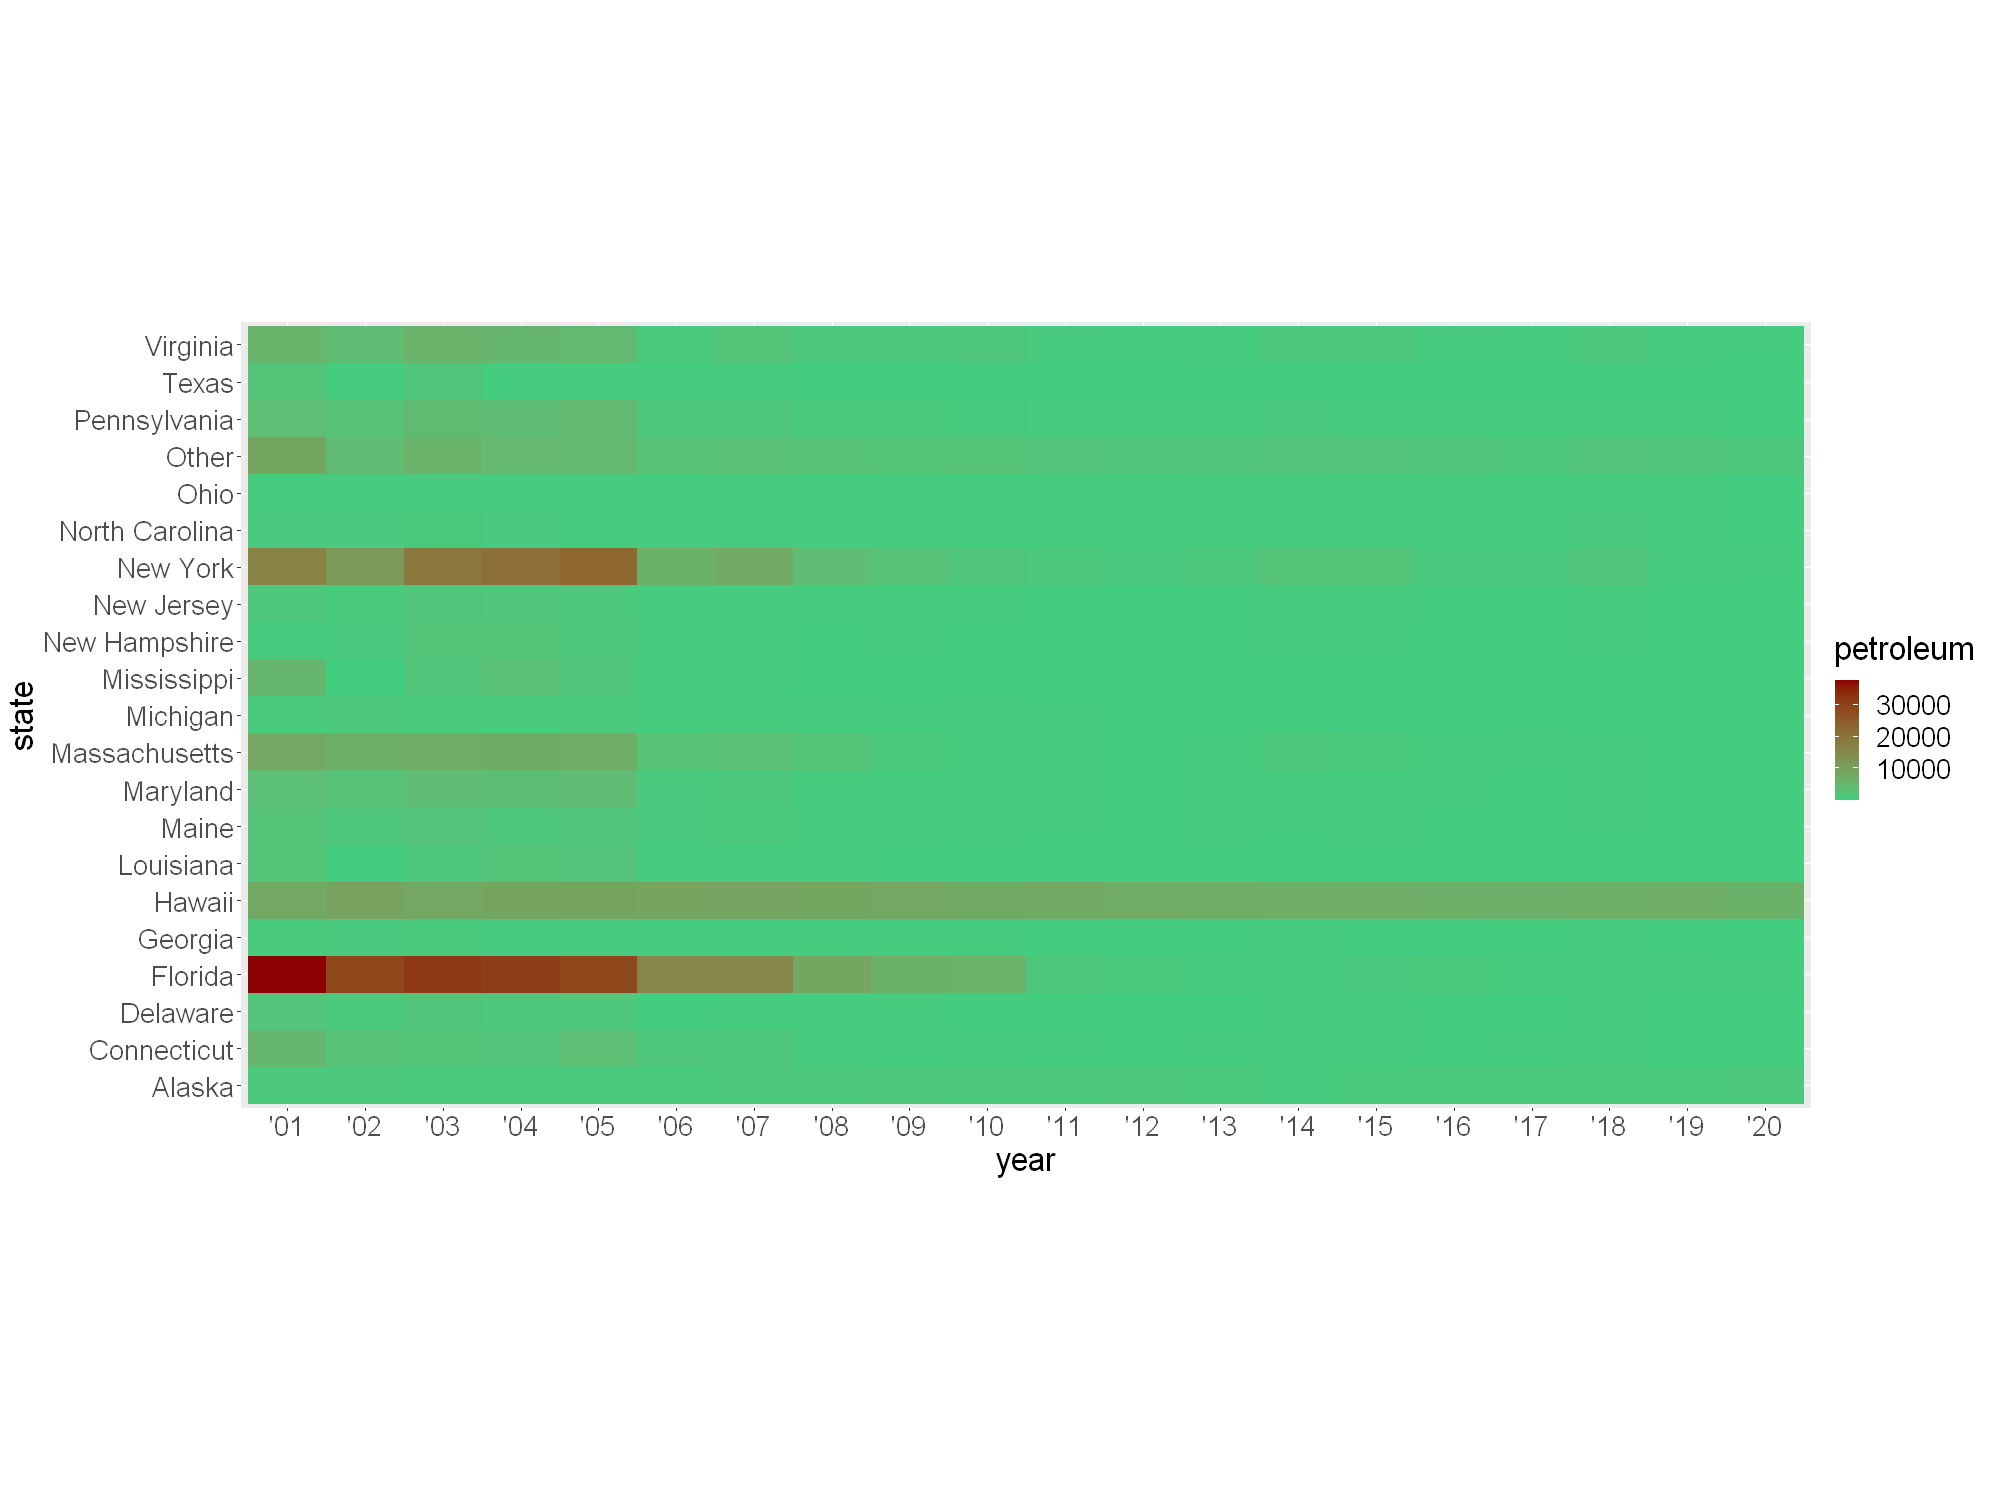

In [42]:
# Petrolum Generation by year in US by State
df$topn <- topn_states(20)
df_all_sect <- df[df$sector=='all sectors', ]

temp <- aggregate(list(petroleum=df_all_sect$petroleum), 
                  list(year=df_all_sect$year_str,
                       state=df_all_sect$topn),
                  sum)


options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(temp) +
    aes(x=year, y=state, fill=petroleum) + 
    geom_tile() +
    scale_fill_gradient(low="seagreen3", high="red4") +
    theme(legend.position="right", aspect.ratio = .5, text = element_text(size=24))


pdf('heatmap_state_vs_year.pdf')
ggplot(temp) +
    aes(x=year, y=state, fill=petroleum) + 
    geom_tile() +
    scale_fill_gradient(low="seagreen3", high="red4") +
    theme(legend.position="right", aspect.ratio = .5, text = element_text(size=24))
dev.off()

png 
  2

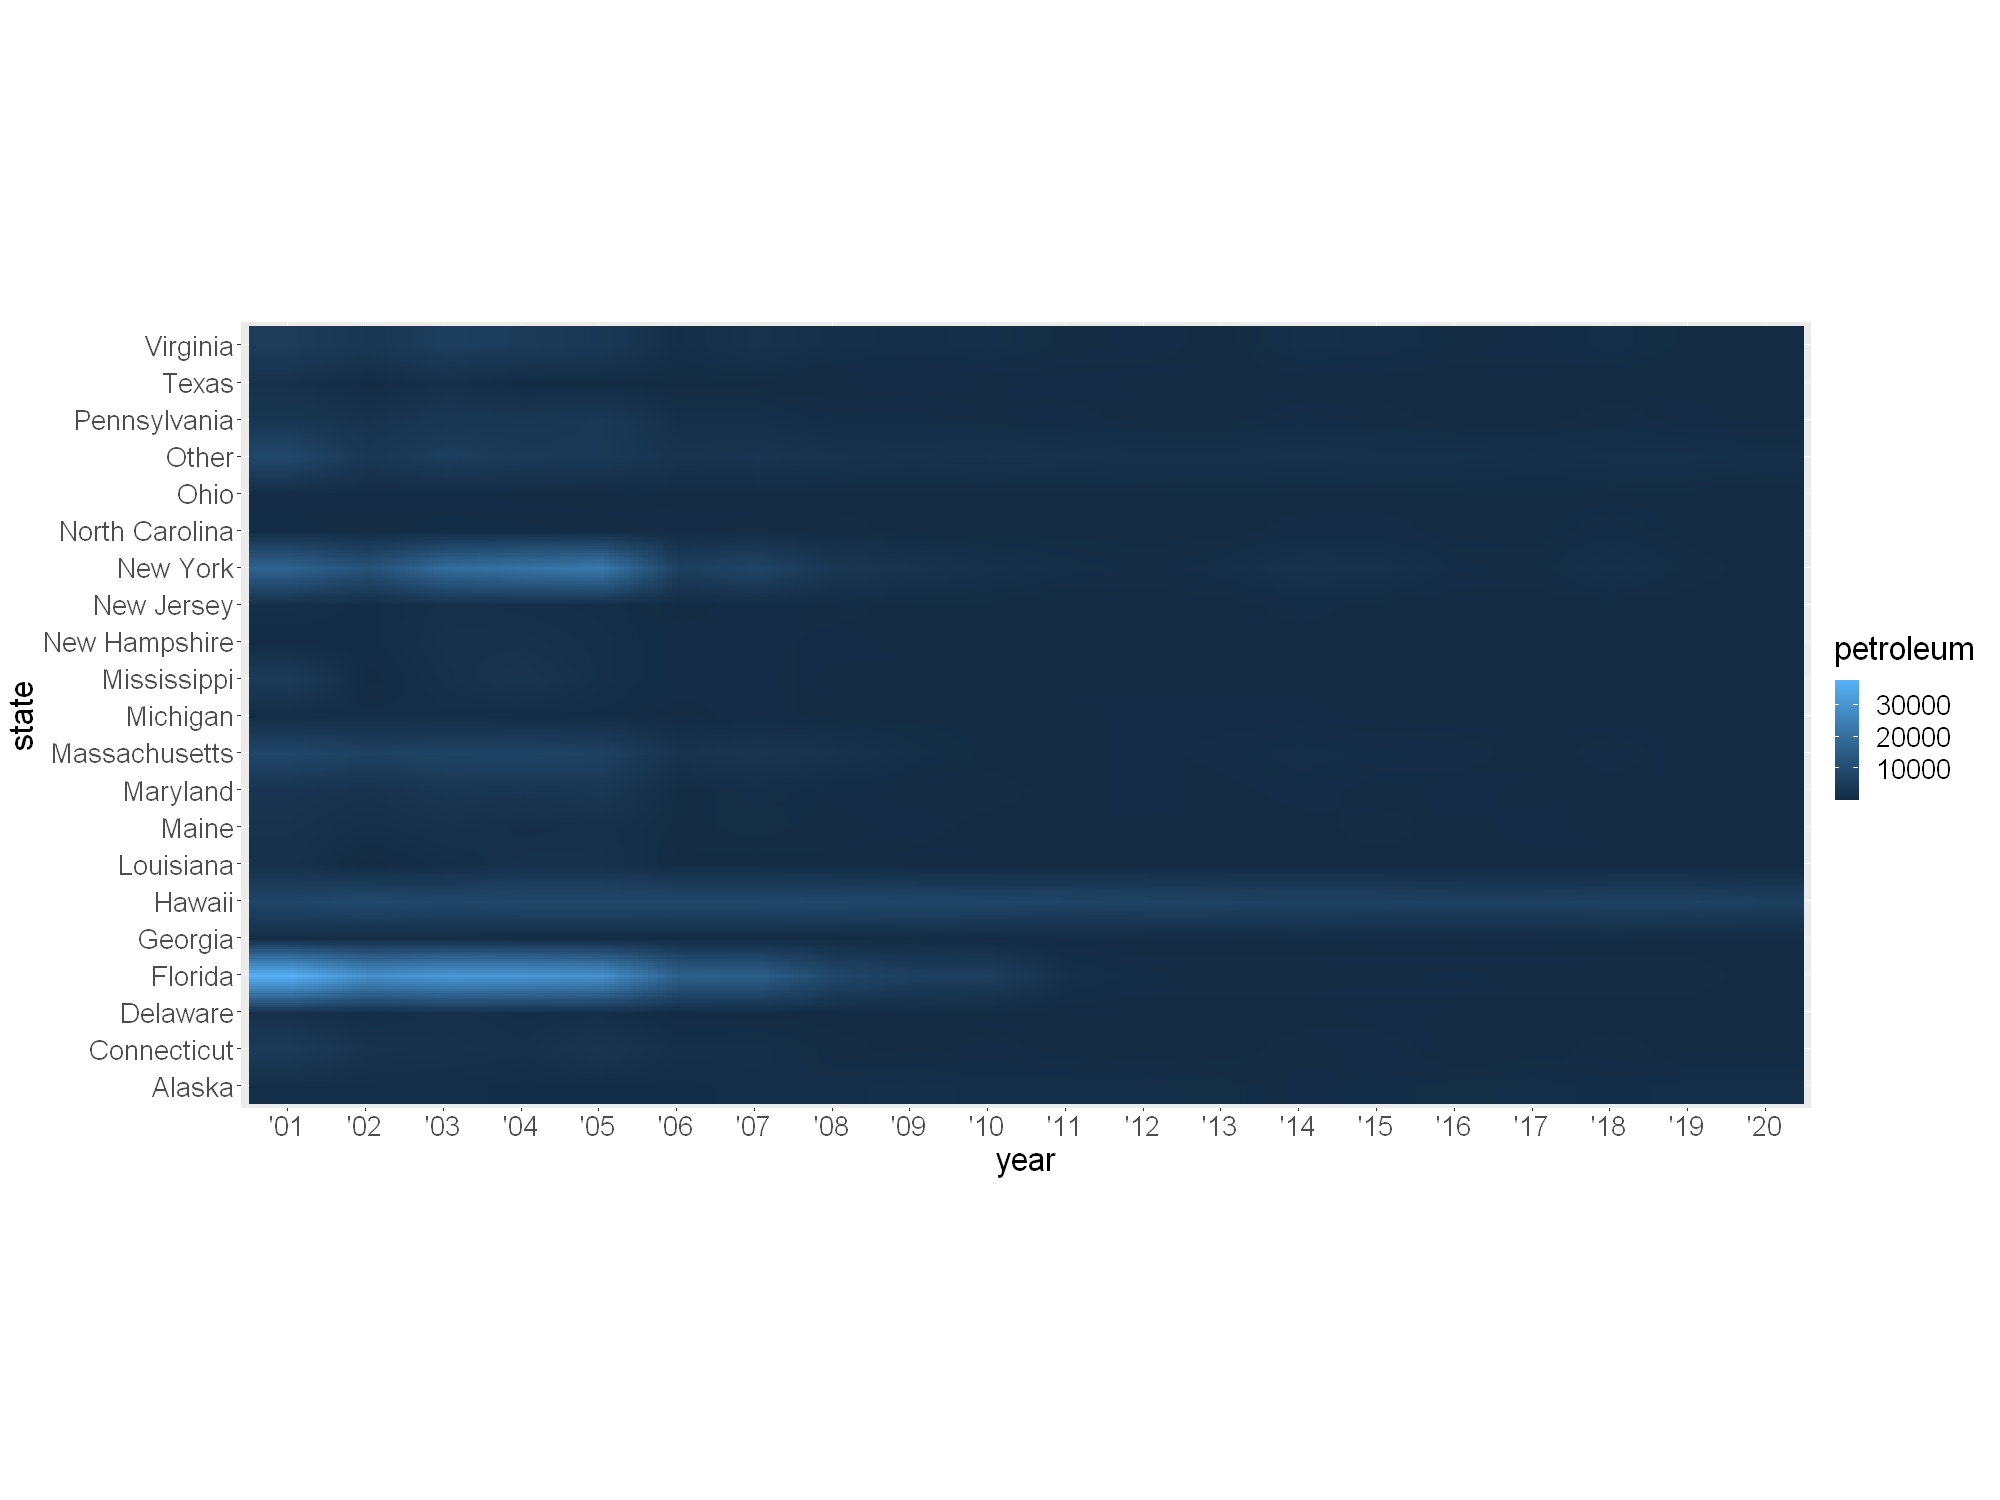

In [43]:
# Petrolum Generation by year in US by State
df$topn <- topn_states(20)
df_all_sect <- df[df$sector=='all sectors', ]

temp <- aggregate(list(petroleum=df_all_sect$petroleum), 
                  list(year=df_all_sect$year_str,
                       state=df_all_sect$topn),
                  sum)


options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(temp) +
    aes(x=year, y=state) + 
    geom_raster(aes(fill=petroleum), interpolate = TRUE) +
    theme(legend.position="right", aspect.ratio = .5, text = element_text(size=24))

pdf('heatmap_state_vs_year_blue.pdf')
ggplot(temp) +
    aes(x=year, y=state) + 
    geom_raster(aes(fill=petroleum), interpolate = TRUE) +
    theme(legend.position="right", aspect.ratio = .5, text = element_text(size=24))
dev.off()

png 
  2

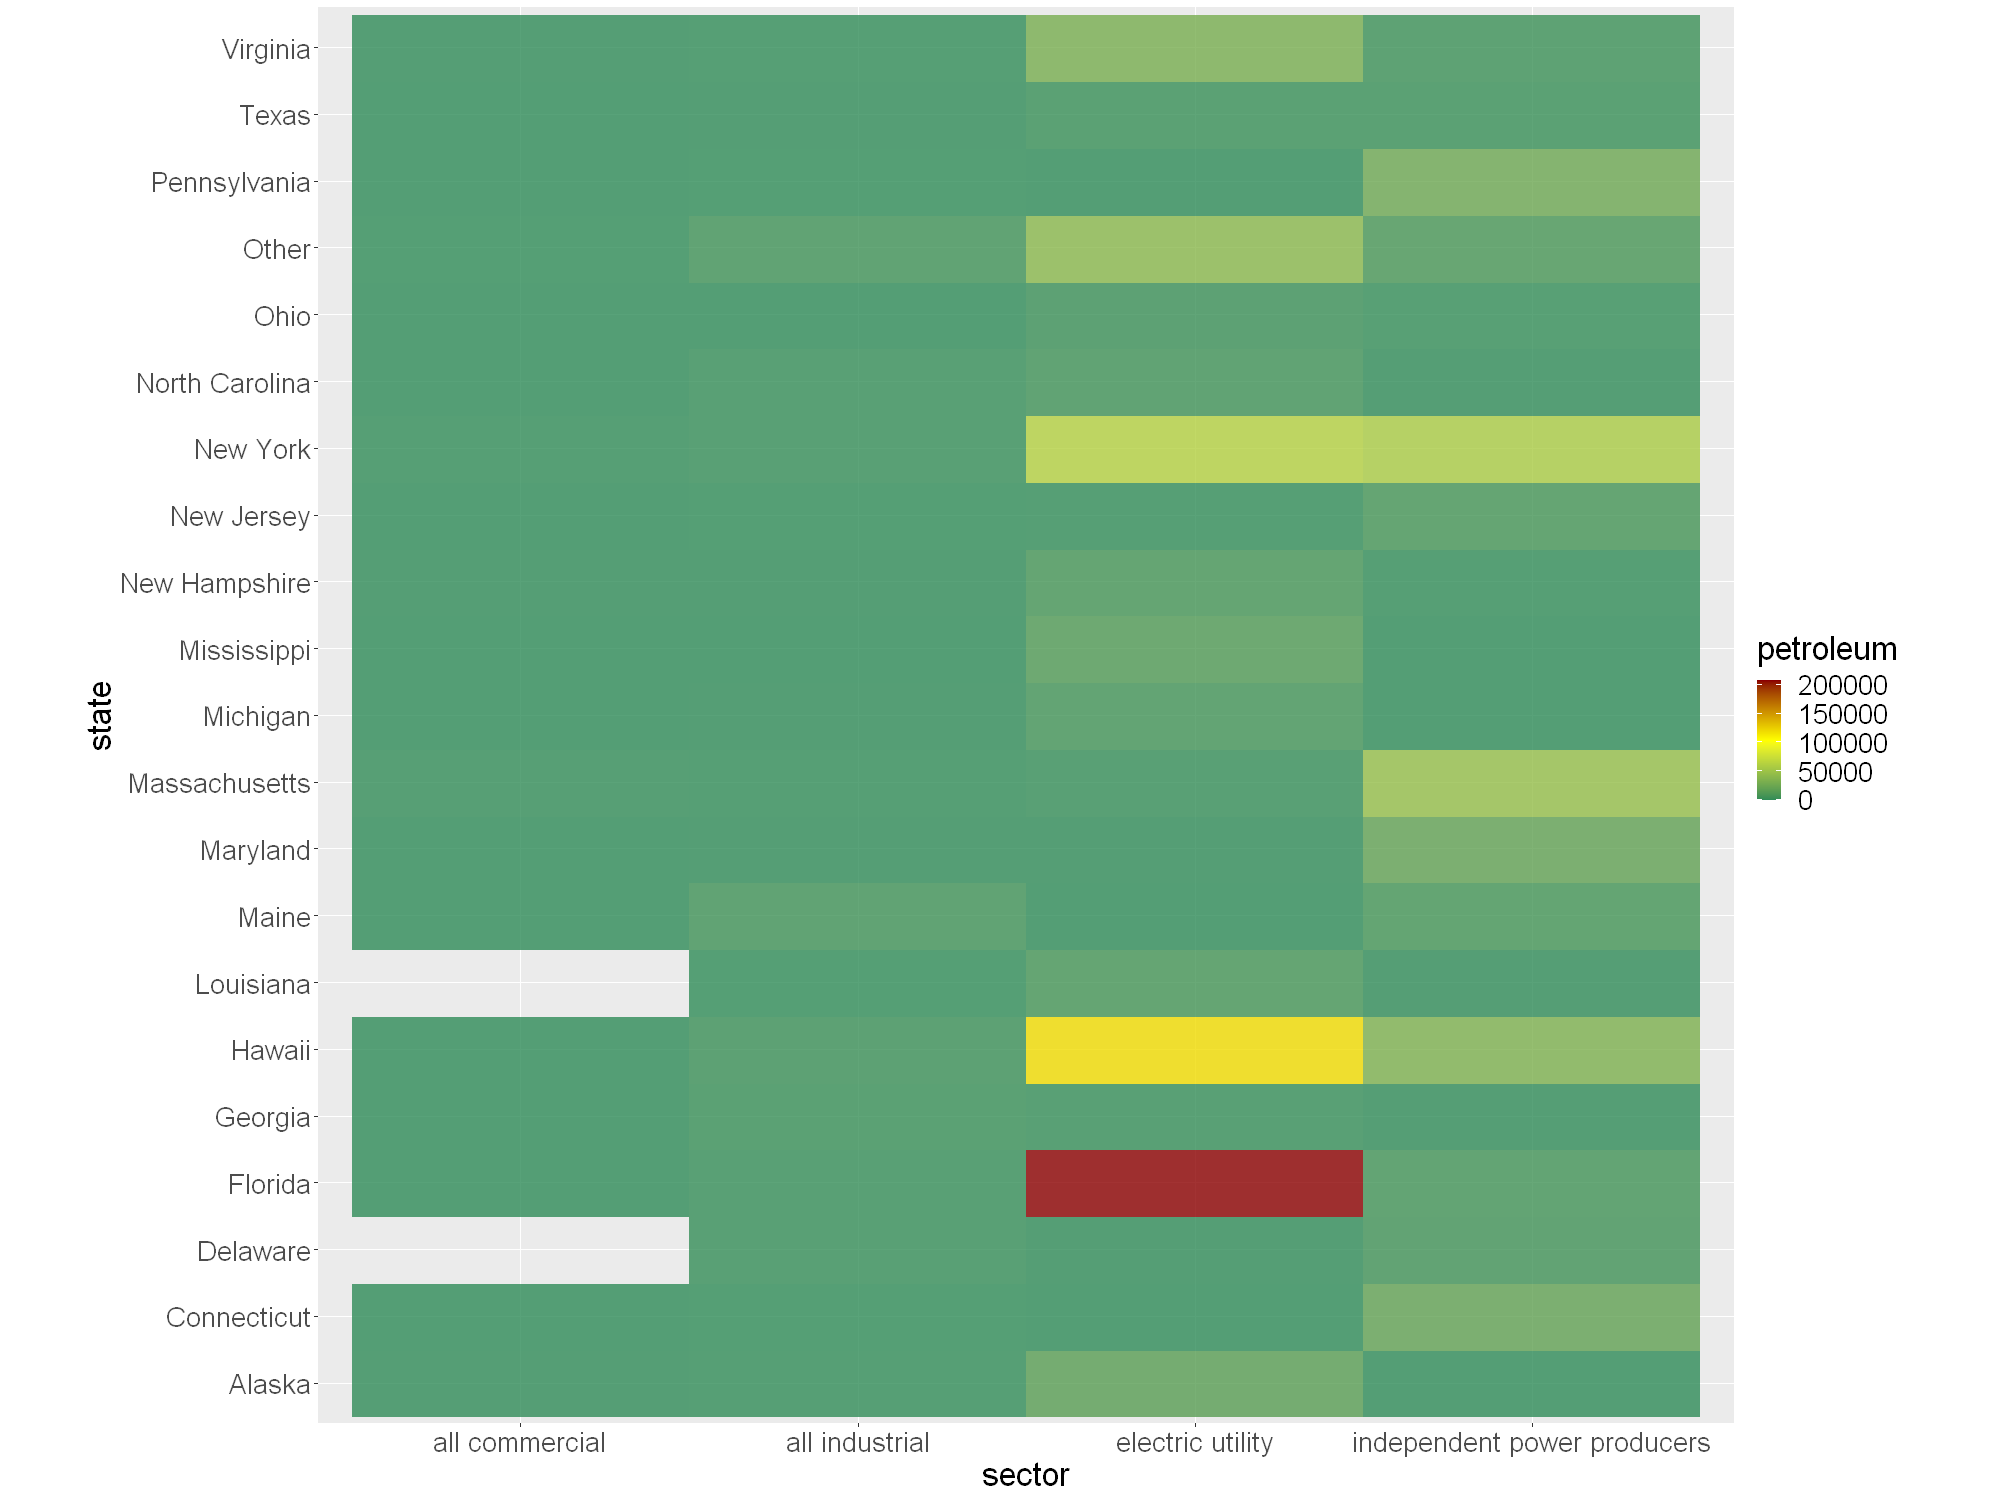

In [44]:
# Petrolum Generation by year in US by Sector and State
df$topn <- topn_states(20)

df_ind_sect <- df[df$sector!='all sectors', ]

temp <- aggregate(list(petroleum=df_ind_sect$petroleum), 
                  list(state=df_ind_sect$topn, 
                       sector=df_ind_sect$sector), 
                  sum)
# temp$petroleum <- ifelse(temp$petroleum == NA, 0, temp$petroleum)
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
ggplot(temp) +
    aes(y=state, x=sector) + 
    geom_raster(aes(fill=petroleum), interpolate = F, na.rm=TRUE, alpha=.8) +
    scale_fill_gradientn(colours=c("seagreen","yellow","red4")) +
    theme(legend.position="right", aspect.ratio = 1, text = element_text(size=24))

pdf('heatmap_state_vs_sect_topn.pdf')
ggplot(temp) +
    aes(y=state, x=sector) + 
    geom_raster(aes(fill=petroleum), interpolate = F, na.rm=TRUE, alpha=.8) +
    scale_fill_gradientn(colours=c("seagreen","yellow","red4")) +
    theme(legend.position="right", aspect.ratio = 1, text = element_text(size=24))
dev.off()

## Map of US State Contribution

png 
  2

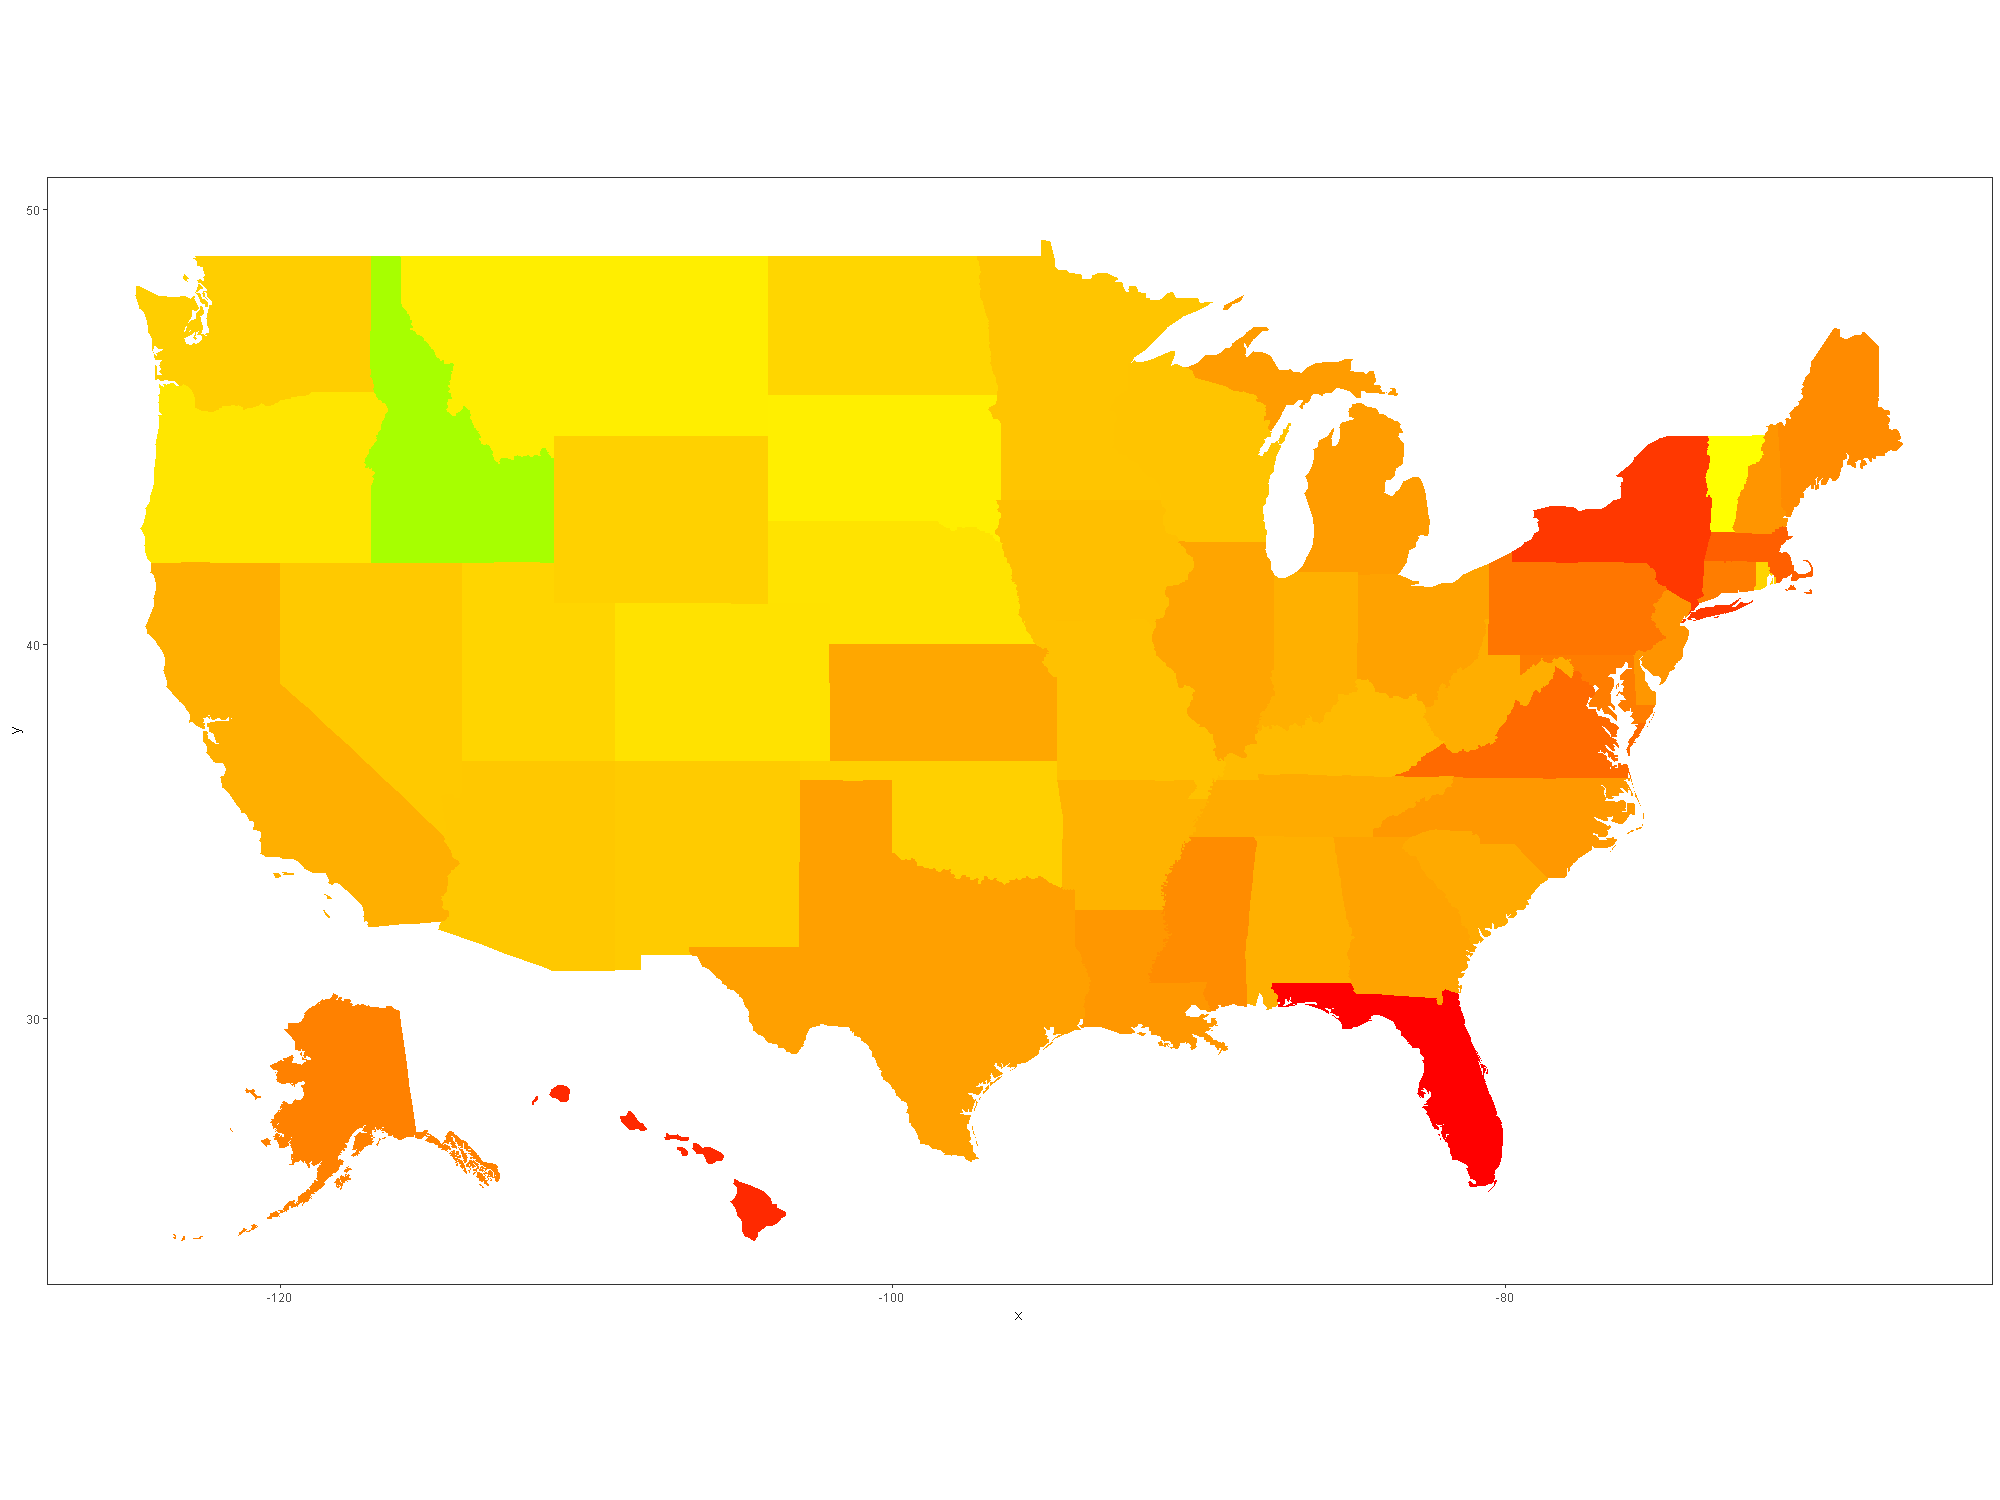

In [48]:
library(maps)
library(mapproj)
library(fiftystater)

allsect.bystate <- aggregate(list(petroleum=df[((df$sector=='all sectors') & (df$year == 2001)), ]$petroleum), 
                             list(state=df[((df$sector=='all sectors') & (df$year == 2001)), ]$state), sum)

allsect.bystate <- aggregate(list(petroleum=df[((df$sector=='all sectors')), ]$petroleum), 
                             list(state=df[((df$sector=='all sectors')), ]$state), sum)

allsect.bystate <- data.frame(state = tolower(rownames(USArrests)), allsect.bystate[allsect.bystate$state != 'District Of Columbia', ])


options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)
theme_set(theme_minimal())

# legend_breaks <- c(1, 10000, 20000, 30000, 40000, 50000)

p <- ggplot(allsect.bystate, aes(map_id = state)) + 
    geom_map(aes(fill = petroleum), map = fifty_states) + 
    expand_limits(x = fifty_states$long, y = fifty_states$lat) +
    coord_map()+
    scale_fill_gradient2(name = "Petroleum Generation (logarithmic scale)", 
                        trans='log', 
                        low = "green",
                        mid='yellow',
                        high = "red",
                        midpoint= 5,
                        na.value='green') +
    theme_bw() +
    theme(plot.title = element_text(size=30, face="bold"),
          legend.position = "none",
          legend.key.size = unit(2, 'cm'), #change legend key size
          legend.key.height = unit(2, 'cm'), #change legend key height
          legend.key.width = unit(2, 'cm'), #change legend key width
          legend.title = element_text(size=30), #change legend title font size
          legend.text = element_text(size=24),
          plot.background = element_blank(),
          panel.grid.minor = element_blank(),
          panel.grid.major = element_blank()) #+
#     ggtitle('Total Petrolem Generation by State from 2001 - Present')
p

pdf('pet_by_state_map.pdf')
p
dev.off()